# **Problem 1 - Perceptron**


## Q1.

In [186]:
#import packages
import sklearn.datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import random

#create a training data set with 10 points randomly generated inside the unit square in the positive quadrant
random.seed(0)
x_train = []
for i in range(10):
    x1, x2 = random.random(), random.random()
    x_train.append(np.array([x1, x2]))

#positive class 1: x1 > x2 ; negative class -1: x1 ≤ x2
y_train = np.ones(10)
for i in range(10):
  if x_train[i][0] < x_train[i][1]:
    y_train[i] = -1

#create a testing data set with 5000 randomly generated points
x_test = []
for i in range(5000):
    x1, x2 = random.random(), random.random()
    x_test.append(np.array([x1, x2]))

#positive class 1: x1 > x2 ; negative class 0: x1 ≤ x2
y_test = np.ones(5000)
for i in range(5000):
  if x_test[i][0] > x_test[i][1]:
    y_test[i] = -1

In [187]:
class Perceptron:
  
  #constructor
  def __init__ (self, a):
    self.w = None
    self.a = a
    
  #model  
  def model(self, x):
    return 1 if (np.dot(self.w, x) >= 0) else -1
  
  #predictor to predict on the data based on w
  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)
    
  def fit(self, X, Y, epochs = 10, lr = 0.01):
    self.w = np.array([random.random(), random.random()])
    wt_matrix = []
    #for all epochs
    for i in range(epochs):
      for x, y in zip(X, Y):
        y_pred = self.model(x)
        # y_pred is different from y
        if self.a - y_pred * y > 0:
          if y == 1:
            self.w = self.w + lr * x
          elif y == -1:
            self.w = self.w - lr * x
      wt_matrix.append(self.w)
    
    #return the weight matrix, that contains weights over all epochs
    return np.array(wt_matrix)

In [188]:
pp = Perceptron(0)
pp.fit(x_train,y_train)
y_pred = pp.predict(x_test)
print(accuracy_score(y_pred, y_test))

0.8072


## Q2.

In [189]:
pp = Perceptron(1)
pp.fit(x_train,y_train)
y_pred = pp.predict(x_test)
print(accuracy_score(y_pred, y_test))

0.9734


## Q3.

* The perceptron criterion loss function has a lower acuuracy than the hinge-loss function.
* The perceptron criterion loss function is also called 0-1 loss, which means that for each mistaken prediction you incur a penalty of 1 and for each correct prediction incur no penalty. The problem with this loss function is that given a linear classifier, it's hard to move towards a local optimum. If we plotted the loss function the surface would not be continuous. This makes it difficult to use gradient descent methods.
* The hinge-loss function reduces loss quickly but also does not want to overcorrect w. Hence, it converges even if the data is not linearly separable and it also creates this concept of margins. The hinge loss is zero when all data points also have some amount of separation from the separator, which is important because a line separates most the points well does not mean its a good separator. The advantage of larger margins is it leads to better generalization, and hence better accuracy in testing.



## Q4.

In [218]:
def training_data():
  #create a training data set with 10 points randomly generated inside the unit square in the positive quadrant
  random.seed()
  x_train_new = []
  for i in range(10):
    x1, x2 = random.random(), random.random()
    x_train_new.append(np.array([x1, x2]))

  #positive class 1: x1 > x2 ; negative class -1: x1 ≤ x2
  y_train_new = np.ones(10)
  for i in range(10):
    if x_train_new[i][0] < x_train_new[i][1]:
      y_train_new[i] = -1

  return x_train_new, y_train_new

In [224]:
from statistics import variance

perceptron_criterion_accuracy = []
hinge_loss_accuracy = []
for i in range(10):
  x_train_new, y_train_new = training_data()
  pp = Perceptron(0)
  pp.fit(x_train_new,y_train_new)
  y_pred_new = pp.predict(x_test)
  accuracy = accuracy_score(y_pred_new, y_test)
  perceptron_criterion_accuracy.append(accuracy)

  pp1 = Perceptron(1)
  pp1.fit(x_train_new,y_train_new)
  y_pred_new = pp1.predict(x_test)
  accuracy = accuracy_score(y_pred_new, y_test)
  hinge_loss_accuracy.append(accuracy)
print(perceptron_criterion_accuracy)
print("Variance of perceptron_criterion_accuracy is % s " %(variance(perceptron_criterion_accuracy)))
print(hinge_loss_accuracy)
print("Variance of hinge_loss_accuracy is % s " %(variance(hinge_loss_accuracy)))

[0.5096, 0.5096, 0.644, 0.5096, 0.4112, 0.5096, 0.5096, 0.8338, 0.5096, 0.3918]
Variance of perceptron_criterion_accuracy is 0.015650291555555553 
[0.5096, 0.5096, 0.2712, 0.5096, 0.507, 0.5096, 0.5096, 0.566, 0.5096, 0.5096]
Variance of hinge_loss_accuracy is 0.0062905071111111115 


I think in the case of hinge-loss function, the classification of the same 5000 test instances will not change significantly by using a different set of 10 training points.

# **Problem 2 - Precision, Recall, ROC**

## Q1.

1. True negative matters for ROC curve according to the equation of *FPR* below. Instead of plotting *Precision* against *Recall* like PR curve, ROC curve plots the *True Positive Rate(TPR)* against the *False Positive Rate(FPR)*.
* $Precision = \frac{TP}{TP+FN}$
* $Recall = TPR = \frac{TP}{TP+FN}$
* $FPR = \frac{FP}{FP+TN}$

2. Each point on ROC curve corresponds to a unique point on PR curve because with a fixed number of positive and negative examples, given the other three entries in a matrix, *TN* is uniquely determined. If $Recall = 0$, we are unable to recover *FP*, and thus cannot find a unique confusion matrix. Consequently, we have a one-to-one mapping between confusion matrices and points in PR space. This implies that we also have a one-to-one mapping between points (each defined by a confusion matrix) in ROC space and PR space; hence, we can translate a curve in ROC space to PR space and vice-versa.

## Q2.

In [307]:
from scipy.io import arff
import pandas as pd
import numpy as np

# Dataset: https://www.openml.org/search?type=data&status=active&id=1464
data, meta = arff.loadarff('/content/blood_transfusion.arff')
df = pd.DataFrame(data)
for column in df:
  col_type = df[column].dtypes
  if col_type == 'object':
    df[column] = df[column].str.decode('utf-8')
df = df.astype(int) 
df['Class'] = df['Class'].replace([2,1],[1,0])
y = df['Class']
y = pd.Series(y)
X = df.drop(['Class'], axis = 1)
display(df)

,V1,V2,V3,V4,Class
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


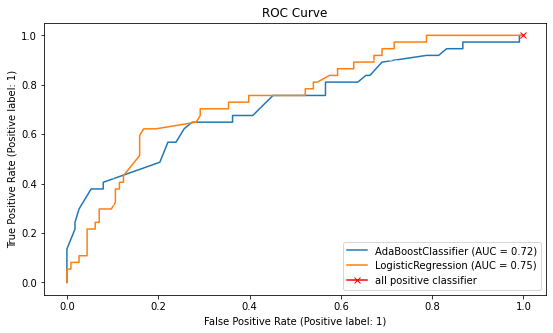

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


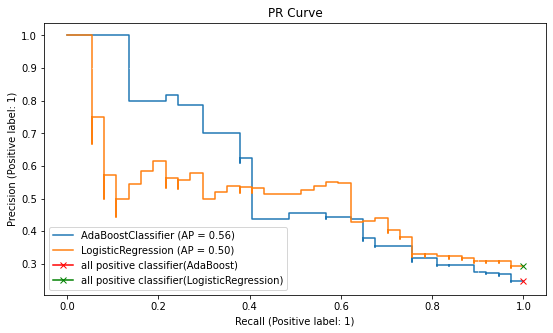

In [323]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model
adaBoost = AdaBoostClassifier(random_state=0).fit(X_train, y_train)
lr = LogisticRegression(random_state=0).fit(X_train, y_train)

y_probas_pred_adaBoost = adaBoost.predict_proba(X_test)[:, 1]
y_probas_pred_lr = lr.predict_proba(X_test)[:, 1]

precision_adaBoost, recall_adaBoost, thresholds_adaBoost = precision_recall_curve(y_test, y_probas_pred_adaBoost)
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_test, y_probas_pred_lr)

# ROC Curve
fig, ax = plt.subplots(figsize=(9,5))
plot_roc_curve(adaBoost, X_test, y_test, ax=ax)
plot_roc_curve(lr, X_test, y_test, ax=ax)
plt.plot(1,1, "-x", label = 'all positive classifier', color = "red")
ax.axhline(0.9, c='w', ls="--", lw=1, alpha=0.5)
ax.axvline(0.1, c='w', ls="--", lw=1, alpha=0.5)
ax.set_title("ROC Curve");
plt.legend()
plt.show()

# PR Curve
fig, ax = plt.subplots(figsize=(9,5))
plot_precision_recall_curve(adaBoost, X_test, y_test, ax=ax)
plot_precision_recall_curve(lr, X_test, y_test, ax=ax)
plt.plot(1, precision_adaBoost[0], "-x", label = 'all positive classifier(AdaBoost)',color = "red")
plt.plot(1, precision_lr[0], "-x", label = 'all positive classifier(LogisticRegression)',color = "green")
ax.axhline(0.9, c='w', ls="--", lw=1, alpha=0.5)
ax.axvline(0.9, c='w', ls="--", lw=1, alpha=0.5)
ax.set_title("PR Curve")
plt.legend()
plt.show()

# **Problem 3 - Linear Separability**

## Q1.

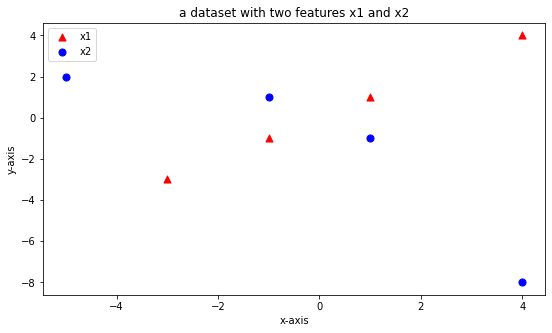

In [343]:
import numpy as np
import matplotlib.pyplot as plt


x1 = np.array([[-1, -1], [1, 1], [-3, -3], [4, 4]])
x2 = np.array([[-1, 1], [1, -1], [-5, 2], [4, -8]])

fig, ax = plt.subplots(figsize=(9,5))
plt.scatter(x1[:,0], x1[:,1], color = 'red', s=50, marker ="^", label="x1")
plt.scatter(x2[:,0], x2[:,1], color = 'blue', s=50, label="x2")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("a dataset with two features x1 and x2")
plt.legend()

This dataset is not linearly seperable and a linear classifier can not be trained using features x1 and x2 to classify this data set, because we could observe from the graph that the convexhulls for both x1 and x2 will intersect with each other and there is no linear function that can separate x1 and x2.

## Q2.

In [353]:
# defining z = x*y for features x1 and x2, given data can be represented 1-dimensional and be linearly separable
z_x1 = []
z_x2 = []
y = np.zeros(4)
for i in x1:
  z = i[0] * i[1]
  z_x1.append(z)

for i in x2:
  z = i[0] * i[1]
  z_x2.append(z)

print(z_x1)
print(z_x2)

[1, 1, 9, 16]
[-1, -1, -10, -32]


## Q3.

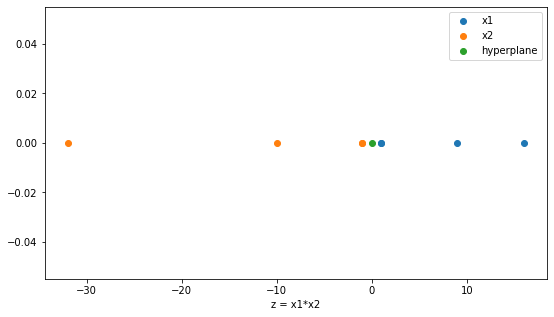

In [354]:
# in this plot, z = 0 separates x1 and x2
# a non-linearly separable data can be represented as linearly separable form after applying a non-linear transformation
fig, ax = plt.subplots(figsize=(9,5))
plt.scatter(z_x1, y, label='x1')
plt.scatter(z_x2, y, label='x2')
plt.scatter([0], [0], label='hyperplane')
plt.xlabel('z = x1*x2')
plt.legend()
plt.show()

## Q4.

If the data points of different features(classes) are not linear seperable and cannot be trained by a linear classifier, then non-linear transformations could transform these non-linearly separable data points into a space where these data points are linearly separable by a linear classifier. 

# **Problem 4 - Softmax Activation Function**

## Q1.

$$o_i = \frac{exp(v_i)}{\sum_{j=1}^{k} exp(v_j)} \forall i \in \{1, ..., k\}$$

---

> **When $i=j$, $\frac{\partial o_i}{\partial v_j}=o_i(1-o_i)$.**

* Proof:
1. According to quotient rule of derivatives, we know that $f(x)=\frac{g(x)}{h(x)}$, then $f'(x)=\frac{g'(x)h(x)-h'(x)g(x)}{[h(x)]^2}$.
2. In our case, we have $g_i = e^{v_i}$ and $h_j = \sum_{j=1}^{k} e^{v_j} = \sum$ for simplicity.
3. So $g_i'=e^{v_i}$ and $h_j'=e^{v_j}$, when $i=j$.
4. Hence, $$\frac{\partial o_i}{\partial v_j} = \frac{e^{v_i}\sum-e^{v_j}e^{v_i}}{\sum^2}=\frac{e^{v_i}(\sum-e^{v_j})}{\sum^2}=\frac{e^{v_i}}{\sum}\frac{\sum-e^{v_j}}{\sum}=o_i(1-o_i)$$

---
>  **When $i \neq j$, $\frac{\partial o_i}{\partial v_j}=-o_io_j$.**
* Proof: 
1. According to quotient rule of derivatives, we know that $f(x)=\frac{g(x)}{h(x)}$, then $f'(x)=\frac{g'(x)h(x)-h'(x)g(x)}{[h(x)]^2}$.
2. In our case, we have $g_i = e^{v_i}$ and $h_j = \sum_{j=1}^{k} e^{v_j} = \sum$ for simplicity.
3. So $g_i'=0$ and $h_j'=e^{v_j}$, when $i \neq j$.
4. Hence, $$\frac{\partial o_i}{\partial v_j} = \frac{0-e^{v_j}e^{v_i}}{\sum^2}=-\frac{e^{v_j}}{\sum}\frac{e^{v_i}}{\sum}=-o_io_j$$

## Q2.

* Proof:
1. $$\frac{\partial L}{\partial v_i} = -\sum_{i=1}^{k}y_i \frac{\partial log(o_i)}{\partial v_i} = -\sum_{i=1}^{k}y_i \frac{\partial log(o_i)}{\partial o_i} \cdot \frac{\partial o_i}{\partial v_i} = -\sum_{i=1}^{k}y_i \frac{1}{o_i} \cdot \frac{\partial o_i}{\partial v_i}$$
2. $$\frac{\partial L}{\partial v_i} = -y_i(1-o_i)-\sum_{k \neq i}y_i\frac{1}{o_i}(-o_i \cdot o_i)=-y_i+y_io_i+\sum_{i \neq 1}y_io_i=o_i(y_i+\sum_{i \neq 1}y_i)-y_i$$
3. Since $y_i$ is a one hot encoded vector for the labels, so $\sum_{i=1}^{k}y_i=1$, and $y_i+\sum_{i \neq 1}^{k}y_i=1$.
4. Hence, $$\frac{\partial L}{\partial v_i}=o_i-y_i$$

# **Problem 5 - Weight Initialization, Dead Neurons, Leaky ReLU**

## Q1.

In [1]:
%matplotlib inline
!git clone https://github.com/Intoli/intoli-article-materials.git
!pip install -r "./intoli-article-materials/articles/neural-network-initialization/requirements.txt"

Cloning into 'intoli-article-materials'...
remote: Enumerating objects: 1230, done.
remote: Counting objects: 100% (328/328), done.
remote: Compressing objects: 100% (253/253), done.
remote: Total 1230 (delta 271), reused 75 (delta 75), pack-reused 902
Receiving objects: 100% (1230/1230), 685.41 KiB | 1.04 MiB/s, done.
Resolving deltas: 100% (744/744), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 889 kB 5.1 MB/s 
     |████████████████████████████████| 108 kB 47.6 MB/s 
     |████████████████████████████████| 745 kB 37.0 MB/s 
     |████████████████████████████████| 68 kB 7.4 MB/s 
     |████████████████████████████████| 250 kB 61.6 MB/s 
     |████████████████████████████████| 126 kB 58.6 MB/s 
     |████████████████████████████████| 88 kB 8.7 MB/s 
     |████████████████████████████████| 126 kB 61.1 MB/s 
     |████████████████████████████████| 319 kB 54.4 MB/s 
     |█████████████████

* RandomNormal initialization
* tanh activation

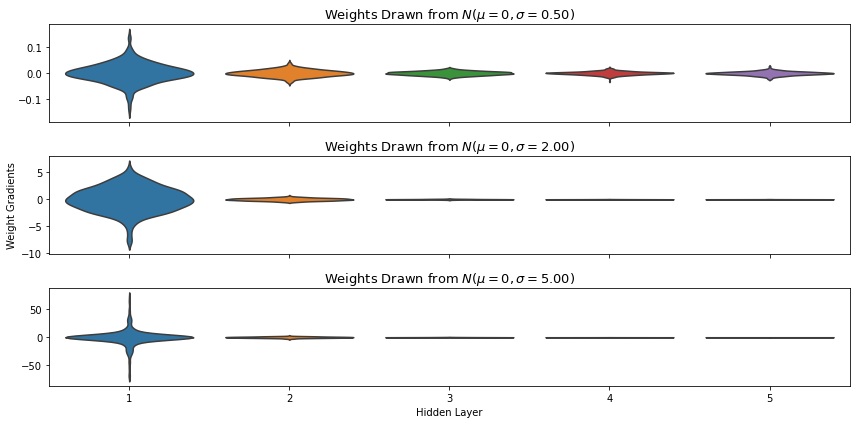

In [10]:
%run "./intoli-article-materials/articles/neural-network-initialization/plot-activation-layers.py"

* RandomNormal initialization
* sigmoid activation 

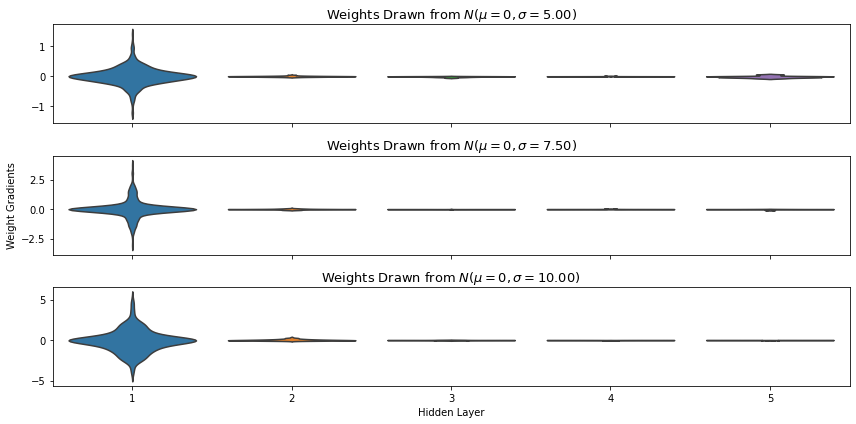

In [3]:
%run "./intoli-article-materials/articles/neural-network-initialization/plot-activation-layers.py"

* GlorotNormal initialization
* tanh activation 

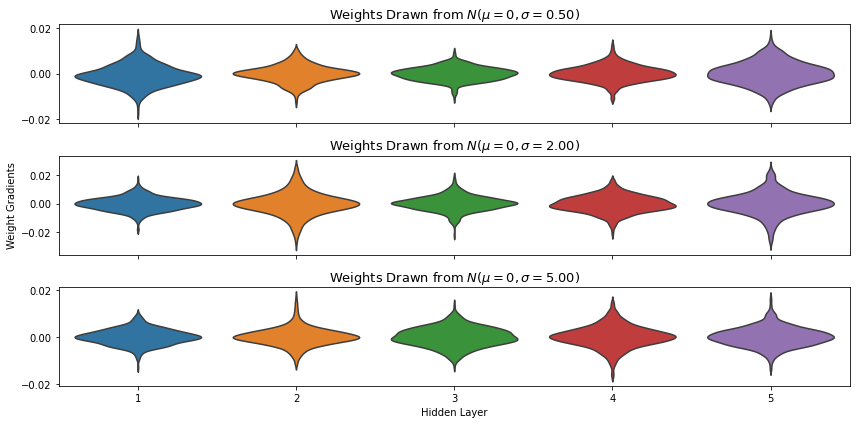

In [13]:
%run "./intoli-article-materials/articles/neural-network-initialization/plot-activation-layers.py"

* GlorotNormal initialization
* sigmoid activation 

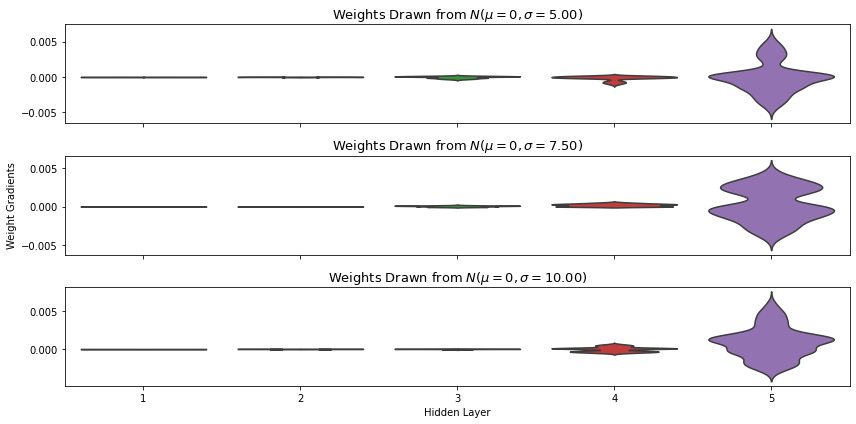

In [9]:
%run "./intoli-article-materials/articles/neural-network-initialization/plot-activation-layers.py"

Through the model using RandomeNormal initializer that generates tensors with a normal distribution with different values of standard deviations under tanh and sigmoid activation, we could observe that the gradients becomes smaller and approaches zero. In this case, it leaves the weights of the initial or lower layers nearly unchanged, and hence creating the problem that the gradient descent never converges to the optimum. Thus, this is known as the vanishing gradients phenomenon.

After changing to the GlorotNormal initializer with tanh activation, the distribution of activations retains its shape throughout the network, which helps in dealing with the gradient vanishing problem. But with sigmoid activation, the activations become increasingly spread out as we progress through the network, which creates exploding gradients problem.

## Q2.

In [16]:
import numpy as np
from tqdm import tqdm
from tensorflow import keras
from keras import initializers

In [28]:
num_train = 3000
num_test = 100
num_layers = 10
num_runs = 1000

# f(x) = x sin (5x)
def func(x_train):
  y_train = np.copy(x_train)
  for i in range(len(y_train)):
    x = y_train[i]
    y_train[i] = x * np.sin(5*x)
  return y_train

np.random.seed(1)
x_test = np.random.uniform(-np.sqrt(7),np.sqrt(7),num_test)
y_test = func(x_test)

def RELU(act_func,num_runs):
  count = 0
  for i in tqdm(range(num_runs)):
    np.random.seed(2)
    x_train = np.random.uniform(-np.sqrt(7),np.sqrt(7),num_train)
    y_train  = func(x_train)
    initializer = initializers.HeNormal(seed=None)
    nn = keras.Sequential()
    nn.add(keras.layers.Dense(units = 1, activation = act_func, input_shape=(1,)))
    for j in range(num_layers):
      nn.add(keras.layers.Dense(units = 2, activation = act_func))
    nn.add(keras.layers.Dense(units = 1, activation = act_func))
    nn.compile(loss='mse')
    nn.fit(x_train, y_train, batch_size=64)
    y_pred = nn.predict(x_test)
    if np.all((y_pred == 0)):
      count = count + 1
  ratio = count * 1.0 / num_runs

  return ratio

ratio = RELU("relu", num_runs)
print("The collapse ratio = {}".format(ratio))


  0%|          | 0/1000 [00:00<?, ?it/s]

4/4 [==============================] - 0s 4ms/step


  0%|          | 1/1000 [00:03<51:52,  3.12s/it]

4/4 [==============================] - 0s 4ms/step


  0%|          | 2/1000 [00:05<43:39,  2.62s/it]

4/4 [==============================] - 0s 3ms/step


  0%|          | 3/1000 [00:07<37:44,  2.27s/it]

4/4 [==============================] - 0s 3ms/step


  0%|          | 4/1000 [00:09<34:44,  2.09s/it]

4/4 [==============================] - 0s 3ms/step


  0%|          | 5/1000 [00:10<33:06,  2.00s/it]

4/4 [==============================] - 0s 4ms/step


  1%|          | 6/1000 [00:12<31:57,  1.93s/it]

4/4 [==============================] - 0s 3ms/step


  1%|          | 7/1000 [00:14<31:05,  1.88s/it]

4/4 [==============================] - 0s 3ms/step


  1%|          | 8/1000 [00:16<30:39,  1.85s/it]

4/4 [==============================] - 0s 4ms/step


  1%|          | 9/1000 [00:18<32:39,  1.98s/it]

4/4 [==============================] - 0s 5ms/step


  1%|          | 10/1000 [00:20<33:20,  2.02s/it]

4/4 [==============================] - 0s 3ms/step


  1%|          | 11/1000 [00:22<34:39,  2.10s/it]

4/4 [==============================] - 0s 4ms/step


  1%|          | 12/1000 [00:24<33:04,  2.01s/it]

4/4 [==============================] - 0s 3ms/step


  1%|▏         | 13/1000 [00:26<32:04,  1.95s/it]

4/4 [==============================] - 0s 3ms/step


  1%|▏         | 14/1000 [00:28<31:24,  1.91s/it]

4/4 [==============================] - 0s 5ms/step


  2%|▏         | 15/1000 [00:30<32:52,  2.00s/it]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 16/1000 [00:32<32:02,  1.95s/it]

4/4 [==============================] - 0s 5ms/step


  2%|▏         | 17/1000 [00:35<36:59,  2.26s/it]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 18/1000 [00:37<36:06,  2.21s/it]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 19/1000 [00:40<41:26,  2.53s/it]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 20/1000 [00:42<39:57,  2.45s/it]

4/4 [==============================] - 0s 4ms/step


  2%|▏         | 21/1000 [00:45<39:02,  2.39s/it]

4/4 [==============================] - 0s 6ms/step


  2%|▏         | 22/1000 [00:49<48:32,  2.98s/it]

4/4 [==============================] - 0s 4ms/step


  2%|▏         | 23/1000 [00:52<50:11,  3.08s/it]

4/4 [==============================] - 0s 4ms/step


  2%|▏         | 24/1000 [00:55<45:29,  2.80s/it]

4/4 [==============================] - 0s 3ms/step


  2%|▎         | 25/1000 [00:57<43:49,  2.70s/it]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 26/1000 [00:59<39:23,  2.43s/it]

4/4 [==============================] - 0s 5ms/step


  3%|▎         | 27/1000 [01:01<36:19,  2.24s/it]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 28/1000 [01:03<36:17,  2.24s/it]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 29/1000 [01:05<34:20,  2.12s/it]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 30/1000 [01:07<32:44,  2.03s/it]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 31/1000 [01:08<31:38,  1.96s/it]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 32/1000 [01:10<30:52,  1.91s/it]

4/4 [==============================] - 0s 4ms/step


  3%|▎         | 33/1000 [01:12<30:27,  1.89s/it]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 34/1000 [01:14<29:49,  1.85s/it]

4/4 [==============================] - 0s 4ms/step


  4%|▎         | 35/1000 [01:16<31:32,  1.96s/it]

4/4 [==============================] - 0s 3ms/step


  4%|▎         | 36/1000 [01:18<30:54,  1.92s/it]

4/4 [==============================] - 0s 3ms/step


  4%|▎         | 37/1000 [01:20<30:20,  1.89s/it]

4/4 [==============================] - 0s 4ms/step


  4%|▍         | 38/1000 [01:21<29:49,  1.86s/it]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 39/1000 [01:23<29:23,  1.84s/it]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 40/1000 [01:25<29:03,  1.82s/it]

4/4 [==============================] - 0s 4ms/step


  4%|▍         | 41/1000 [01:27<31:07,  1.95s/it]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 42/1000 [01:29<30:25,  1.91s/it]

4/4 [==============================] - 0s 4ms/step


  4%|▍         | 43/1000 [01:31<29:47,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


  4%|▍         | 44/1000 [01:33<29:14,  1.84s/it]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 45/1000 [01:34<28:57,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


  5%|▍         | 46/1000 [01:36<28:45,  1.81s/it]

4/4 [==============================] - 0s 4ms/step


  5%|▍         | 47/1000 [01:38<28:25,  1.79s/it]

4/4 [==============================] - 0s 3ms/step


  5%|▍         | 48/1000 [01:40<30:38,  1.93s/it]

4/4 [==============================] - 0s 4ms/step


  5%|▍         | 49/1000 [01:42<29:58,  1.89s/it]

4/4 [==============================] - 0s 4ms/step


  5%|▌         | 50/1000 [01:44<29:40,  1.87s/it]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 51/1000 [01:46<29:08,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


  5%|▌         | 52/1000 [01:47<28:46,  1.82s/it]

4/4 [==============================] - 0s 4ms/step


  5%|▌         | 53/1000 [01:49<28:31,  1.81s/it]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 54/1000 [01:51<30:20,  1.92s/it]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 55/1000 [01:53<29:51,  1.90s/it]

4/4 [==============================] - 0s 4ms/step


  6%|▌         | 56/1000 [01:55<29:29,  1.87s/it]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 57/1000 [01:57<29:04,  1.85s/it]

4/4 [==============================] - 0s 4ms/step


  6%|▌         | 58/1000 [01:58<28:40,  1.83s/it]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 59/1000 [02:00<28:28,  1.82s/it]

4/4 [==============================] - 0s 4ms/step


  6%|▌         | 60/1000 [02:02<28:15,  1.80s/it]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 61/1000 [02:04<30:09,  1.93s/it]

4/4 [==============================] - 0s 4ms/step


  6%|▌         | 62/1000 [02:06<29:36,  1.89s/it]

4/4 [==============================] - 0s 4ms/step


  6%|▋         | 63/1000 [02:08<29:20,  1.88s/it]

4/4 [==============================] - 0s 4ms/step


  6%|▋         | 64/1000 [02:10<28:58,  1.86s/it]

4/4 [==============================] - 0s 4ms/step


  6%|▋         | 65/1000 [02:11<28:34,  1.83s/it]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 66/1000 [02:13<28:14,  1.81s/it]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 67/1000 [02:15<30:01,  1.93s/it]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 68/1000 [02:17<29:19,  1.89s/it]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 69/1000 [02:19<28:46,  1.85s/it]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 70/1000 [02:21<28:45,  1.86s/it]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 71/1000 [02:23<28:30,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 72/1000 [02:25<28:28,  1.84s/it]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 73/1000 [02:26<28:08,  1.82s/it]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 74/1000 [02:29<30:01,  1.95s/it]

4/4 [==============================] - 0s 4ms/step


  8%|▊         | 75/1000 [02:30<29:26,  1.91s/it]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 76/1000 [02:32<28:48,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


  8%|▊         | 77/1000 [02:34<28:25,  1.85s/it]

4/4 [==============================] - 0s 4ms/step


  8%|▊         | 78/1000 [02:36<28:07,  1.83s/it]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 79/1000 [02:38<27:58,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 80/1000 [02:40<29:37,  1.93s/it]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 81/1000 [02:42<29:08,  1.90s/it]

4/4 [==============================] - 0s 4ms/step


  8%|▊         | 82/1000 [02:43<28:28,  1.86s/it]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 83/1000 [02:45<28:00,  1.83s/it]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 84/1000 [02:47<27:50,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 85/1000 [02:49<27:41,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


  9%|▊         | 86/1000 [02:50<27:19,  1.79s/it]

4/4 [==============================] - 0s 5ms/step


  9%|▊         | 87/1000 [02:53<29:14,  1.92s/it]

4/4 [==============================] - 0s 4ms/step


  9%|▉         | 88/1000 [02:54<28:29,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


  9%|▉         | 89/1000 [02:56<27:56,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


  9%|▉         | 90/1000 [02:58<27:39,  1.82s/it]

4/4 [==============================] - 0s 4ms/step


  9%|▉         | 91/1000 [03:00<27:28,  1.81s/it]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 92/1000 [03:02<27:21,  1.81s/it]

4/4 [==============================] - 1s 4ms/step


  9%|▉         | 93/1000 [03:04<29:10,  1.93s/it]

4/4 [==============================] - 0s 4ms/step


  9%|▉         | 94/1000 [03:06<28:28,  1.89s/it]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 95/1000 [03:07<28:09,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


 10%|▉         | 96/1000 [03:09<27:44,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


 10%|▉         | 97/1000 [03:11<27:32,  1.83s/it]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 98/1000 [03:13<27:19,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 99/1000 [03:15<27:05,  1.80s/it]

4/4 [==============================] - 0s 3ms/step


 10%|█         | 100/1000 [03:17<28:57,  1.93s/it]

4/4 [==============================] - 0s 4ms/step


 10%|█         | 101/1000 [03:19<28:29,  1.90s/it]

4/4 [==============================] - 0s 4ms/step


 10%|█         | 102/1000 [03:20<27:45,  1.85s/it]

4/4 [==============================] - 0s 4ms/step


 10%|█         | 103/1000 [03:22<27:29,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


 10%|█         | 104/1000 [03:24<27:09,  1.82s/it]

4/4 [==============================] - 0s 4ms/step


 10%|█         | 105/1000 [03:26<27:39,  1.85s/it]

4/4 [==============================] - 1s 3ms/step


 11%|█         | 106/1000 [03:29<31:41,  2.13s/it]

4/4 [==============================] - 0s 4ms/step


 11%|█         | 107/1000 [03:30<30:25,  2.04s/it]

4/4 [==============================] - 0s 4ms/step


 11%|█         | 108/1000 [03:32<29:26,  1.98s/it]

4/4 [==============================] - 0s 5ms/step


 11%|█         | 109/1000 [03:34<28:46,  1.94s/it]

4/4 [==============================] - 0s 4ms/step


 11%|█         | 110/1000 [03:36<28:05,  1.89s/it]

4/4 [==============================] - 0s 4ms/step


 11%|█         | 111/1000 [03:38<27:44,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


 11%|█         | 112/1000 [03:39<27:13,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


 11%|█▏        | 113/1000 [03:42<28:52,  1.95s/it]

4/4 [==============================] - 0s 4ms/step


 11%|█▏        | 114/1000 [03:44<28:30,  1.93s/it]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 115/1000 [03:45<27:45,  1.88s/it]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 116/1000 [03:47<27:13,  1.85s/it]

4/4 [==============================] - 0s 5ms/step


 12%|█▏        | 117/1000 [03:49<27:01,  1.84s/it]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 118/1000 [03:51<26:43,  1.82s/it]

4/4 [==============================] - 1s 3ms/step


 12%|█▏        | 119/1000 [03:53<28:19,  1.93s/it]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 120/1000 [03:55<27:39,  1.89s/it]

4/4 [==============================] - 0s 4ms/step


 12%|█▏        | 121/1000 [03:57<27:27,  1.87s/it]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 122/1000 [03:58<26:58,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


 12%|█▏        | 123/1000 [04:00<26:29,  1.81s/it]

4/4 [==============================] - 0s 4ms/step


 12%|█▏        | 124/1000 [04:02<26:26,  1.81s/it]

4/4 [==============================] - 0s 3ms/step


 12%|█▎        | 125/1000 [04:04<26:20,  1.81s/it]

4/4 [==============================] - 0s 4ms/step


 13%|█▎        | 126/1000 [04:06<28:08,  1.93s/it]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 127/1000 [04:08<27:26,  1.89s/it]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 128/1000 [04:09<27:12,  1.87s/it]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 129/1000 [04:11<26:44,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


 13%|█▎        | 130/1000 [04:13<26:34,  1.83s/it]

4/4 [==============================] - 0s 4ms/step


 13%|█▎        | 131/1000 [04:15<26:26,  1.83s/it]

4/4 [==============================] - 1s 4ms/step


 13%|█▎        | 132/1000 [04:17<27:53,  1.93s/it]

4/4 [==============================] - 0s 4ms/step


 13%|█▎        | 133/1000 [04:19<27:24,  1.90s/it]

4/4 [==============================] - 0s 4ms/step


 13%|█▎        | 134/1000 [04:21<26:59,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


 14%|█▎        | 135/1000 [04:22<26:41,  1.85s/it]

4/4 [==============================] - 0s 5ms/step


 14%|█▎        | 136/1000 [04:24<26:34,  1.85s/it]

4/4 [==============================] - 0s 4ms/step


 14%|█▎        | 137/1000 [04:26<26:17,  1.83s/it]

4/4 [==============================] - 0s 4ms/step


 14%|█▍        | 138/1000 [04:28<26:10,  1.82s/it]

4/4 [==============================] - 0s 6ms/step


 14%|█▍        | 139/1000 [04:30<27:59,  1.95s/it]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 140/1000 [04:32<27:17,  1.90s/it]

4/4 [==============================] - 0s 4ms/step


 14%|█▍        | 141/1000 [04:34<26:44,  1.87s/it]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 142/1000 [04:36<26:24,  1.85s/it]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 143/1000 [04:37<26:09,  1.83s/it]

4/4 [==============================] - 0s 4ms/step


 14%|█▍        | 144/1000 [04:39<26:09,  1.83s/it]

4/4 [==============================] - 0s 4ms/step


 14%|█▍        | 145/1000 [04:41<25:52,  1.82s/it]

4/4 [==============================] - 0s 4ms/step


 15%|█▍        | 146/1000 [04:43<27:49,  1.95s/it]

4/4 [==============================] - 0s 4ms/step


 15%|█▍        | 147/1000 [04:45<27:20,  1.92s/it]

4/4 [==============================] - 0s 4ms/step


 15%|█▍        | 148/1000 [04:47<26:49,  1.89s/it]

4/4 [==============================] - 0s 3ms/step


 15%|█▍        | 149/1000 [04:49<26:25,  1.86s/it]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 150/1000 [04:50<26:03,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


 15%|█▌        | 151/1000 [04:52<25:44,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 152/1000 [04:54<27:21,  1.94s/it]

4/4 [==============================] - 0s 4ms/step


 15%|█▌        | 153/1000 [04:56<26:54,  1.91s/it]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 154/1000 [04:58<26:36,  1.89s/it]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 155/1000 [05:00<26:11,  1.86s/it]

4/4 [==============================] - 0s 4ms/step


 16%|█▌        | 156/1000 [05:02<26:02,  1.85s/it]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 157/1000 [05:04<25:49,  1.84s/it]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 158/1000 [05:05<25:19,  1.80s/it]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 159/1000 [05:08<27:09,  1.94s/it]

4/4 [==============================] - 0s 4ms/step


 16%|█▌        | 160/1000 [05:09<26:28,  1.89s/it]

4/4 [==============================] - 0s 4ms/step


 16%|█▌        | 161/1000 [05:11<26:01,  1.86s/it]

4/4 [==============================] - 0s 4ms/step


 16%|█▌        | 162/1000 [05:13<25:46,  1.85s/it]

4/4 [==============================] - 0s 3ms/step


 16%|█▋        | 163/1000 [05:15<25:28,  1.83s/it]

4/4 [==============================] - 0s 4ms/step


 16%|█▋        | 164/1000 [05:17<25:20,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


 16%|█▋        | 165/1000 [05:19<26:44,  1.92s/it]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 166/1000 [05:20<26:07,  1.88s/it]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 167/1000 [05:22<25:44,  1.85s/it]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 168/1000 [05:24<25:25,  1.83s/it]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 169/1000 [05:26<25:20,  1.83s/it]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 170/1000 [05:28<25:10,  1.82s/it]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 171/1000 [05:29<25:02,  1.81s/it]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 172/1000 [05:32<26:41,  1.93s/it]

4/4 [==============================] - 0s 5ms/step


 17%|█▋        | 173/1000 [05:34<26:17,  1.91s/it]

4/4 [==============================] - 0s 5ms/step


 17%|█▋        | 174/1000 [05:35<26:28,  1.92s/it]

4/4 [==============================] - 0s 5ms/step


 18%|█▊        | 175/1000 [05:37<26:10,  1.90s/it]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 176/1000 [05:39<25:57,  1.89s/it]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 177/1000 [05:41<25:36,  1.87s/it]

4/4 [==============================] - 1s 3ms/step


 18%|█▊        | 178/1000 [05:43<27:05,  1.98s/it]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 179/1000 [05:45<26:22,  1.93s/it]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 180/1000 [05:47<26:00,  1.90s/it]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 181/1000 [05:49<25:32,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 182/1000 [05:50<25:12,  1.85s/it]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 183/1000 [05:52<24:59,  1.84s/it]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 184/1000 [05:54<24:41,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 185/1000 [05:56<26:28,  1.95s/it]

4/4 [==============================] - 0s 4ms/step


 19%|█▊        | 186/1000 [05:58<25:49,  1.90s/it]

4/4 [==============================] - 0s 4ms/step


 19%|█▊        | 187/1000 [06:00<25:36,  1.89s/it]

4/4 [==============================] - 0s 5ms/step


 19%|█▉        | 188/1000 [06:02<25:15,  1.87s/it]

4/4 [==============================] - 0s 5ms/step


 19%|█▉        | 189/1000 [06:04<24:55,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


 19%|█▉        | 190/1000 [06:05<24:48,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


 19%|█▉        | 191/1000 [06:07<24:25,  1.81s/it]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 192/1000 [06:09<26:13,  1.95s/it]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 193/1000 [06:11<25:36,  1.90s/it]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 194/1000 [06:13<25:12,  1.88s/it]

4/4 [==============================] - 0s 3ms/step


 20%|█▉        | 195/1000 [06:15<24:48,  1.85s/it]

4/4 [==============================] - 0s 4ms/step


 20%|█▉        | 196/1000 [06:17<24:41,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


 20%|█▉        | 197/1000 [06:18<24:36,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


 20%|█▉        | 198/1000 [06:21<26:16,  1.97s/it]

4/4 [==============================] - 0s 4ms/step


 20%|█▉        | 199/1000 [06:23<25:33,  1.91s/it]

4/4 [==============================] - 0s 3ms/step


 20%|██        | 200/1000 [06:24<25:06,  1.88s/it]

4/4 [==============================] - 0s 4ms/step


 20%|██        | 201/1000 [06:26<24:52,  1.87s/it]

4/4 [==============================] - 0s 3ms/step


 20%|██        | 202/1000 [06:28<24:32,  1.85s/it]

4/4 [==============================] - 0s 4ms/step


 20%|██        | 203/1000 [06:30<24:26,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


 20%|██        | 204/1000 [06:32<24:09,  1.82s/it]

4/4 [==============================] - 0s 5ms/step


 20%|██        | 205/1000 [06:35<28:47,  2.17s/it]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 206/1000 [06:36<27:42,  2.09s/it]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 207/1000 [06:38<26:25,  2.00s/it]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 208/1000 [06:40<25:49,  1.96s/it]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 209/1000 [06:42<25:03,  1.90s/it]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 210/1000 [06:44<24:34,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 211/1000 [06:46<25:54,  1.97s/it]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 212/1000 [06:48<25:05,  1.91s/it]

4/4 [==============================] - 0s 4ms/step


 21%|██▏       | 213/1000 [06:49<24:42,  1.88s/it]

4/4 [==============================] - 0s 4ms/step


 21%|██▏       | 214/1000 [06:51<24:22,  1.86s/it]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 215/1000 [06:53<24:07,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 216/1000 [06:55<24:06,  1.85s/it]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 217/1000 [06:57<23:49,  1.83s/it]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 218/1000 [06:59<25:26,  1.95s/it]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 219/1000 [07:01<24:54,  1.91s/it]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 220/1000 [07:03<24:29,  1.88s/it]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 221/1000 [07:04<24:02,  1.85s/it]

4/4 [==============================] - 0s 5ms/step


 22%|██▏       | 222/1000 [07:06<23:49,  1.84s/it]

4/4 [==============================] - 0s 5ms/step


 22%|██▏       | 223/1000 [07:08<23:50,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 224/1000 [07:10<25:31,  1.97s/it]

4/4 [==============================] - 0s 4ms/step


 22%|██▎       | 225/1000 [07:12<24:59,  1.93s/it]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 226/1000 [07:14<24:21,  1.89s/it]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 227/1000 [07:16<24:00,  1.86s/it]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 228/1000 [07:18<23:53,  1.86s/it]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 229/1000 [07:19<23:32,  1.83s/it]

4/4 [==============================] - 0s 6ms/step


 23%|██▎       | 230/1000 [07:21<23:14,  1.81s/it]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 231/1000 [07:23<25:00,  1.95s/it]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 232/1000 [07:25<24:26,  1.91s/it]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 233/1000 [07:27<24:01,  1.88s/it]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 234/1000 [07:29<23:45,  1.86s/it]

4/4 [==============================] - 0s 5ms/step


 24%|██▎       | 235/1000 [07:31<23:43,  1.86s/it]

4/4 [==============================] - 0s 3ms/step


 24%|██▎       | 236/1000 [07:33<23:31,  1.85s/it]

4/4 [==============================] - 0s 4ms/step


 24%|██▎       | 237/1000 [07:35<25:07,  1.98s/it]

4/4 [==============================] - 0s 4ms/step


 24%|██▍       | 238/1000 [07:37<24:30,  1.93s/it]

4/4 [==============================] - 0s 4ms/step


 24%|██▍       | 239/1000 [07:38<23:53,  1.88s/it]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 240/1000 [07:40<23:34,  1.86s/it]

4/4 [==============================] - 0s 5ms/step


 24%|██▍       | 241/1000 [07:42<23:37,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


 24%|██▍       | 242/1000 [07:44<23:16,  1.84s/it]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 243/1000 [07:46<22:57,  1.82s/it]

4/4 [==============================] - 0s 5ms/step


 24%|██▍       | 244/1000 [07:48<25:07,  1.99s/it]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 245/1000 [07:50<24:12,  1.92s/it]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 246/1000 [07:52<23:44,  1.89s/it]

4/4 [==============================] - 0s 4ms/step


 25%|██▍       | 247/1000 [07:53<23:26,  1.87s/it]

4/4 [==============================] - 0s 5ms/step


 25%|██▍       | 248/1000 [07:55<23:11,  1.85s/it]

4/4 [==============================] - 0s 4ms/step


 25%|██▍       | 249/1000 [07:57<23:01,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


 25%|██▌       | 250/1000 [07:59<24:26,  1.96s/it]

4/4 [==============================] - 0s 4ms/step


 25%|██▌       | 251/1000 [08:01<23:58,  1.92s/it]

4/4 [==============================] - 0s 3ms/step


 25%|██▌       | 252/1000 [08:03<23:47,  1.91s/it]

4/4 [==============================] - 0s 4ms/step


 25%|██▌       | 253/1000 [08:05<23:33,  1.89s/it]

4/4 [==============================] - 0s 4ms/step


 25%|██▌       | 254/1000 [08:07<24:06,  1.94s/it]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 255/1000 [08:09<23:26,  1.89s/it]

4/4 [==============================] - 0s 4ms/step


 26%|██▌       | 256/1000 [08:10<22:53,  1.85s/it]

4/4 [==============================] - 0s 5ms/step


 26%|██▌       | 257/1000 [08:13<24:26,  1.97s/it]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 258/1000 [08:15<23:57,  1.94s/it]

4/4 [==============================] - 0s 4ms/step


 26%|██▌       | 259/1000 [08:16<23:26,  1.90s/it]

4/4 [==============================] - 0s 5ms/step


 26%|██▌       | 260/1000 [08:18<23:18,  1.89s/it]

4/4 [==============================] - 0s 4ms/step


 26%|██▌       | 261/1000 [08:20<23:51,  1.94s/it]

4/4 [==============================] - 0s 5ms/step


 26%|██▌       | 262/1000 [08:22<23:46,  1.93s/it]

4/4 [==============================] - 0s 4ms/step


 26%|██▋       | 263/1000 [08:24<25:01,  2.04s/it]

4/4 [==============================] - 0s 5ms/step


 26%|██▋       | 264/1000 [08:26<24:05,  1.96s/it]

4/4 [==============================] - 0s 4ms/step


 26%|██▋       | 265/1000 [08:28<23:20,  1.91s/it]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 266/1000 [08:30<22:48,  1.87s/it]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 267/1000 [08:32<22:28,  1.84s/it]

4/4 [==============================] - 0s 5ms/step


 27%|██▋       | 268/1000 [08:33<22:14,  1.82s/it]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 269/1000 [08:35<22:00,  1.81s/it]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 270/1000 [08:37<23:39,  1.94s/it]

4/4 [==============================] - 0s 5ms/step


 27%|██▋       | 271/1000 [08:39<23:11,  1.91s/it]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 272/1000 [08:41<22:57,  1.89s/it]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 273/1000 [08:43<22:40,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 274/1000 [08:45<22:31,  1.86s/it]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 275/1000 [08:47<22:16,  1.84s/it]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 276/1000 [08:49<23:28,  1.95s/it]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 277/1000 [08:51<22:53,  1.90s/it]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 278/1000 [08:52<22:21,  1.86s/it]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 279/1000 [08:54<22:08,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 280/1000 [08:56<22:04,  1.84s/it]

4/4 [==============================] - 0s 5ms/step


 28%|██▊       | 281/1000 [08:58<21:53,  1.83s/it]

4/4 [==============================] - 0s 5ms/step


 28%|██▊       | 282/1000 [08:59<21:39,  1.81s/it]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 283/1000 [09:02<23:11,  1.94s/it]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 284/1000 [09:03<22:32,  1.89s/it]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 285/1000 [09:05<22:05,  1.85s/it]

4/4 [==============================] - 0s 4ms/step


 29%|██▊       | 286/1000 [09:07<21:45,  1.83s/it]

4/4 [==============================] - 0s 3ms/step


 29%|██▊       | 287/1000 [09:09<21:35,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 288/1000 [09:11<21:26,  1.81s/it]

4/4 [==============================] - 0s 4ms/step


 29%|██▉       | 289/1000 [09:13<22:52,  1.93s/it]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 290/1000 [09:15<22:22,  1.89s/it]

4/4 [==============================] - 0s 5ms/step


 29%|██▉       | 291/1000 [09:16<22:01,  1.86s/it]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 292/1000 [09:18<22:20,  1.89s/it]

4/4 [==============================] - 0s 4ms/step


 29%|██▉       | 293/1000 [09:20<22:13,  1.89s/it]

4/4 [==============================] - 0s 4ms/step


 29%|██▉       | 294/1000 [09:22<21:50,  1.86s/it]

4/4 [==============================] - 0s 4ms/step


 30%|██▉       | 295/1000 [09:24<21:40,  1.85s/it]

4/4 [==============================] - 0s 4ms/step


 30%|██▉       | 296/1000 [09:26<23:24,  2.00s/it]

4/4 [==============================] - 0s 6ms/step


 30%|██▉       | 297/1000 [09:28<23:14,  1.98s/it]

4/4 [==============================] - 0s 5ms/step


 30%|██▉       | 298/1000 [09:30<23:08,  1.98s/it]

4/4 [==============================] - 0s 5ms/step


 30%|██▉       | 299/1000 [09:32<22:57,  1.96s/it]

4/4 [==============================] - 0s 5ms/step


 30%|███       | 300/1000 [09:34<23:31,  2.02s/it]

4/4 [==============================] - 0s 4ms/step


 30%|███       | 301/1000 [09:36<23:22,  2.01s/it]

4/4 [==============================] - 0s 4ms/step


 30%|███       | 302/1000 [09:39<24:34,  2.11s/it]

4/4 [==============================] - 0s 4ms/step


 30%|███       | 303/1000 [09:41<25:33,  2.20s/it]

4/4 [==============================] - 0s 5ms/step


 30%|███       | 304/1000 [09:43<24:58,  2.15s/it]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 305/1000 [09:45<23:42,  2.05s/it]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 306/1000 [09:47<22:39,  1.96s/it]

4/4 [==============================] - 0s 4ms/step


 31%|███       | 307/1000 [09:48<22:01,  1.91s/it]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 308/1000 [09:50<21:21,  1.85s/it]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 309/1000 [09:52<22:30,  1.95s/it]

4/4 [==============================] - 0s 4ms/step


 31%|███       | 310/1000 [09:54<21:56,  1.91s/it]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 311/1000 [09:56<21:28,  1.87s/it]

4/4 [==============================] - 0s 5ms/step


 31%|███       | 312/1000 [09:58<21:21,  1.86s/it]

4/4 [==============================] - 0s 4ms/step


 31%|███▏      | 313/1000 [09:59<21:12,  1.85s/it]

4/4 [==============================] - 0s 4ms/step


 31%|███▏      | 314/1000 [10:01<20:51,  1.82s/it]

4/4 [==============================] - 0s 5ms/step


 32%|███▏      | 315/1000 [10:03<22:01,  1.93s/it]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 316/1000 [10:05<21:28,  1.88s/it]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 317/1000 [10:07<21:11,  1.86s/it]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 318/1000 [10:09<21:07,  1.86s/it]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 319/1000 [10:11<20:57,  1.85s/it]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 320/1000 [10:13<20:50,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 321/1000 [10:14<20:41,  1.83s/it]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 322/1000 [10:17<22:19,  1.98s/it]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 323/1000 [10:18<21:45,  1.93s/it]

4/4 [==============================] - 0s 5ms/step


 32%|███▏      | 324/1000 [10:20<21:21,  1.90s/it]

4/4 [==============================] - 0s 5ms/step


 32%|███▎      | 325/1000 [10:22<21:09,  1.88s/it]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 326/1000 [10:24<20:47,  1.85s/it]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 327/1000 [10:26<20:30,  1.83s/it]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 328/1000 [10:28<21:44,  1.94s/it]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 329/1000 [10:30<21:22,  1.91s/it]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 330/1000 [10:31<20:51,  1.87s/it]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 331/1000 [10:33<20:29,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 332/1000 [10:35<20:21,  1.83s/it]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 333/1000 [10:37<20:12,  1.82s/it]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 334/1000 [10:39<20:05,  1.81s/it]

4/4 [==============================] - 0s 3ms/step


 34%|███▎      | 335/1000 [10:41<21:44,  1.96s/it]

4/4 [==============================] - 0s 6ms/step


 34%|███▎      | 336/1000 [10:43<21:29,  1.94s/it]

4/4 [==============================] - 0s 4ms/step


 34%|███▎      | 337/1000 [10:45<21:00,  1.90s/it]

4/4 [==============================] - 0s 5ms/step


 34%|███▍      | 338/1000 [10:46<20:36,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


 34%|███▍      | 339/1000 [10:48<20:19,  1.84s/it]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 340/1000 [10:50<20:06,  1.83s/it]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 341/1000 [10:52<21:19,  1.94s/it]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 342/1000 [10:54<20:47,  1.90s/it]

4/4 [==============================] - 0s 4ms/step


 34%|███▍      | 343/1000 [10:56<20:23,  1.86s/it]

4/4 [==============================] - 0s 5ms/step


 34%|███▍      | 344/1000 [10:58<20:15,  1.85s/it]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 345/1000 [10:59<19:57,  1.83s/it]

4/4 [==============================] - 0s 5ms/step


 35%|███▍      | 346/1000 [11:01<19:47,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


 35%|███▍      | 347/1000 [11:03<19:35,  1.80s/it]

4/4 [==============================] - 0s 3ms/step


 35%|███▍      | 348/1000 [11:05<20:56,  1.93s/it]

4/4 [==============================] - 0s 5ms/step


 35%|███▍      | 349/1000 [11:07<20:32,  1.89s/it]

4/4 [==============================] - 0s 4ms/step


 35%|███▌      | 350/1000 [11:09<20:10,  1.86s/it]

4/4 [==============================] - 0s 4ms/step


 35%|███▌      | 351/1000 [11:11<20:12,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


 35%|███▌      | 352/1000 [11:12<19:53,  1.84s/it]

4/4 [==============================] - 0s 3ms/step


 35%|███▌      | 353/1000 [11:14<19:40,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


 35%|███▌      | 354/1000 [11:16<19:22,  1.80s/it]

4/4 [==============================] - 0s 4ms/step


 36%|███▌      | 355/1000 [11:18<20:54,  1.95s/it]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 356/1000 [11:20<20:18,  1.89s/it]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 357/1000 [11:22<20:05,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


 36%|███▌      | 358/1000 [11:24<19:44,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


 36%|███▌      | 359/1000 [11:25<19:29,  1.82s/it]

4/4 [==============================] - 0s 4ms/step


 36%|███▌      | 360/1000 [11:27<19:35,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


 36%|███▌      | 361/1000 [11:30<20:52,  1.96s/it]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 362/1000 [11:31<20:25,  1.92s/it]

4/4 [==============================] - 0s 3ms/step


 36%|███▋      | 363/1000 [11:33<20:00,  1.88s/it]

4/4 [==============================] - 0s 3ms/step


 36%|███▋      | 364/1000 [11:35<19:37,  1.85s/it]

4/4 [==============================] - 0s 6ms/step


 36%|███▋      | 365/1000 [11:37<19:26,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 366/1000 [11:38<19:09,  1.81s/it]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 367/1000 [11:40<18:58,  1.80s/it]

4/4 [==============================] - 0s 5ms/step


 37%|███▋      | 368/1000 [11:43<20:33,  1.95s/it]

4/4 [==============================] - 0s 5ms/step


 37%|███▋      | 369/1000 [11:44<20:05,  1.91s/it]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 370/1000 [11:46<19:38,  1.87s/it]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 371/1000 [11:48<19:23,  1.85s/it]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 372/1000 [11:50<19:05,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 373/1000 [11:52<19:08,  1.83s/it]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 374/1000 [11:54<20:30,  1.96s/it]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 375/1000 [11:56<20:02,  1.92s/it]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 376/1000 [11:58<19:55,  1.92s/it]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 377/1000 [11:59<19:37,  1.89s/it]

4/4 [==============================] - 0s 5ms/step


 38%|███▊      | 378/1000 [12:01<19:34,  1.89s/it]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 379/1000 [12:03<19:26,  1.88s/it]

4/4 [==============================] - 0s 5ms/step


 38%|███▊      | 380/1000 [12:05<19:42,  1.91s/it]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 381/1000 [12:08<21:20,  2.07s/it]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 382/1000 [12:09<20:36,  2.00s/it]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 383/1000 [12:11<19:58,  1.94s/it]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 384/1000 [12:13<19:33,  1.91s/it]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 385/1000 [12:15<19:43,  1.93s/it]

4/4 [==============================] - 0s 3ms/step


 39%|███▊      | 386/1000 [12:17<19:09,  1.87s/it]

4/4 [==============================] - 0s 3ms/step


 39%|███▊      | 387/1000 [12:19<20:14,  1.98s/it]

4/4 [==============================] - 0s 5ms/step


 39%|███▉      | 388/1000 [12:21<19:48,  1.94s/it]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 389/1000 [12:23<19:20,  1.90s/it]

4/4 [==============================] - 0s 4ms/step


 39%|███▉      | 390/1000 [12:24<19:05,  1.88s/it]

4/4 [==============================] - 0s 5ms/step


 39%|███▉      | 391/1000 [12:26<18:58,  1.87s/it]

4/4 [==============================] - 0s 5ms/step


 39%|███▉      | 392/1000 [12:28<18:49,  1.86s/it]

4/4 [==============================] - 0s 4ms/step


 39%|███▉      | 393/1000 [12:30<18:35,  1.84s/it]

4/4 [==============================] - 0s 5ms/step


 39%|███▉      | 394/1000 [12:32<19:53,  1.97s/it]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 395/1000 [12:34<19:26,  1.93s/it]

4/4 [==============================] - 0s 4ms/step


 40%|███▉      | 396/1000 [12:36<19:12,  1.91s/it]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 397/1000 [12:38<18:52,  1.88s/it]

4/4 [==============================] - 0s 5ms/step


 40%|███▉      | 398/1000 [12:40<18:46,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


 40%|███▉      | 399/1000 [12:41<18:30,  1.85s/it]

4/4 [==============================] - 0s 3ms/step


 40%|████      | 400/1000 [12:43<18:12,  1.82s/it]

4/4 [==============================] - 0s 5ms/step


 40%|████      | 401/1000 [12:45<19:29,  1.95s/it]

4/4 [==============================] - 0s 5ms/step


 40%|████      | 402/1000 [12:47<19:33,  1.96s/it]

4/4 [==============================] - 0s 4ms/step


 40%|████      | 403/1000 [12:50<21:00,  2.11s/it]

4/4 [==============================] - 0s 5ms/step


 40%|████      | 404/1000 [12:52<20:12,  2.03s/it]

4/4 [==============================] - 0s 4ms/step


 40%|████      | 405/1000 [12:53<19:29,  1.97s/it]

4/4 [==============================] - 0s 5ms/step


 41%|████      | 406/1000 [12:55<18:55,  1.91s/it]

4/4 [==============================] - 1s 4ms/step


 41%|████      | 407/1000 [12:57<19:50,  2.01s/it]

4/4 [==============================] - 0s 5ms/step


 41%|████      | 408/1000 [12:59<19:12,  1.95s/it]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 409/1000 [13:01<18:44,  1.90s/it]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 410/1000 [13:03<18:22,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


 41%|████      | 411/1000 [13:05<18:03,  1.84s/it]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 412/1000 [13:06<17:50,  1.82s/it]

4/4 [==============================] - 0s 4ms/step


 41%|████▏     | 413/1000 [13:08<17:44,  1.81s/it]

4/4 [==============================] - 0s 5ms/step


 41%|████▏     | 414/1000 [13:11<19:31,  2.00s/it]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 415/1000 [13:13<19:10,  1.97s/it]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 416/1000 [13:14<18:46,  1.93s/it]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 417/1000 [13:16<18:25,  1.90s/it]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 418/1000 [13:18<18:12,  1.88s/it]

4/4 [==============================] - 0s 5ms/step


 42%|████▏     | 419/1000 [13:20<17:57,  1.85s/it]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 420/1000 [13:22<17:45,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 421/1000 [13:24<18:59,  1.97s/it]

4/4 [==============================] - 0s 5ms/step


 42%|████▏     | 422/1000 [13:26<18:29,  1.92s/it]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 423/1000 [13:28<18:05,  1.88s/it]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 424/1000 [13:29<17:54,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


 42%|████▎     | 425/1000 [13:31<17:49,  1.86s/it]

4/4 [==============================] - 0s 4ms/step


 43%|████▎     | 426/1000 [13:33<17:44,  1.85s/it]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 427/1000 [13:35<17:25,  1.82s/it]

4/4 [==============================] - 0s 5ms/step


 43%|████▎     | 428/1000 [13:37<18:38,  1.96s/it]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 429/1000 [13:39<18:15,  1.92s/it]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 430/1000 [13:41<17:54,  1.88s/it]

4/4 [==============================] - 0s 4ms/step


 43%|████▎     | 431/1000 [13:43<17:39,  1.86s/it]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 432/1000 [13:44<17:25,  1.84s/it]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 433/1000 [13:46<17:12,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 434/1000 [13:48<17:05,  1.81s/it]

4/4 [==============================] - 0s 4ms/step


 44%|████▎     | 435/1000 [13:50<18:23,  1.95s/it]

4/4 [==============================] - 0s 4ms/step


 44%|████▎     | 436/1000 [13:52<17:52,  1.90s/it]

4/4 [==============================] - 0s 4ms/step


 44%|████▎     | 437/1000 [13:54<17:34,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


 44%|████▍     | 438/1000 [13:56<17:19,  1.85s/it]

4/4 [==============================] - 0s 4ms/step


 44%|████▍     | 439/1000 [13:57<17:04,  1.83s/it]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 440/1000 [13:59<16:54,  1.81s/it]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 441/1000 [14:01<16:47,  1.80s/it]

4/4 [==============================] - 0s 4ms/step


 44%|████▍     | 442/1000 [14:03<17:56,  1.93s/it]

4/4 [==============================] - 0s 6ms/step


 44%|████▍     | 443/1000 [14:05<17:43,  1.91s/it]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 444/1000 [14:07<17:35,  1.90s/it]

4/4 [==============================] - 0s 5ms/step


 44%|████▍     | 445/1000 [14:09<17:25,  1.88s/it]

4/4 [==============================] - 0s 3ms/step


 45%|████▍     | 446/1000 [14:11<17:42,  1.92s/it]

4/4 [==============================] - 0s 5ms/step


 45%|████▍     | 447/1000 [14:13<18:08,  1.97s/it]

4/4 [==============================] - 1s 3ms/step


 45%|████▍     | 448/1000 [14:15<18:50,  2.05s/it]

4/4 [==============================] - 0s 5ms/step


 45%|████▍     | 449/1000 [14:17<18:12,  1.98s/it]

4/4 [==============================] - 0s 4ms/step


 45%|████▌     | 450/1000 [14:19<17:51,  1.95s/it]

4/4 [==============================] - 0s 4ms/step


 45%|████▌     | 451/1000 [14:20<17:23,  1.90s/it]

4/4 [==============================] - 0s 5ms/step


 45%|████▌     | 452/1000 [14:22<17:10,  1.88s/it]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 453/1000 [14:24<16:52,  1.85s/it]

4/4 [==============================] - 0s 5ms/step


 45%|████▌     | 454/1000 [14:26<16:38,  1.83s/it]

4/4 [==============================] - 0s 4ms/step


 46%|████▌     | 455/1000 [14:28<17:56,  1.97s/it]

4/4 [==============================] - 0s 4ms/step


 46%|████▌     | 456/1000 [14:30<17:26,  1.92s/it]

4/4 [==============================] - 0s 4ms/step


 46%|████▌     | 457/1000 [14:32<16:59,  1.88s/it]

4/4 [==============================] - 0s 5ms/step


 46%|████▌     | 458/1000 [14:34<16:50,  1.86s/it]

4/4 [==============================] - 0s 4ms/step


 46%|████▌     | 459/1000 [14:35<16:38,  1.85s/it]

4/4 [==============================] - 0s 4ms/step


 46%|████▌     | 460/1000 [14:37<16:50,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


 46%|████▌     | 461/1000 [14:39<16:45,  1.87s/it]

4/4 [==============================] - 0s 5ms/step


 46%|████▌     | 462/1000 [14:41<17:54,  2.00s/it]

4/4 [==============================] - 0s 3ms/step


 46%|████▋     | 463/1000 [14:43<17:18,  1.93s/it]

4/4 [==============================] - 0s 4ms/step


 46%|████▋     | 464/1000 [14:45<16:51,  1.89s/it]

4/4 [==============================] - 0s 4ms/step


 46%|████▋     | 465/1000 [14:47<16:42,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 466/1000 [14:49<16:36,  1.87s/it]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 467/1000 [14:51<16:20,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 468/1000 [14:52<16:03,  1.81s/it]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 469/1000 [14:55<17:11,  1.94s/it]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 470/1000 [14:56<16:49,  1.90s/it]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 471/1000 [14:58<16:33,  1.88s/it]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 472/1000 [15:00<16:17,  1.85s/it]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 473/1000 [15:02<16:03,  1.83s/it]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 474/1000 [15:03<15:53,  1.81s/it]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 475/1000 [15:05<15:42,  1.80s/it]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 476/1000 [15:07<16:51,  1.93s/it]

4/4 [==============================] - 0s 4ms/step


 48%|████▊     | 477/1000 [15:09<16:28,  1.89s/it]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 478/1000 [15:11<16:12,  1.86s/it]

4/4 [==============================] - 0s 6ms/step


 48%|████▊     | 479/1000 [15:13<16:01,  1.85s/it]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 480/1000 [15:15<15:52,  1.83s/it]

4/4 [==============================] - 0s 4ms/step


 48%|████▊     | 481/1000 [15:16<15:47,  1.83s/it]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 482/1000 [15:18<15:47,  1.83s/it]

4/4 [==============================] - 0s 7ms/step


 48%|████▊     | 483/1000 [15:21<17:01,  1.98s/it]

4/4 [==============================] - 0s 6ms/step


 48%|████▊     | 484/1000 [15:23<16:42,  1.94s/it]

4/4 [==============================] - 0s 6ms/step


 48%|████▊     | 485/1000 [15:24<16:28,  1.92s/it]

4/4 [==============================] - 0s 4ms/step


 49%|████▊     | 486/1000 [15:26<16:14,  1.90s/it]

4/4 [==============================] - 0s 5ms/step


 49%|████▊     | 487/1000 [15:28<15:56,  1.86s/it]

4/4 [==============================] - 0s 4ms/step


 49%|████▉     | 488/1000 [15:30<15:53,  1.86s/it]

4/4 [==============================] - 0s 6ms/step


 49%|████▉     | 489/1000 [15:32<16:46,  1.97s/it]

4/4 [==============================] - 0s 4ms/step


 49%|████▉     | 490/1000 [15:34<16:21,  1.92s/it]

4/4 [==============================] - 0s 4ms/step


 49%|████▉     | 491/1000 [15:36<16:09,  1.90s/it]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 492/1000 [15:38<15:51,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


 49%|████▉     | 493/1000 [15:39<15:38,  1.85s/it]

4/4 [==============================] - 0s 4ms/step


 49%|████▉     | 494/1000 [15:41<15:23,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


 50%|████▉     | 495/1000 [15:43<15:24,  1.83s/it]

4/4 [==============================] - 0s 5ms/step


 50%|████▉     | 496/1000 [15:45<16:31,  1.97s/it]

4/4 [==============================] - 0s 3ms/step


 50%|████▉     | 497/1000 [15:47<16:05,  1.92s/it]

4/4 [==============================] - 0s 4ms/step


 50%|████▉     | 498/1000 [15:49<15:49,  1.89s/it]

4/4 [==============================] - 0s 3ms/step


 50%|████▉     | 499/1000 [15:51<15:33,  1.86s/it]

4/4 [==============================] - 0s 3ms/step


 50%|█████     | 500/1000 [15:52<15:22,  1.85s/it]

4/4 [==============================] - 0s 4ms/step


 50%|█████     | 501/1000 [15:55<15:47,  1.90s/it]

4/4 [==============================] - 0s 4ms/step


 50%|█████     | 502/1000 [15:57<16:59,  2.05s/it]

4/4 [==============================] - 0s 3ms/step


 50%|█████     | 503/1000 [15:59<18:10,  2.19s/it]

4/4 [==============================] - 0s 5ms/step


 50%|█████     | 504/1000 [16:01<17:15,  2.09s/it]

4/4 [==============================] - 0s 4ms/step


 50%|█████     | 505/1000 [16:03<16:35,  2.01s/it]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 506/1000 [16:05<15:59,  1.94s/it]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 507/1000 [16:07<15:34,  1.90s/it]

4/4 [==============================] - 0s 5ms/step


 51%|█████     | 508/1000 [16:08<15:18,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


 51%|█████     | 509/1000 [16:10<15:00,  1.83s/it]

4/4 [==============================] - 0s 5ms/step


 51%|█████     | 510/1000 [16:13<16:05,  1.97s/it]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 511/1000 [16:14<15:38,  1.92s/it]

4/4 [==============================] - 0s 5ms/step


 51%|█████     | 512/1000 [16:16<15:27,  1.90s/it]

4/4 [==============================] - 0s 6ms/step


 51%|█████▏    | 513/1000 [16:18<15:15,  1.88s/it]

4/4 [==============================] - 0s 4ms/step


 51%|█████▏    | 514/1000 [16:20<15:05,  1.86s/it]

4/4 [==============================] - 0s 4ms/step


 52%|█████▏    | 515/1000 [16:22<15:00,  1.86s/it]

4/4 [==============================] - 0s 4ms/step


 52%|█████▏    | 516/1000 [16:23<14:47,  1.83s/it]

4/4 [==============================] - 0s 4ms/step


 52%|█████▏    | 517/1000 [16:26<15:43,  1.95s/it]

4/4 [==============================] - 0s 5ms/step


 52%|█████▏    | 518/1000 [16:28<15:48,  1.97s/it]

4/4 [==============================] - 0s 4ms/step


 52%|█████▏    | 519/1000 [16:30<15:26,  1.93s/it]

4/4 [==============================] - 0s 5ms/step


 52%|█████▏    | 520/1000 [16:31<15:14,  1.91s/it]

4/4 [==============================] - 0s 4ms/step


 52%|█████▏    | 521/1000 [16:33<15:07,  1.89s/it]

4/4 [==============================] - 0s 4ms/step


 52%|█████▏    | 522/1000 [16:35<15:01,  1.89s/it]

4/4 [==============================] - 0s 6ms/step


 52%|█████▏    | 523/1000 [16:37<14:48,  1.86s/it]

4/4 [==============================] - 0s 4ms/step


 52%|█████▏    | 524/1000 [16:39<15:51,  2.00s/it]

4/4 [==============================] - 0s 4ms/step


 52%|█████▎    | 525/1000 [16:41<15:28,  1.95s/it]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 526/1000 [16:43<15:06,  1.91s/it]

4/4 [==============================] - 0s 5ms/step


 53%|█████▎    | 527/1000 [16:45<14:51,  1.89s/it]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 528/1000 [16:47<14:39,  1.86s/it]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 529/1000 [16:48<14:29,  1.85s/it]

4/4 [==============================] - 1s 3ms/step


 53%|█████▎    | 530/1000 [16:51<15:18,  1.95s/it]

4/4 [==============================] - 0s 5ms/step


 53%|█████▎    | 531/1000 [16:52<15:00,  1.92s/it]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 532/1000 [16:54<15:05,  1.93s/it]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 533/1000 [16:56<14:51,  1.91s/it]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 534/1000 [16:58<14:35,  1.88s/it]

4/4 [==============================] - 0s 5ms/step


 54%|█████▎    | 535/1000 [17:00<14:33,  1.88s/it]

4/4 [==============================] - 0s 3ms/step


 54%|█████▎    | 536/1000 [17:02<14:32,  1.88s/it]

4/4 [==============================] - 0s 6ms/step


 54%|█████▎    | 537/1000 [17:04<15:56,  2.07s/it]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 538/1000 [17:06<15:57,  2.07s/it]

4/4 [==============================] - 0s 4ms/step


 54%|█████▍    | 539/1000 [17:08<15:23,  2.00s/it]

4/4 [==============================] - 0s 6ms/step


 54%|█████▍    | 540/1000 [17:10<15:02,  1.96s/it]

4/4 [==============================] - 0s 5ms/step


 54%|█████▍    | 541/1000 [17:12<14:44,  1.93s/it]

4/4 [==============================] - 0s 4ms/step


 54%|█████▍    | 542/1000 [17:14<14:25,  1.89s/it]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 543/1000 [17:15<14:05,  1.85s/it]

4/4 [==============================] - 0s 4ms/step


 54%|█████▍    | 544/1000 [17:18<14:58,  1.97s/it]

4/4 [==============================] - 0s 5ms/step


 55%|█████▍    | 545/1000 [17:20<14:35,  1.92s/it]

4/4 [==============================] - 0s 4ms/step


 55%|█████▍    | 546/1000 [17:21<14:11,  1.88s/it]

4/4 [==============================] - 0s 6ms/step


 55%|█████▍    | 547/1000 [17:23<14:05,  1.87s/it]

4/4 [==============================] - 0s 6ms/step


 55%|█████▍    | 548/1000 [17:25<14:00,  1.86s/it]

4/4 [==============================] - 0s 5ms/step


 55%|█████▍    | 549/1000 [17:27<13:56,  1.86s/it]

4/4 [==============================] - 0s 5ms/step


 55%|█████▌    | 550/1000 [17:29<13:43,  1.83s/it]

4/4 [==============================] - 0s 3ms/step


 55%|█████▌    | 551/1000 [17:31<14:42,  1.97s/it]

4/4 [==============================] - 0s 3ms/step


 55%|█████▌    | 552/1000 [17:33<14:17,  1.91s/it]

4/4 [==============================] - 0s 4ms/step


 55%|█████▌    | 553/1000 [17:35<14:01,  1.88s/it]

4/4 [==============================] - 0s 5ms/step


 55%|█████▌    | 554/1000 [17:36<13:54,  1.87s/it]

4/4 [==============================] - 0s 5ms/step


 56%|█████▌    | 555/1000 [17:38<13:49,  1.86s/it]

4/4 [==============================] - 0s 5ms/step


 56%|█████▌    | 556/1000 [17:40<13:39,  1.85s/it]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 557/1000 [17:42<13:30,  1.83s/it]

4/4 [==============================] - 0s 5ms/step


 56%|█████▌    | 558/1000 [17:44<14:25,  1.96s/it]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 559/1000 [17:46<13:59,  1.90s/it]

4/4 [==============================] - 0s 4ms/step


 56%|█████▌    | 560/1000 [17:48<13:44,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


 56%|█████▌    | 561/1000 [17:49<13:39,  1.87s/it]

4/4 [==============================] - 0s 5ms/step


 56%|█████▌    | 562/1000 [17:51<13:25,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


 56%|█████▋    | 563/1000 [17:53<13:15,  1.82s/it]

4/4 [==============================] - 0s 4ms/step


 56%|█████▋    | 564/1000 [17:55<13:10,  1.81s/it]

4/4 [==============================] - 0s 5ms/step


 56%|█████▋    | 565/1000 [17:57<14:12,  1.96s/it]

4/4 [==============================] - 0s 5ms/step


 57%|█████▋    | 566/1000 [17:59<13:58,  1.93s/it]

4/4 [==============================] - 0s 4ms/step


 57%|█████▋    | 567/1000 [18:01<13:42,  1.90s/it]

4/4 [==============================] - 0s 6ms/step


 57%|█████▋    | 568/1000 [18:03<13:34,  1.89s/it]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 569/1000 [18:04<13:18,  1.85s/it]

4/4 [==============================] - 0s 5ms/step


 57%|█████▋    | 570/1000 [18:06<13:18,  1.86s/it]

4/4 [==============================] - 0s 4ms/step


 57%|█████▋    | 571/1000 [18:08<13:38,  1.91s/it]

4/4 [==============================] - 0s 4ms/step


 57%|█████▋    | 572/1000 [18:11<14:35,  2.05s/it]

4/4 [==============================] - 0s 7ms/step


 57%|█████▋    | 573/1000 [18:13<14:09,  1.99s/it]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 574/1000 [18:14<13:49,  1.95s/it]

4/4 [==============================] - 0s 5ms/step


 57%|█████▊    | 575/1000 [18:16<13:56,  1.97s/it]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 576/1000 [18:18<13:39,  1.93s/it]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 577/1000 [18:20<13:21,  1.90s/it]

4/4 [==============================] - 0s 5ms/step


 58%|█████▊    | 578/1000 [18:22<13:11,  1.88s/it]

4/4 [==============================] - 0s 5ms/step


 58%|█████▊    | 579/1000 [18:24<13:59,  1.99s/it]

4/4 [==============================] - 0s 5ms/step


 58%|█████▊    | 580/1000 [18:26<13:37,  1.95s/it]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 581/1000 [18:28<13:19,  1.91s/it]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 582/1000 [18:30<13:04,  1.88s/it]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 583/1000 [18:32<13:11,  1.90s/it]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 584/1000 [18:34<13:13,  1.91s/it]

4/4 [==============================] - 0s 5ms/step


 58%|█████▊    | 585/1000 [18:36<13:56,  2.01s/it]

4/4 [==============================] - 0s 6ms/step


 59%|█████▊    | 586/1000 [18:38<13:51,  2.01s/it]

4/4 [==============================] - 0s 3ms/step


 59%|█████▊    | 587/1000 [18:40<13:27,  1.95s/it]

4/4 [==============================] - 0s 4ms/step


 59%|█████▉    | 588/1000 [18:41<13:07,  1.91s/it]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 589/1000 [18:43<12:54,  1.89s/it]

4/4 [==============================] - 0s 6ms/step


 59%|█████▉    | 590/1000 [18:45<12:49,  1.88s/it]

4/4 [==============================] - 0s 5ms/step


 59%|█████▉    | 591/1000 [18:47<12:44,  1.87s/it]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 592/1000 [18:49<13:31,  1.99s/it]

4/4 [==============================] - 0s 4ms/step


 59%|█████▉    | 593/1000 [18:51<13:08,  1.94s/it]

4/4 [==============================] - 0s 4ms/step


 59%|█████▉    | 594/1000 [18:53<12:49,  1.89s/it]

4/4 [==============================] - 0s 5ms/step


 60%|█████▉    | 595/1000 [18:55<12:42,  1.88s/it]

4/4 [==============================] - 0s 4ms/step


 60%|█████▉    | 596/1000 [18:57<12:37,  1.88s/it]

4/4 [==============================] - 0s 3ms/step


 60%|█████▉    | 597/1000 [18:58<12:26,  1.85s/it]

4/4 [==============================] - 0s 5ms/step


 60%|█████▉    | 598/1000 [19:00<12:20,  1.84s/it]

4/4 [==============================] - 0s 3ms/step


 60%|█████▉    | 599/1000 [19:02<13:06,  1.96s/it]

4/4 [==============================] - 0s 4ms/step


 60%|██████    | 600/1000 [19:04<12:45,  1.91s/it]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 601/1000 [19:07<13:36,  2.05s/it]

4/4 [==============================] - 0s 4ms/step


 60%|██████    | 602/1000 [19:09<13:42,  2.07s/it]

4/4 [==============================] - 0s 6ms/step


 60%|██████    | 603/1000 [19:11<13:11,  1.99s/it]

4/4 [==============================] - 0s 5ms/step


 60%|██████    | 604/1000 [19:12<12:46,  1.94s/it]

4/4 [==============================] - 0s 6ms/step


 60%|██████    | 605/1000 [19:14<12:25,  1.89s/it]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 606/1000 [19:16<13:07,  2.00s/it]

4/4 [==============================] - 0s 4ms/step


 61%|██████    | 607/1000 [19:18<12:44,  1.94s/it]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 608/1000 [19:20<12:24,  1.90s/it]

4/4 [==============================] - 0s 4ms/step


 61%|██████    | 609/1000 [19:22<12:13,  1.88s/it]

4/4 [==============================] - 0s 4ms/step


 61%|██████    | 610/1000 [19:24<12:01,  1.85s/it]

4/4 [==============================] - 0s 4ms/step


 61%|██████    | 611/1000 [19:25<11:55,  1.84s/it]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 612/1000 [19:27<11:47,  1.82s/it]

4/4 [==============================] - 0s 4ms/step


 61%|██████▏   | 613/1000 [19:29<12:38,  1.96s/it]

4/4 [==============================] - 0s 6ms/step


 61%|██████▏   | 614/1000 [19:31<12:39,  1.97s/it]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 615/1000 [19:33<12:25,  1.94s/it]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 616/1000 [19:35<12:05,  1.89s/it]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 617/1000 [19:37<12:04,  1.89s/it]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 618/1000 [19:39<12:00,  1.89s/it]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 619/1000 [19:41<12:11,  1.92s/it]

4/4 [==============================] - 0s 5ms/step


 62%|██████▏   | 620/1000 [19:43<12:56,  2.04s/it]

4/4 [==============================] - 0s 5ms/step


 62%|██████▏   | 621/1000 [19:45<12:34,  1.99s/it]

4/4 [==============================] - 0s 6ms/step


 62%|██████▏   | 622/1000 [19:47<12:15,  1.95s/it]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 623/1000 [19:49<11:59,  1.91s/it]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 624/1000 [19:51<11:45,  1.88s/it]

4/4 [==============================] - 0s 4ms/step


 62%|██████▎   | 625/1000 [19:52<11:35,  1.85s/it]

4/4 [==============================] - 0s 5ms/step


 63%|██████▎   | 626/1000 [19:55<12:21,  1.98s/it]

4/4 [==============================] - 0s 4ms/step


 63%|██████▎   | 627/1000 [19:56<12:04,  1.94s/it]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 628/1000 [19:58<11:50,  1.91s/it]

4/4 [==============================] - 0s 4ms/step


 63%|██████▎   | 629/1000 [20:00<11:38,  1.88s/it]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 630/1000 [20:02<11:26,  1.86s/it]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 631/1000 [20:04<11:22,  1.85s/it]

4/4 [==============================] - 0s 5ms/step


 63%|██████▎   | 632/1000 [20:06<11:18,  1.84s/it]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 633/1000 [20:08<12:01,  1.97s/it]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 634/1000 [20:10<11:42,  1.92s/it]

4/4 [==============================] - 0s 5ms/step


 64%|██████▎   | 635/1000 [20:11<11:27,  1.88s/it]

4/4 [==============================] - 0s 5ms/step


 64%|██████▎   | 636/1000 [20:13<11:19,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


 64%|██████▎   | 637/1000 [20:15<11:14,  1.86s/it]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 638/1000 [20:17<11:22,  1.88s/it]

4/4 [==============================] - 0s 6ms/step


 64%|██████▍   | 639/1000 [20:19<11:41,  1.94s/it]

4/4 [==============================] - 0s 5ms/step


 64%|██████▍   | 640/1000 [20:22<12:38,  2.11s/it]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 641/1000 [20:23<12:00,  2.01s/it]

4/4 [==============================] - 0s 4ms/step


 64%|██████▍   | 642/1000 [20:25<11:37,  1.95s/it]

4/4 [==============================] - 0s 5ms/step


 64%|██████▍   | 643/1000 [20:27<11:22,  1.91s/it]

4/4 [==============================] - 0s 4ms/step


 64%|██████▍   | 644/1000 [20:29<11:23,  1.92s/it]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 645/1000 [20:31<11:03,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


 65%|██████▍   | 646/1000 [20:32<10:50,  1.84s/it]

4/4 [==============================] - 0s 3ms/step


 65%|██████▍   | 647/1000 [20:35<11:29,  1.95s/it]

4/4 [==============================] - 0s 4ms/step


 65%|██████▍   | 648/1000 [20:37<11:12,  1.91s/it]

4/4 [==============================] - 0s 5ms/step


 65%|██████▍   | 649/1000 [20:39<11:19,  1.94s/it]

4/4 [==============================] - 0s 4ms/step


 65%|██████▌   | 650/1000 [20:40<11:13,  1.92s/it]

4/4 [==============================] - 0s 5ms/step


 65%|██████▌   | 651/1000 [20:42<11:01,  1.90s/it]

4/4 [==============================] - 0s 4ms/step


 65%|██████▌   | 652/1000 [20:44<10:50,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


 65%|██████▌   | 653/1000 [20:46<10:45,  1.86s/it]

4/4 [==============================] - 0s 4ms/step


 65%|██████▌   | 654/1000 [20:48<11:30,  2.00s/it]

4/4 [==============================] - 0s 4ms/step


 66%|██████▌   | 655/1000 [20:50<11:19,  1.97s/it]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 656/1000 [20:52<11:01,  1.92s/it]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 657/1000 [20:54<10:44,  1.88s/it]

4/4 [==============================] - 0s 4ms/step


 66%|██████▌   | 658/1000 [20:55<10:31,  1.85s/it]

4/4 [==============================] - 0s 4ms/step


 66%|██████▌   | 659/1000 [20:57<10:25,  1.84s/it]

4/4 [==============================] - 0s 5ms/step


 66%|██████▌   | 660/1000 [20:59<10:37,  1.88s/it]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 661/1000 [21:01<11:15,  1.99s/it]

4/4 [==============================] - 0s 4ms/step


 66%|██████▌   | 662/1000 [21:03<10:55,  1.94s/it]

4/4 [==============================] - 0s 4ms/step


 66%|██████▋   | 663/1000 [21:05<10:39,  1.90s/it]

4/4 [==============================] - 0s 6ms/step


 66%|██████▋   | 664/1000 [21:07<10:31,  1.88s/it]

4/4 [==============================] - 0s 4ms/step


 66%|██████▋   | 665/1000 [21:09<10:23,  1.86s/it]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 666/1000 [21:11<10:15,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 667/1000 [21:13<10:55,  1.97s/it]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 668/1000 [21:15<10:36,  1.92s/it]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 669/1000 [21:16<10:24,  1.89s/it]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 670/1000 [21:18<10:28,  1.90s/it]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 671/1000 [21:20<10:21,  1.89s/it]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 672/1000 [21:22<10:13,  1.87s/it]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 673/1000 [21:24<10:04,  1.85s/it]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 674/1000 [21:26<10:49,  1.99s/it]

4/4 [==============================] - 0s 4ms/step


 68%|██████▊   | 675/1000 [21:28<10:27,  1.93s/it]

4/4 [==============================] - 0s 4ms/step


 68%|██████▊   | 676/1000 [21:30<10:10,  1.88s/it]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 677/1000 [21:32<10:00,  1.86s/it]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 678/1000 [21:33<09:52,  1.84s/it]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 679/1000 [21:35<09:44,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 680/1000 [21:37<09:38,  1.81s/it]

4/4 [==============================] - 0s 4ms/step


 68%|██████▊   | 681/1000 [21:39<10:20,  1.95s/it]

4/4 [==============================] - 0s 5ms/step


 68%|██████▊   | 682/1000 [21:41<10:06,  1.91s/it]

4/4 [==============================] - 0s 5ms/step


 68%|██████▊   | 683/1000 [21:43<10:22,  1.96s/it]

4/4 [==============================] - 0s 4ms/step


 68%|██████▊   | 684/1000 [21:45<10:08,  1.93s/it]

4/4 [==============================] - 0s 5ms/step


 68%|██████▊   | 685/1000 [21:47<10:07,  1.93s/it]

4/4 [==============================] - 0s 4ms/step


 69%|██████▊   | 686/1000 [21:49<10:02,  1.92s/it]

4/4 [==============================] - 0s 3ms/step


 69%|██████▊   | 687/1000 [21:51<10:10,  1.95s/it]

4/4 [==============================] - 0s 5ms/step


 69%|██████▉   | 688/1000 [21:53<11:00,  2.12s/it]

4/4 [==============================] - 0s 4ms/step


 69%|██████▉   | 689/1000 [21:55<10:54,  2.10s/it]

4/4 [==============================] - 0s 5ms/step


 69%|██████▉   | 690/1000 [21:58<11:02,  2.14s/it]

4/4 [==============================] - 0s 4ms/step


 69%|██████▉   | 691/1000 [22:00<11:01,  2.14s/it]

4/4 [==============================] - 0s 4ms/step


 69%|██████▉   | 692/1000 [22:02<10:34,  2.06s/it]

4/4 [==============================] - 0s 4ms/step


 69%|██████▉   | 693/1000 [22:04<10:23,  2.03s/it]

4/4 [==============================] - 0s 6ms/step


 69%|██████▉   | 694/1000 [22:05<10:13,  2.00s/it]

4/4 [==============================] - 0s 5ms/step


 70%|██████▉   | 695/1000 [22:08<10:43,  2.11s/it]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 696/1000 [22:10<10:14,  2.02s/it]

4/4 [==============================] - 0s 7ms/step


 70%|██████▉   | 697/1000 [22:11<09:54,  1.96s/it]

4/4 [==============================] - 0s 5ms/step


 70%|██████▉   | 698/1000 [22:13<09:40,  1.92s/it]

4/4 [==============================] - 0s 4ms/step


 70%|██████▉   | 699/1000 [22:16<10:05,  2.01s/it]

4/4 [==============================] - 0s 3ms/step


 70%|███████   | 700/1000 [22:18<10:15,  2.05s/it]

4/4 [==============================] - 0s 4ms/step


 70%|███████   | 701/1000 [22:19<09:49,  1.97s/it]

4/4 [==============================] - 0s 3ms/step


 70%|███████   | 702/1000 [22:22<10:28,  2.11s/it]

4/4 [==============================] - 0s 4ms/step


 70%|███████   | 703/1000 [22:24<10:01,  2.03s/it]

4/4 [==============================] - 0s 3ms/step


 70%|███████   | 704/1000 [22:26<09:38,  1.96s/it]

4/4 [==============================] - 0s 5ms/step


 70%|███████   | 705/1000 [22:27<09:25,  1.92s/it]

4/4 [==============================] - 0s 4ms/step


 71%|███████   | 706/1000 [22:29<09:12,  1.88s/it]

4/4 [==============================] - 0s 5ms/step


 71%|███████   | 707/1000 [22:31<09:04,  1.86s/it]

4/4 [==============================] - 0s 4ms/step


 71%|███████   | 708/1000 [22:33<09:38,  1.98s/it]

4/4 [==============================] - 0s 6ms/step


 71%|███████   | 709/1000 [22:35<09:23,  1.94s/it]

4/4 [==============================] - 0s 4ms/step


 71%|███████   | 710/1000 [22:37<09:11,  1.90s/it]

4/4 [==============================] - 0s 4ms/step


 71%|███████   | 711/1000 [22:39<09:04,  1.89s/it]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 712/1000 [22:41<09:08,  1.90s/it]

4/4 [==============================] - 0s 5ms/step


 71%|███████▏  | 713/1000 [22:43<09:01,  1.89s/it]

4/4 [==============================] - 0s 4ms/step


 71%|███████▏  | 714/1000 [22:44<08:54,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


 72%|███████▏  | 715/1000 [22:47<09:27,  1.99s/it]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 716/1000 [22:48<09:09,  1.94s/it]

4/4 [==============================] - 0s 4ms/step


 72%|███████▏  | 717/1000 [22:50<08:53,  1.89s/it]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 718/1000 [22:52<08:42,  1.85s/it]

4/4 [==============================] - 0s 5ms/step


 72%|███████▏  | 719/1000 [22:54<08:34,  1.83s/it]

4/4 [==============================] - 0s 6ms/step


 72%|███████▏  | 720/1000 [22:56<08:34,  1.84s/it]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 721/1000 [22:58<08:41,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


 72%|███████▏  | 722/1000 [23:00<09:11,  1.98s/it]

4/4 [==============================] - 0s 4ms/step


 72%|███████▏  | 723/1000 [23:02<08:53,  1.92s/it]

4/4 [==============================] - 0s 4ms/step


 72%|███████▏  | 724/1000 [23:03<08:41,  1.89s/it]

4/4 [==============================] - 0s 4ms/step


 72%|███████▎  | 725/1000 [23:05<08:32,  1.86s/it]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 726/1000 [23:07<08:25,  1.85s/it]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 727/1000 [23:09<08:20,  1.83s/it]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 728/1000 [23:11<08:14,  1.82s/it]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 729/1000 [23:13<08:45,  1.94s/it]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 730/1000 [23:15<08:32,  1.90s/it]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 731/1000 [23:16<08:22,  1.87s/it]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 732/1000 [23:18<08:14,  1.85s/it]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 733/1000 [23:20<08:20,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 734/1000 [23:22<08:11,  1.85s/it]

4/4 [==============================] - 0s 3ms/step


 74%|███████▎  | 735/1000 [23:24<08:04,  1.83s/it]

4/4 [==============================] - 0s 4ms/step


 74%|███████▎  | 736/1000 [23:26<08:39,  1.97s/it]

4/4 [==============================] - 0s 5ms/step


 74%|███████▎  | 737/1000 [23:28<08:24,  1.92s/it]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 738/1000 [23:30<08:14,  1.89s/it]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 739/1000 [23:31<08:05,  1.86s/it]

4/4 [==============================] - 0s 5ms/step


 74%|███████▍  | 740/1000 [23:33<07:58,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


 74%|███████▍  | 741/1000 [23:35<07:49,  1.81s/it]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 742/1000 [23:37<07:48,  1.81s/it]

4/4 [==============================] - 0s 4ms/step


 74%|███████▍  | 743/1000 [23:39<08:19,  1.94s/it]

4/4 [==============================] - 0s 4ms/step


 74%|███████▍  | 744/1000 [23:41<08:06,  1.90s/it]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 745/1000 [23:43<07:57,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


 75%|███████▍  | 746/1000 [23:45<07:55,  1.87s/it]

4/4 [==============================] - 0s 3ms/step


 75%|███████▍  | 747/1000 [23:46<07:52,  1.87s/it]

4/4 [==============================] - 0s 3ms/step


 75%|███████▍  | 748/1000 [23:48<07:44,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


 75%|███████▍  | 749/1000 [23:50<07:38,  1.83s/it]

4/4 [==============================] - 0s 4ms/step


 75%|███████▌  | 750/1000 [23:52<08:06,  1.95s/it]

4/4 [==============================] - 0s 4ms/step


 75%|███████▌  | 751/1000 [23:54<07:51,  1.89s/it]

4/4 [==============================] - 0s 4ms/step


 75%|███████▌  | 752/1000 [23:56<07:42,  1.86s/it]

4/4 [==============================] - 0s 4ms/step


 75%|███████▌  | 753/1000 [23:58<07:37,  1.85s/it]

4/4 [==============================] - 0s 4ms/step


 75%|███████▌  | 754/1000 [23:59<07:30,  1.83s/it]

4/4 [==============================] - 0s 4ms/step


 76%|███████▌  | 755/1000 [24:01<07:23,  1.81s/it]

4/4 [==============================] - 1s 4ms/step


 76%|███████▌  | 756/1000 [24:03<07:50,  1.93s/it]

4/4 [==============================] - 0s 5ms/step


 76%|███████▌  | 757/1000 [24:05<07:40,  1.90s/it]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 758/1000 [24:07<07:30,  1.86s/it]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 759/1000 [24:09<07:34,  1.89s/it]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 760/1000 [24:11<07:27,  1.87s/it]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 761/1000 [24:12<07:21,  1.85s/it]

4/4 [==============================] - 0s 4ms/step


 76%|███████▌  | 762/1000 [24:14<07:14,  1.82s/it]

4/4 [==============================] - 0s 4ms/step


 76%|███████▋  | 763/1000 [24:16<07:43,  1.96s/it]

4/4 [==============================] - 0s 3ms/step


 76%|███████▋  | 764/1000 [24:18<07:30,  1.91s/it]

4/4 [==============================] - 0s 3ms/step


 76%|███████▋  | 765/1000 [24:20<07:21,  1.88s/it]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 766/1000 [24:22<07:17,  1.87s/it]

4/4 [==============================] - 0s 7ms/step


 77%|███████▋  | 767/1000 [24:24<07:14,  1.86s/it]

4/4 [==============================] - 0s 5ms/step


 77%|███████▋  | 768/1000 [24:26<07:06,  1.84s/it]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 769/1000 [24:27<06:59,  1.82s/it]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 770/1000 [24:30<07:30,  1.96s/it]

4/4 [==============================] - 0s 5ms/step


 77%|███████▋  | 771/1000 [24:31<07:16,  1.90s/it]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 772/1000 [24:33<07:05,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 773/1000 [24:35<07:00,  1.85s/it]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 774/1000 [24:37<06:54,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


 78%|███████▊  | 775/1000 [24:39<07:01,  1.87s/it]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 776/1000 [24:41<07:12,  1.93s/it]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 777/1000 [24:43<07:32,  2.03s/it]

4/4 [==============================] - 0s 5ms/step


 78%|███████▊  | 778/1000 [24:45<07:16,  1.97s/it]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 779/1000 [24:47<07:03,  1.92s/it]

4/4 [==============================] - 0s 5ms/step


 78%|███████▊  | 780/1000 [24:49<07:05,  1.93s/it]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 781/1000 [24:50<06:52,  1.88s/it]

4/4 [==============================] - 0s 5ms/step


 78%|███████▊  | 782/1000 [24:52<06:44,  1.86s/it]

4/4 [==============================] - 0s 7ms/step


 78%|███████▊  | 783/1000 [24:54<06:48,  1.88s/it]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 784/1000 [24:56<07:10,  1.99s/it]

4/4 [==============================] - 0s 4ms/step


 78%|███████▊  | 785/1000 [24:58<06:55,  1.93s/it]

4/4 [==============================] - 0s 3ms/step


 79%|███████▊  | 786/1000 [25:00<06:56,  1.95s/it]

4/4 [==============================] - 0s 3ms/step


 79%|███████▊  | 787/1000 [25:02<06:44,  1.90s/it]

4/4 [==============================] - 0s 5ms/step


 79%|███████▉  | 788/1000 [25:04<06:36,  1.87s/it]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 789/1000 [25:06<06:29,  1.85s/it]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 790/1000 [25:07<06:23,  1.83s/it]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 791/1000 [25:10<06:58,  2.00s/it]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 792/1000 [25:12<06:43,  1.94s/it]

4/4 [==============================] - 0s 5ms/step


 79%|███████▉  | 793/1000 [25:13<06:32,  1.90s/it]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 794/1000 [25:15<06:22,  1.86s/it]

4/4 [==============================] - 0s 4ms/step


 80%|███████▉  | 795/1000 [25:17<06:15,  1.83s/it]

4/4 [==============================] - 0s 3ms/step


 80%|███████▉  | 796/1000 [25:19<06:12,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


 80%|███████▉  | 797/1000 [25:21<06:15,  1.85s/it]

4/4 [==============================] - 0s 3ms/step


 80%|███████▉  | 798/1000 [25:23<06:39,  1.98s/it]

4/4 [==============================] - 0s 3ms/step


 80%|███████▉  | 799/1000 [25:25<06:35,  1.97s/it]

4/4 [==============================] - 0s 3ms/step


 80%|████████  | 800/1000 [25:27<07:08,  2.14s/it]

4/4 [==============================] - 0s 6ms/step


 80%|████████  | 801/1000 [25:29<06:59,  2.11s/it]

4/4 [==============================] - 0s 4ms/step


 80%|████████  | 802/1000 [25:31<06:51,  2.08s/it]

4/4 [==============================] - 0s 4ms/step


 80%|████████  | 803/1000 [25:33<06:35,  2.01s/it]

4/4 [==============================] - 0s 4ms/step


 80%|████████  | 804/1000 [25:35<06:19,  1.94s/it]

4/4 [==============================] - 0s 3ms/step


 80%|████████  | 805/1000 [25:37<06:37,  2.04s/it]

4/4 [==============================] - 0s 4ms/step


 81%|████████  | 806/1000 [25:39<06:22,  1.97s/it]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 807/1000 [25:41<06:09,  1.92s/it]

4/4 [==============================] - 0s 4ms/step


 81%|████████  | 808/1000 [25:43<06:03,  1.89s/it]

4/4 [==============================] - 0s 4ms/step


 81%|████████  | 809/1000 [25:45<05:56,  1.87s/it]

4/4 [==============================] - 0s 5ms/step


 81%|████████  | 810/1000 [25:46<05:49,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


 81%|████████  | 811/1000 [25:48<05:43,  1.82s/it]

4/4 [==============================] - 0s 4ms/step


 81%|████████  | 812/1000 [25:50<06:10,  1.97s/it]

4/4 [==============================] - 0s 3ms/step


 81%|████████▏ | 813/1000 [25:52<06:10,  1.98s/it]

4/4 [==============================] - 0s 4ms/step


 81%|████████▏ | 814/1000 [25:54<06:07,  1.98s/it]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 815/1000 [25:56<06:04,  1.97s/it]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 816/1000 [25:58<05:55,  1.93s/it]

4/4 [==============================] - 0s 5ms/step


 82%|████████▏ | 817/1000 [26:00<05:45,  1.89s/it]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 818/1000 [26:02<05:39,  1.87s/it]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 819/1000 [26:04<05:59,  1.99s/it]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 820/1000 [26:06<05:48,  1.94s/it]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 821/1000 [26:08<05:39,  1.90s/it]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 822/1000 [26:10<05:33,  1.88s/it]

4/4 [==============================] - 0s 6ms/step


 82%|████████▏ | 823/1000 [26:11<05:28,  1.86s/it]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 824/1000 [26:13<05:22,  1.83s/it]

4/4 [==============================] - 0s 4ms/step


 82%|████████▎ | 825/1000 [26:15<05:20,  1.83s/it]

4/4 [==============================] - 0s 4ms/step


 83%|████████▎ | 826/1000 [26:17<05:49,  2.01s/it]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 827/1000 [26:19<05:39,  1.96s/it]

4/4 [==============================] - 0s 4ms/step


 83%|████████▎ | 828/1000 [26:21<05:28,  1.91s/it]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 829/1000 [26:23<05:21,  1.88s/it]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 830/1000 [26:25<05:16,  1.86s/it]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 831/1000 [26:26<05:13,  1.86s/it]

4/4 [==============================] - 1s 5ms/step


 83%|████████▎ | 832/1000 [26:29<05:30,  1.97s/it]

4/4 [==============================] - 0s 5ms/step


 83%|████████▎ | 833/1000 [26:31<05:32,  1.99s/it]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 834/1000 [26:33<05:29,  1.98s/it]

4/4 [==============================] - 0s 4ms/step


 84%|████████▎ | 835/1000 [26:35<05:18,  1.93s/it]

4/4 [==============================] - 0s 4ms/step


 84%|████████▎ | 836/1000 [26:36<05:11,  1.90s/it]

4/4 [==============================] - 0s 4ms/step


 84%|████████▎ | 837/1000 [26:38<05:06,  1.88s/it]

4/4 [==============================] - 0s 4ms/step


 84%|████████▍ | 838/1000 [26:40<05:01,  1.86s/it]

4/4 [==============================] - 0s 6ms/step


 84%|████████▍ | 839/1000 [26:42<05:22,  2.00s/it]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 840/1000 [26:44<05:10,  1.94s/it]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 841/1000 [26:46<05:01,  1.90s/it]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 842/1000 [26:48<04:54,  1.86s/it]

4/4 [==============================] - 0s 4ms/step


 84%|████████▍ | 843/1000 [26:50<04:51,  1.86s/it]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 844/1000 [26:51<04:46,  1.84s/it]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 845/1000 [26:53<04:42,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 846/1000 [26:55<04:59,  1.95s/it]

4/4 [==============================] - 0s 4ms/step


 85%|████████▍ | 847/1000 [26:57<04:53,  1.92s/it]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 848/1000 [26:59<04:47,  1.89s/it]

4/4 [==============================] - 0s 4ms/step


 85%|████████▍ | 849/1000 [27:01<04:48,  1.91s/it]

4/4 [==============================] - 0s 6ms/step


 85%|████████▌ | 850/1000 [27:03<04:42,  1.88s/it]

4/4 [==============================] - 0s 4ms/step


 85%|████████▌ | 851/1000 [27:05<04:36,  1.86s/it]

4/4 [==============================] - 0s 6ms/step


 85%|████████▌ | 852/1000 [27:06<04:33,  1.85s/it]

4/4 [==============================] - 0s 5ms/step


 85%|████████▌ | 853/1000 [27:08<04:29,  1.84s/it]

4/4 [==============================] - 0s 5ms/step


 85%|████████▌ | 854/1000 [27:11<04:50,  1.99s/it]

4/4 [==============================] - 0s 4ms/step


 86%|████████▌ | 855/1000 [27:13<04:47,  1.99s/it]

4/4 [==============================] - 0s 4ms/step


 86%|████████▌ | 856/1000 [27:14<04:39,  1.94s/it]

4/4 [==============================] - 0s 5ms/step


 86%|████████▌ | 857/1000 [27:16<04:31,  1.90s/it]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 858/1000 [27:18<04:26,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


 86%|████████▌ | 859/1000 [27:20<04:22,  1.86s/it]

4/4 [==============================] - 0s 4ms/step


 86%|████████▌ | 860/1000 [27:22<04:39,  1.99s/it]

4/4 [==============================] - 0s 5ms/step


 86%|████████▌ | 861/1000 [27:24<04:28,  1.93s/it]

4/4 [==============================] - 0s 6ms/step


 86%|████████▌ | 862/1000 [27:26<04:22,  1.90s/it]

4/4 [==============================] - 0s 3ms/step


 86%|████████▋ | 863/1000 [27:28<04:18,  1.88s/it]

4/4 [==============================] - 0s 3ms/step


 86%|████████▋ | 864/1000 [27:29<04:13,  1.86s/it]

4/4 [==============================] - 0s 5ms/step


 86%|████████▋ | 865/1000 [27:31<04:17,  1.90s/it]

4/4 [==============================] - 0s 4ms/step


 87%|████████▋ | 866/1000 [27:33<04:08,  1.86s/it]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 867/1000 [27:36<04:24,  1.99s/it]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 868/1000 [27:37<04:15,  1.94s/it]

4/4 [==============================] - 0s 4ms/step


 87%|████████▋ | 869/1000 [27:39<04:09,  1.90s/it]

4/4 [==============================] - 0s 4ms/step


 87%|████████▋ | 870/1000 [27:41<04:03,  1.88s/it]

4/4 [==============================] - 0s 4ms/step


 87%|████████▋ | 871/1000 [27:43<03:59,  1.86s/it]

4/4 [==============================] - 0s 6ms/step


 87%|████████▋ | 872/1000 [27:45<03:57,  1.86s/it]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 873/1000 [27:47<03:59,  1.89s/it]

4/4 [==============================] - 0s 5ms/step


 87%|████████▋ | 874/1000 [27:49<04:21,  2.07s/it]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 875/1000 [27:51<04:09,  2.00s/it]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 876/1000 [27:53<04:06,  1.99s/it]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 877/1000 [27:55<03:57,  1.93s/it]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 878/1000 [27:56<03:50,  1.89s/it]

4/4 [==============================] - 0s 5ms/step


 88%|████████▊ | 879/1000 [27:58<03:45,  1.87s/it]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 880/1000 [28:00<03:41,  1.85s/it]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 881/1000 [28:02<03:53,  1.96s/it]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 882/1000 [28:04<03:46,  1.92s/it]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 883/1000 [28:06<03:45,  1.93s/it]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 884/1000 [28:08<03:38,  1.88s/it]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 885/1000 [28:10<03:33,  1.86s/it]

4/4 [==============================] - 0s 4ms/step


 89%|████████▊ | 886/1000 [28:11<03:30,  1.85s/it]

4/4 [==============================] - 0s 4ms/step


 89%|████████▊ | 887/1000 [28:13<03:26,  1.82s/it]

4/4 [==============================] - 0s 4ms/step


 89%|████████▉ | 888/1000 [28:16<03:43,  2.00s/it]

4/4 [==============================] - 0s 5ms/step


 89%|████████▉ | 889/1000 [28:17<03:35,  1.95s/it]

4/4 [==============================] - 0s 6ms/step


 89%|████████▉ | 890/1000 [28:19<03:30,  1.91s/it]

4/4 [==============================] - 0s 4ms/step


 89%|████████▉ | 891/1000 [28:21<03:26,  1.90s/it]

4/4 [==============================] - 0s 4ms/step


 89%|████████▉ | 892/1000 [28:23<03:21,  1.86s/it]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 893/1000 [28:25<03:22,  1.89s/it]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 894/1000 [28:27<03:22,  1.91s/it]

4/4 [==============================] - 0s 3ms/step


 90%|████████▉ | 895/1000 [28:29<03:31,  2.01s/it]

4/4 [==============================] - 0s 4ms/step


 90%|████████▉ | 896/1000 [28:31<03:27,  1.99s/it]

4/4 [==============================] - 0s 3ms/step


 90%|████████▉ | 897/1000 [28:33<03:20,  1.94s/it]

4/4 [==============================] - 0s 4ms/step


 90%|████████▉ | 898/1000 [28:35<03:15,  1.91s/it]

4/4 [==============================] - 0s 3ms/step


 90%|████████▉ | 899/1000 [28:37<03:09,  1.88s/it]

4/4 [==============================] - 0s 4ms/step


 90%|█████████ | 900/1000 [28:39<03:27,  2.07s/it]

4/4 [==============================] - 0s 5ms/step


 90%|█████████ | 901/1000 [28:41<03:23,  2.05s/it]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 902/1000 [28:44<03:33,  2.18s/it]

4/4 [==============================] - 0s 4ms/step


 90%|█████████ | 903/1000 [28:46<03:25,  2.12s/it]

4/4 [==============================] - 0s 4ms/step


 90%|█████████ | 904/1000 [28:48<03:20,  2.08s/it]

4/4 [==============================] - 0s 4ms/step


 90%|█████████ | 905/1000 [28:49<03:10,  2.00s/it]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 906/1000 [28:51<03:07,  1.99s/it]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 907/1000 [28:53<02:59,  1.93s/it]

4/4 [==============================] - 0s 4ms/step


 91%|█████████ | 908/1000 [28:55<02:54,  1.90s/it]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 909/1000 [28:57<03:01,  2.00s/it]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 910/1000 [28:59<02:55,  1.95s/it]

4/4 [==============================] - 0s 4ms/step


 91%|█████████ | 911/1000 [29:01<02:53,  1.95s/it]

4/4 [==============================] - 0s 6ms/step


 91%|█████████ | 912/1000 [29:03<02:51,  1.95s/it]

4/4 [==============================] - 0s 5ms/step


 91%|█████████▏| 913/1000 [29:05<02:46,  1.91s/it]

4/4 [==============================] - 0s 4ms/step


 91%|█████████▏| 914/1000 [29:06<02:41,  1.88s/it]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 915/1000 [29:08<02:38,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 916/1000 [29:11<02:46,  1.99s/it]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 917/1000 [29:12<02:40,  1.94s/it]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 918/1000 [29:14<02:36,  1.91s/it]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 919/1000 [29:16<02:32,  1.88s/it]

4/4 [==============================] - 0s 5ms/step


 92%|█████████▏| 920/1000 [29:18<02:28,  1.86s/it]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 921/1000 [29:20<02:28,  1.89s/it]

4/4 [==============================] - 1s 3ms/step


 92%|█████████▏| 922/1000 [29:22<02:35,  1.99s/it]

4/4 [==============================] - 0s 5ms/step


 92%|█████████▏| 923/1000 [29:24<02:29,  1.94s/it]

4/4 [==============================] - 0s 5ms/step


 92%|█████████▏| 924/1000 [29:26<02:26,  1.92s/it]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▎| 925/1000 [29:28<02:21,  1.88s/it]

4/4 [==============================] - 0s 4ms/step


 93%|█████████▎| 926/1000 [29:29<02:18,  1.87s/it]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 927/1000 [29:31<02:15,  1.86s/it]

4/4 [==============================] - 0s 4ms/step


 93%|█████████▎| 928/1000 [29:33<02:12,  1.84s/it]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 929/1000 [29:35<02:20,  1.98s/it]

4/4 [==============================] - 0s 4ms/step


 93%|█████████▎| 930/1000 [29:37<02:15,  1.94s/it]

4/4 [==============================] - 0s 6ms/step


 93%|█████████▎| 931/1000 [29:39<02:11,  1.91s/it]

4/4 [==============================] - 0s 4ms/step


 93%|█████████▎| 932/1000 [29:41<02:11,  1.93s/it]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 933/1000 [29:43<02:11,  1.97s/it]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 934/1000 [29:45<02:06,  1.92s/it]

4/4 [==============================] - 0s 5ms/step


 94%|█████████▎| 935/1000 [29:47<02:02,  1.89s/it]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▎| 936/1000 [29:49<02:11,  2.05s/it]

4/4 [==============================] - 0s 4ms/step


 94%|█████████▎| 937/1000 [29:51<02:04,  1.98s/it]

4/4 [==============================] - 0s 6ms/step


 94%|█████████▍| 938/1000 [29:53<02:00,  1.94s/it]

4/4 [==============================] - 0s 4ms/step


 94%|█████████▍| 939/1000 [29:55<01:56,  1.91s/it]

4/4 [==============================] - 0s 4ms/step


 94%|█████████▍| 940/1000 [29:57<01:55,  1.92s/it]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 941/1000 [29:59<01:54,  1.93s/it]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 942/1000 [30:00<01:49,  1.89s/it]

4/4 [==============================] - 0s 7ms/step


 94%|█████████▍| 943/1000 [30:03<01:54,  2.01s/it]

4/4 [==============================] - 0s 4ms/step


 94%|█████████▍| 944/1000 [30:04<01:49,  1.95s/it]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 945/1000 [30:06<01:47,  1.96s/it]

4/4 [==============================] - 0s 5ms/step


 95%|█████████▍| 946/1000 [30:08<01:43,  1.92s/it]

4/4 [==============================] - 0s 5ms/step


 95%|█████████▍| 947/1000 [30:10<01:42,  1.94s/it]

4/4 [==============================] - 0s 5ms/step


 95%|█████████▍| 948/1000 [30:12<01:41,  1.96s/it]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▍| 949/1000 [30:14<01:37,  1.92s/it]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▌| 950/1000 [30:16<01:41,  2.03s/it]

4/4 [==============================] - 0s 6ms/step


 95%|█████████▌| 951/1000 [30:18<01:36,  1.98s/it]

4/4 [==============================] - 0s 5ms/step


 95%|█████████▌| 952/1000 [30:20<01:33,  1.94s/it]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▌| 953/1000 [30:22<01:29,  1.91s/it]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▌| 954/1000 [30:24<01:28,  1.93s/it]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▌| 955/1000 [30:26<01:27,  1.94s/it]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▌| 956/1000 [30:28<01:25,  1.95s/it]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 957/1000 [30:30<01:28,  2.06s/it]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 958/1000 [30:32<01:26,  2.05s/it]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 959/1000 [30:34<01:21,  1.98s/it]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▌| 960/1000 [30:36<01:18,  1.97s/it]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▌| 961/1000 [30:38<01:15,  1.93s/it]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▌| 962/1000 [30:40<01:11,  1.89s/it]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▋| 963/1000 [30:41<01:09,  1.87s/it]

4/4 [==============================] - 0s 5ms/step


 96%|█████████▋| 964/1000 [30:44<01:13,  2.05s/it]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▋| 965/1000 [30:46<01:11,  2.03s/it]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 966/1000 [30:48<01:07,  1.97s/it]

4/4 [==============================] - 0s 6ms/step


 97%|█████████▋| 967/1000 [30:49<01:03,  1.93s/it]

4/4 [==============================] - 0s 5ms/step


 97%|█████████▋| 968/1000 [30:51<01:00,  1.90s/it]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 969/1000 [30:53<00:59,  1.91s/it]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 970/1000 [30:55<00:56,  1.88s/it]

4/4 [==============================] - 0s 8ms/step


 97%|█████████▋| 971/1000 [30:57<00:58,  2.02s/it]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 972/1000 [30:59<00:55,  1.97s/it]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 973/1000 [31:01<00:52,  1.94s/it]

4/4 [==============================] - 0s 5ms/step


 97%|█████████▋| 974/1000 [31:03<00:49,  1.90s/it]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 975/1000 [31:05<00:46,  1.88s/it]

4/4 [==============================] - 0s 4ms/step


 98%|█████████▊| 976/1000 [31:07<00:45,  1.91s/it]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 977/1000 [31:09<00:44,  1.92s/it]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 978/1000 [31:11<00:44,  2.03s/it]

4/4 [==============================] - 0s 4ms/step


 98%|█████████▊| 979/1000 [31:13<00:41,  2.00s/it]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 980/1000 [31:15<00:39,  1.95s/it]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 981/1000 [31:17<00:37,  1.95s/it]

4/4 [==============================] - 0s 4ms/step


 98%|█████████▊| 982/1000 [31:19<00:35,  1.96s/it]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 983/1000 [31:20<00:32,  1.92s/it]

4/4 [==============================] - 1s 3ms/step


 98%|█████████▊| 984/1000 [31:23<00:32,  2.02s/it]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 985/1000 [31:25<00:29,  1.96s/it]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▊| 986/1000 [31:27<00:27,  1.97s/it]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▊| 987/1000 [31:28<00:25,  1.93s/it]

4/4 [==============================] - 0s 6ms/step


 99%|█████████▉| 988/1000 [31:30<00:22,  1.91s/it]

4/4 [==============================] - 0s 8ms/step


 99%|█████████▉| 989/1000 [31:32<00:20,  1.89s/it]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▉| 990/1000 [31:34<00:18,  1.87s/it]

4/4 [==============================] - 0s 5ms/step


 99%|█████████▉| 991/1000 [31:36<00:17,  2.00s/it]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▉| 992/1000 [31:38<00:15,  1.99s/it]

4/4 [==============================] - 0s 5ms/step


 99%|█████████▉| 993/1000 [31:40<00:13,  1.94s/it]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▉| 994/1000 [31:42<00:11,  1.91s/it]

4/4 [==============================] - 0s 3ms/step


100%|█████████▉| 995/1000 [31:44<00:09,  1.92s/it]

4/4 [==============================] - 0s 5ms/step


100%|█████████▉| 996/1000 [31:46<00:07,  1.89s/it]

4/4 [==============================] - 0s 5ms/step


100%|█████████▉| 997/1000 [31:47<00:05,  1.86s/it]

4/4 [==============================] - 0s 4ms/step


100%|█████████▉| 998/1000 [31:50<00:04,  2.05s/it]

4/4 [==============================] - 0s 3ms/step


100%|█████████▉| 999/1000 [31:53<00:02,  2.25s/it]

4/4 [==============================] - 0s 3ms/step


100%|██████████| 1000/1000 [31:55<00:00,  1.92s/it]

The collapse ratio = 0.998


Using dying ReLU, the collapse ratios is 0.998, which is close to over 90% in Lu et al.'s report. 

In [30]:
act_func = keras.layers.LeakyReLU(alpha=0.01)
ratio = RELU(act_func, num_runs)
print("The collapse ratio = {}".format(ratio))

  0%|          | 0/1000 [00:00<?, ?it/s]

4/4 [==============================] - 0s 3ms/step


  0%|          | 1/1000 [00:01<30:06,  1.81s/it]

4/4 [==============================] - 0s 3ms/step


  0%|          | 2/1000 [00:03<30:10,  1.81s/it]

4/4 [==============================] - 0s 3ms/step


  0%|          | 3/1000 [00:05<30:00,  1.81s/it]

4/4 [==============================] - 0s 3ms/step


  0%|          | 4/1000 [00:07<30:05,  1.81s/it]

4/4 [==============================] - 0s 3ms/step


  0%|          | 5/1000 [00:08<29:40,  1.79s/it]

4/4 [==============================] - 0s 3ms/step


  1%|          | 6/1000 [00:11<32:34,  1.97s/it]

4/4 [==============================] - 0s 3ms/step


  1%|          | 7/1000 [00:13<31:24,  1.90s/it]

4/4 [==============================] - 0s 3ms/step


  1%|          | 8/1000 [00:14<30:44,  1.86s/it]

4/4 [==============================] - 0s 3ms/step


  1%|          | 9/1000 [00:16<30:08,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


  1%|          | 10/1000 [00:18<30:03,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


  1%|          | 11/1000 [00:20<29:40,  1.80s/it]

4/4 [==============================] - 0s 3ms/step


  1%|          | 12/1000 [00:21<29:30,  1.79s/it]

4/4 [==============================] - 0s 3ms/step


  1%|▏         | 13/1000 [00:24<32:00,  1.95s/it]

4/4 [==============================] - 0s 3ms/step


  1%|▏         | 14/1000 [00:26<31:14,  1.90s/it]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 15/1000 [00:27<30:39,  1.87s/it]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 16/1000 [00:29<30:09,  1.84s/it]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 17/1000 [00:31<30:03,  1.83s/it]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 18/1000 [00:33<29:49,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 19/1000 [00:34<29:28,  1.80s/it]

4/4 [==============================] - 0s 4ms/step


  2%|▏         | 20/1000 [00:36<29:29,  1.81s/it]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 21/1000 [00:39<31:59,  1.96s/it]

4/4 [==============================] - 0s 4ms/step


  2%|▏         | 22/1000 [00:40<31:03,  1.91s/it]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 23/1000 [00:42<30:21,  1.86s/it]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 24/1000 [00:44<29:37,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


  2%|▎         | 25/1000 [00:46<29:02,  1.79s/it]

4/4 [==============================] - 0s 4ms/step


  3%|▎         | 26/1000 [00:47<28:46,  1.77s/it]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 27/1000 [00:49<28:43,  1.77s/it]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 28/1000 [00:51<31:18,  1.93s/it]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 29/1000 [00:53<30:42,  1.90s/it]

4/4 [==============================] - 0s 4ms/step


  3%|▎         | 30/1000 [00:55<29:59,  1.86s/it]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 31/1000 [00:57<29:26,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 32/1000 [00:59<29:16,  1.81s/it]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 33/1000 [01:00<29:13,  1.81s/it]

4/4 [==============================] - 0s 5ms/step


  3%|▎         | 34/1000 [01:02<28:50,  1.79s/it]

4/4 [==============================] - 0s 4ms/step


  4%|▎         | 35/1000 [01:04<28:36,  1.78s/it]

4/4 [==============================] - 0s 3ms/step


  4%|▎         | 36/1000 [01:06<31:15,  1.95s/it]

4/4 [==============================] - 0s 4ms/step


  4%|▎         | 37/1000 [01:08<30:24,  1.89s/it]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 38/1000 [01:10<30:12,  1.88s/it]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 39/1000 [01:12<30:11,  1.89s/it]

4/4 [==============================] - 0s 4ms/step


  4%|▍         | 40/1000 [01:14<30:04,  1.88s/it]

4/4 [==============================] - 0s 4ms/step


  4%|▍         | 41/1000 [01:15<29:39,  1.86s/it]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 42/1000 [01:17<29:13,  1.83s/it]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 43/1000 [01:19<28:46,  1.80s/it]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 44/1000 [01:21<31:24,  1.97s/it]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 45/1000 [01:23<32:22,  2.03s/it]

4/4 [==============================] - 0s 3ms/step


  5%|▍         | 46/1000 [01:26<33:16,  2.09s/it]

4/4 [==============================] - 0s 3ms/step


  5%|▍         | 47/1000 [01:27<31:38,  1.99s/it]

4/4 [==============================] - 0s 3ms/step


  5%|▍         | 48/1000 [01:29<30:31,  1.92s/it]

4/4 [==============================] - 0s 3ms/step


  5%|▍         | 49/1000 [01:31<29:56,  1.89s/it]

4/4 [==============================] - 0s 5ms/step


  5%|▌         | 50/1000 [01:33<29:35,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


  5%|▌         | 51/1000 [01:35<31:30,  1.99s/it]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 52/1000 [01:37<30:32,  1.93s/it]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 53/1000 [01:39<29:58,  1.90s/it]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 54/1000 [01:40<29:34,  1.88s/it]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 55/1000 [01:42<29:09,  1.85s/it]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 56/1000 [01:44<28:55,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


  6%|▌         | 57/1000 [01:46<28:44,  1.83s/it]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 58/1000 [01:48<28:35,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 59/1000 [01:50<31:06,  1.98s/it]

4/4 [==============================] - 0s 4ms/step


  6%|▌         | 60/1000 [01:52<30:32,  1.95s/it]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 61/1000 [01:54<29:47,  1.90s/it]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 62/1000 [01:55<29:03,  1.86s/it]

4/4 [==============================] - 0s 3ms/step


  6%|▋         | 63/1000 [01:57<28:28,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


  6%|▋         | 64/1000 [01:59<28:12,  1.81s/it]

4/4 [==============================] - 0s 3ms/step


  6%|▋         | 65/1000 [02:01<28:01,  1.80s/it]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 66/1000 [02:03<27:45,  1.78s/it]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 67/1000 [02:05<30:07,  1.94s/it]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 68/1000 [02:07<29:23,  1.89s/it]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 69/1000 [02:08<28:45,  1.85s/it]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 70/1000 [02:10<28:13,  1.82s/it]

4/4 [==============================] - 0s 6ms/step


  7%|▋         | 71/1000 [02:12<28:06,  1.82s/it]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 72/1000 [02:14<27:58,  1.81s/it]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 73/1000 [02:15<27:50,  1.80s/it]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 74/1000 [02:18<30:24,  1.97s/it]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 75/1000 [02:20<29:45,  1.93s/it]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 76/1000 [02:22<29:24,  1.91s/it]

4/4 [==============================] - 0s 4ms/step


  8%|▊         | 77/1000 [02:23<29:00,  1.89s/it]

4/4 [==============================] - 0s 4ms/step


  8%|▊         | 78/1000 [02:25<28:24,  1.85s/it]

4/4 [==============================] - 0s 4ms/step


  8%|▊         | 79/1000 [02:27<28:00,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 80/1000 [02:29<27:34,  1.80s/it]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 81/1000 [02:30<27:24,  1.79s/it]

4/4 [==============================] - 0s 5ms/step


  8%|▊         | 82/1000 [02:33<29:43,  1.94s/it]

4/4 [==============================] - 0s 4ms/step


  8%|▊         | 83/1000 [02:35<29:04,  1.90s/it]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 84/1000 [02:36<28:32,  1.87s/it]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 85/1000 [02:38<27:51,  1.83s/it]

4/4 [==============================] - 0s 4ms/step


  9%|▊         | 86/1000 [02:40<27:31,  1.81s/it]

4/4 [==============================] - 0s 4ms/step


  9%|▊         | 87/1000 [02:42<27:23,  1.80s/it]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 88/1000 [02:43<27:15,  1.79s/it]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 89/1000 [02:45<27:02,  1.78s/it]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 90/1000 [02:47<29:32,  1.95s/it]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 91/1000 [02:49<28:31,  1.88s/it]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 92/1000 [02:51<27:49,  1.84s/it]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 93/1000 [02:53<27:26,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 94/1000 [02:54<27:15,  1.81s/it]

4/4 [==============================] - 0s 4ms/step


 10%|▉         | 95/1000 [02:56<27:08,  1.80s/it]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 96/1000 [02:58<26:49,  1.78s/it]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 97/1000 [03:00<28:54,  1.92s/it]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 98/1000 [03:02<28:07,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


 10%|▉         | 99/1000 [03:04<27:45,  1.85s/it]

4/4 [==============================] - 0s 3ms/step


 10%|█         | 100/1000 [03:06<27:29,  1.83s/it]

4/4 [==============================] - 0s 3ms/step


 10%|█         | 101/1000 [03:07<27:05,  1.81s/it]

4/4 [==============================] - 0s 4ms/step


 10%|█         | 102/1000 [03:09<26:53,  1.80s/it]

4/4 [==============================] - 0s 3ms/step


 10%|█         | 103/1000 [03:11<26:47,  1.79s/it]

4/4 [==============================] - 0s 3ms/step


 10%|█         | 104/1000 [03:13<26:26,  1.77s/it]

4/4 [==============================] - 0s 3ms/step


 10%|█         | 105/1000 [03:15<28:42,  1.92s/it]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 106/1000 [03:17<27:59,  1.88s/it]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 107/1000 [03:18<27:37,  1.86s/it]

4/4 [==============================] - 0s 5ms/step


 11%|█         | 108/1000 [03:20<27:15,  1.83s/it]

4/4 [==============================] - 0s 4ms/step


 11%|█         | 109/1000 [03:22<26:53,  1.81s/it]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 110/1000 [03:24<26:36,  1.79s/it]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 111/1000 [03:26<26:24,  1.78s/it]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 112/1000 [03:28<28:24,  1.92s/it]

4/4 [==============================] - 0s 3ms/step


 11%|█▏        | 113/1000 [03:30<27:38,  1.87s/it]

4/4 [==============================] - 0s 3ms/step


 11%|█▏        | 114/1000 [03:31<27:11,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


 12%|█▏        | 115/1000 [03:33<26:53,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 116/1000 [03:35<26:41,  1.81s/it]

4/4 [==============================] - 0s 4ms/step


 12%|█▏        | 117/1000 [03:37<26:37,  1.81s/it]

4/4 [==============================] - 0s 6ms/step


 12%|█▏        | 118/1000 [03:38<26:37,  1.81s/it]

4/4 [==============================] - 0s 5ms/step


 12%|█▏        | 119/1000 [03:40<26:30,  1.81s/it]

4/4 [==============================] - 0s 4ms/step


 12%|█▏        | 120/1000 [03:43<28:56,  1.97s/it]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 121/1000 [03:44<28:07,  1.92s/it]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 122/1000 [03:46<27:36,  1.89s/it]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 123/1000 [03:48<27:18,  1.87s/it]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 124/1000 [03:50<26:53,  1.84s/it]

4/4 [==============================] - 0s 3ms/step


 12%|█▎        | 125/1000 [03:52<26:32,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 126/1000 [03:53<26:18,  1.81s/it]

4/4 [==============================] - 0s 4ms/step


 13%|█▎        | 127/1000 [03:55<26:07,  1.80s/it]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 128/1000 [03:58<29:08,  2.01s/it]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 129/1000 [03:59<28:00,  1.93s/it]

4/4 [==============================] - 0s 4ms/step


 13%|█▎        | 130/1000 [04:01<27:17,  1.88s/it]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 131/1000 [04:03<26:47,  1.85s/it]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 132/1000 [04:05<26:20,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 133/1000 [04:06<26:04,  1.80s/it]

4/4 [==============================] - 0s 4ms/step


 13%|█▎        | 134/1000 [04:08<25:49,  1.79s/it]

4/4 [==============================] - 0s 4ms/step


 14%|█▎        | 135/1000 [04:10<27:58,  1.94s/it]

4/4 [==============================] - 0s 4ms/step


 14%|█▎        | 136/1000 [04:12<27:26,  1.91s/it]

4/4 [==============================] - 0s 3ms/step


 14%|█▎        | 137/1000 [04:14<26:39,  1.85s/it]

4/4 [==============================] - 0s 4ms/step


 14%|█▍        | 138/1000 [04:16<26:18,  1.83s/it]

4/4 [==============================] - 0s 4ms/step


 14%|█▍        | 139/1000 [04:18<26:10,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 140/1000 [04:19<25:57,  1.81s/it]

4/4 [==============================] - 0s 4ms/step


 14%|█▍        | 141/1000 [04:21<25:50,  1.80s/it]

4/4 [==============================] - 0s 4ms/step


 14%|█▍        | 142/1000 [04:23<25:25,  1.78s/it]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 143/1000 [04:25<27:31,  1.93s/it]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 144/1000 [04:27<26:56,  1.89s/it]

4/4 [==============================] - 0s 4ms/step


 14%|█▍        | 145/1000 [04:29<26:30,  1.86s/it]

4/4 [==============================] - 0s 4ms/step


 15%|█▍        | 146/1000 [04:31<26:22,  1.85s/it]

4/4 [==============================] - 0s 3ms/step


 15%|█▍        | 147/1000 [04:32<25:55,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


 15%|█▍        | 148/1000 [04:34<25:44,  1.81s/it]

4/4 [==============================] - 0s 3ms/step


 15%|█▍        | 149/1000 [04:36<25:25,  1.79s/it]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 150/1000 [04:38<25:16,  1.78s/it]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 151/1000 [04:41<30:38,  2.17s/it]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 152/1000 [04:42<28:49,  2.04s/it]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 153/1000 [04:44<27:47,  1.97s/it]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 154/1000 [04:46<26:46,  1.90s/it]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 155/1000 [04:48<26:05,  1.85s/it]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 156/1000 [04:50<25:50,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


 16%|█▌        | 157/1000 [04:51<25:18,  1.80s/it]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 158/1000 [04:54<27:15,  1.94s/it]

4/4 [==============================] - 0s 5ms/step


 16%|█▌        | 159/1000 [04:55<26:43,  1.91s/it]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 160/1000 [04:57<26:05,  1.86s/it]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 161/1000 [04:59<25:42,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


 16%|█▌        | 162/1000 [05:01<25:38,  1.84s/it]

4/4 [==============================] - 0s 3ms/step


 16%|█▋        | 163/1000 [05:03<25:23,  1.82s/it]

4/4 [==============================] - 0s 4ms/step


 16%|█▋        | 164/1000 [05:04<25:17,  1.81s/it]

4/4 [==============================] - 0s 3ms/step


 16%|█▋        | 165/1000 [05:06<25:01,  1.80s/it]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 166/1000 [05:08<27:21,  1.97s/it]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 167/1000 [05:10<26:46,  1.93s/it]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 168/1000 [05:12<26:16,  1.89s/it]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 169/1000 [05:14<25:42,  1.86s/it]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 170/1000 [05:16<25:14,  1.83s/it]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 171/1000 [05:17<25:05,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 172/1000 [05:19<24:39,  1.79s/it]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 173/1000 [05:21<24:32,  1.78s/it]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 174/1000 [05:23<26:29,  1.92s/it]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 175/1000 [05:25<25:47,  1.88s/it]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 176/1000 [05:27<25:22,  1.85s/it]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 177/1000 [05:28<25:02,  1.83s/it]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 178/1000 [05:30<24:47,  1.81s/it]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 179/1000 [05:32<24:41,  1.80s/it]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 180/1000 [05:34<24:26,  1.79s/it]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 181/1000 [05:36<26:41,  1.96s/it]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 182/1000 [05:38<26:04,  1.91s/it]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 183/1000 [05:40<25:30,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 184/1000 [05:42<25:02,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 185/1000 [05:43<24:40,  1.82s/it]

4/4 [==============================] - 0s 4ms/step


 19%|█▊        | 186/1000 [05:45<24:34,  1.81s/it]

4/4 [==============================] - 0s 3ms/step


 19%|█▊        | 187/1000 [05:47<24:22,  1.80s/it]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 188/1000 [05:49<24:18,  1.80s/it]

4/4 [==============================] - 0s 4ms/step


 19%|█▉        | 189/1000 [05:51<26:33,  1.96s/it]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 190/1000 [05:53<25:48,  1.91s/it]

4/4 [==============================] - 0s 4ms/step


 19%|█▉        | 191/1000 [05:55<25:17,  1.88s/it]

4/4 [==============================] - 0s 4ms/step


 19%|█▉        | 192/1000 [05:56<24:42,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


 19%|█▉        | 193/1000 [05:58<24:34,  1.83s/it]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 194/1000 [06:00<24:23,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


 20%|█▉        | 195/1000 [06:02<24:11,  1.80s/it]

4/4 [==============================] - 1s 4ms/step


 20%|█▉        | 196/1000 [06:04<26:13,  1.96s/it]

4/4 [==============================] - 0s 4ms/step


 20%|█▉        | 197/1000 [06:06<25:29,  1.90s/it]

4/4 [==============================] - 0s 3ms/step


 20%|█▉        | 198/1000 [06:08<25:12,  1.89s/it]

4/4 [==============================] - 0s 5ms/step


 20%|█▉        | 199/1000 [06:09<24:52,  1.86s/it]

4/4 [==============================] - 0s 4ms/step


 20%|██        | 200/1000 [06:11<24:17,  1.82s/it]

4/4 [==============================] - 0s 5ms/step


 20%|██        | 201/1000 [06:13<24:05,  1.81s/it]

4/4 [==============================] - 0s 4ms/step


 20%|██        | 202/1000 [06:15<24:07,  1.81s/it]

4/4 [==============================] - 0s 3ms/step


 20%|██        | 203/1000 [06:17<23:57,  1.80s/it]

4/4 [==============================] - 0s 4ms/step


 20%|██        | 204/1000 [06:19<26:15,  1.98s/it]

4/4 [==============================] - 0s 4ms/step


 20%|██        | 205/1000 [06:21<25:37,  1.93s/it]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 206/1000 [06:23<24:57,  1.89s/it]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 207/1000 [06:24<24:33,  1.86s/it]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 208/1000 [06:26<24:10,  1.83s/it]

4/4 [==============================] - 0s 5ms/step


 21%|██        | 209/1000 [06:28<23:46,  1.80s/it]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 210/1000 [06:30<23:36,  1.79s/it]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 211/1000 [06:31<23:21,  1.78s/it]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 212/1000 [06:34<25:33,  1.95s/it]

4/4 [==============================] - 0s 4ms/step


 21%|██▏       | 213/1000 [06:35<24:53,  1.90s/it]

4/4 [==============================] - 0s 6ms/step


 21%|██▏       | 214/1000 [06:37<24:36,  1.88s/it]

4/4 [==============================] - 0s 5ms/step


 22%|██▏       | 215/1000 [06:39<24:17,  1.86s/it]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 216/1000 [06:41<23:57,  1.83s/it]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 217/1000 [06:43<23:35,  1.81s/it]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 218/1000 [06:44<23:16,  1.79s/it]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 219/1000 [06:47<25:21,  1.95s/it]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 220/1000 [06:48<24:42,  1.90s/it]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 221/1000 [06:50<24:14,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 222/1000 [06:52<23:55,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 223/1000 [06:54<23:34,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 224/1000 [06:56<23:25,  1.81s/it]

4/4 [==============================] - 0s 3ms/step


 22%|██▎       | 225/1000 [06:57<23:13,  1.80s/it]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 226/1000 [06:59<22:56,  1.78s/it]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 227/1000 [07:01<25:10,  1.95s/it]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 228/1000 [07:03<24:26,  1.90s/it]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 229/1000 [07:05<23:55,  1.86s/it]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 230/1000 [07:07<23:44,  1.85s/it]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 231/1000 [07:09<23:33,  1.84s/it]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 232/1000 [07:10<23:19,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 233/1000 [07:12<23:07,  1.81s/it]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 234/1000 [07:14<22:52,  1.79s/it]

4/4 [==============================] - 0s 5ms/step


 24%|██▎       | 235/1000 [07:16<25:00,  1.96s/it]

4/4 [==============================] - 0s 4ms/step


 24%|██▎       | 236/1000 [07:18<24:10,  1.90s/it]

4/4 [==============================] - 0s 3ms/step


 24%|██▎       | 237/1000 [07:20<23:41,  1.86s/it]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 238/1000 [07:22<23:17,  1.83s/it]

4/4 [==============================] - 0s 4ms/step


 24%|██▍       | 239/1000 [07:23<23:04,  1.82s/it]

4/4 [==============================] - 0s 4ms/step


 24%|██▍       | 240/1000 [07:25<22:45,  1.80s/it]

4/4 [==============================] - 0s 4ms/step


 24%|██▍       | 241/1000 [07:27<22:35,  1.79s/it]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 242/1000 [07:29<24:26,  1.93s/it]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 243/1000 [07:31<23:57,  1.90s/it]

4/4 [==============================] - 0s 4ms/step


 24%|██▍       | 244/1000 [07:33<23:30,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


 24%|██▍       | 245/1000 [07:35<23:17,  1.85s/it]

4/4 [==============================] - 0s 4ms/step


 25%|██▍       | 246/1000 [07:37<23:35,  1.88s/it]

4/4 [==============================] - 0s 4ms/step


 25%|██▍       | 247/1000 [07:38<23:02,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


 25%|██▍       | 248/1000 [07:40<22:43,  1.81s/it]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 249/1000 [07:42<22:25,  1.79s/it]

4/4 [==============================] - 0s 4ms/step


 25%|██▌       | 250/1000 [07:44<24:22,  1.95s/it]

4/4 [==============================] - 0s 4ms/step


 25%|██▌       | 251/1000 [07:46<23:42,  1.90s/it]

4/4 [==============================] - 0s 4ms/step


 25%|██▌       | 252/1000 [07:48<23:13,  1.86s/it]

4/4 [==============================] - 0s 3ms/step


 25%|██▌       | 253/1000 [07:49<22:56,  1.84s/it]

4/4 [==============================] - 0s 3ms/step


 25%|██▌       | 254/1000 [07:51<22:43,  1.83s/it]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 255/1000 [07:53<23:28,  1.89s/it]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 256/1000 [07:56<24:45,  2.00s/it]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 257/1000 [07:57<23:47,  1.92s/it]

4/4 [==============================] - 0s 5ms/step


 26%|██▌       | 258/1000 [08:00<25:11,  2.04s/it]

4/4 [==============================] - 0s 4ms/step


 26%|██▌       | 259/1000 [08:01<24:08,  1.95s/it]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 260/1000 [08:03<23:25,  1.90s/it]

4/4 [==============================] - 0s 4ms/step


 26%|██▌       | 261/1000 [08:05<22:54,  1.86s/it]

4/4 [==============================] - 0s 4ms/step


 26%|██▌       | 262/1000 [08:07<22:37,  1.84s/it]

4/4 [==============================] - 0s 5ms/step


 26%|██▋       | 263/1000 [08:09<22:31,  1.83s/it]

4/4 [==============================] - 0s 3ms/step


 26%|██▋       | 264/1000 [08:10<22:17,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


 26%|██▋       | 265/1000 [08:13<24:11,  1.97s/it]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 266/1000 [08:14<23:34,  1.93s/it]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 267/1000 [08:16<23:09,  1.90s/it]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 268/1000 [08:18<22:43,  1.86s/it]

4/4 [==============================] - 0s 5ms/step


 27%|██▋       | 269/1000 [08:20<22:33,  1.85s/it]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 270/1000 [08:22<22:13,  1.83s/it]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 271/1000 [08:23<21:59,  1.81s/it]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 272/1000 [08:25<21:40,  1.79s/it]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 273/1000 [08:27<23:33,  1.94s/it]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 274/1000 [08:29<22:50,  1.89s/it]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 275/1000 [08:31<22:23,  1.85s/it]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 276/1000 [08:33<22:05,  1.83s/it]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 277/1000 [08:35<21:51,  1.81s/it]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 278/1000 [08:36<21:37,  1.80s/it]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 279/1000 [08:38<21:39,  1.80s/it]

4/4 [==============================] - 1s 3ms/step


 28%|██▊       | 280/1000 [08:40<23:17,  1.94s/it]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 281/1000 [08:42<22:47,  1.90s/it]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 282/1000 [08:44<22:22,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 283/1000 [08:46<22:07,  1.85s/it]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 284/1000 [08:48<21:57,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 285/1000 [08:49<21:48,  1.83s/it]

4/4 [==============================] - 0s 4ms/step


 29%|██▊       | 286/1000 [08:51<21:36,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


 29%|██▊       | 287/1000 [08:53<21:21,  1.80s/it]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 288/1000 [08:55<23:08,  1.95s/it]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 289/1000 [08:57<22:33,  1.90s/it]

4/4 [==============================] - 0s 4ms/step


 29%|██▉       | 290/1000 [08:59<22:06,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


 29%|██▉       | 291/1000 [09:01<21:50,  1.85s/it]

4/4 [==============================] - 0s 4ms/step


 29%|██▉       | 292/1000 [09:02<21:34,  1.83s/it]

4/4 [==============================] - 0s 4ms/step


 29%|██▉       | 293/1000 [09:04<21:23,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 294/1000 [09:06<21:09,  1.80s/it]

4/4 [==============================] - 0s 4ms/step


 30%|██▉       | 295/1000 [09:08<20:58,  1.79s/it]

4/4 [==============================] - 0s 4ms/step


 30%|██▉       | 296/1000 [09:10<23:07,  1.97s/it]

4/4 [==============================] - 0s 5ms/step


 30%|██▉       | 297/1000 [09:12<22:19,  1.90s/it]

4/4 [==============================] - 0s 4ms/step


 30%|██▉       | 298/1000 [09:14<21:50,  1.87s/it]

4/4 [==============================] - 0s 3ms/step


 30%|██▉       | 299/1000 [09:15<21:27,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


 30%|███       | 300/1000 [09:17<21:14,  1.82s/it]

4/4 [==============================] - 0s 5ms/step


 30%|███       | 301/1000 [09:19<21:09,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 302/1000 [09:21<21:00,  1.81s/it]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 303/1000 [09:23<20:47,  1.79s/it]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 304/1000 [09:25<22:37,  1.95s/it]

4/4 [==============================] - 0s 4ms/step


 30%|███       | 305/1000 [09:27<22:10,  1.91s/it]

4/4 [==============================] - 0s 5ms/step


 31%|███       | 306/1000 [09:29<21:43,  1.88s/it]

4/4 [==============================] - 0s 4ms/step


 31%|███       | 307/1000 [09:30<21:19,  1.85s/it]

4/4 [==============================] - 0s 5ms/step


 31%|███       | 308/1000 [09:32<21:03,  1.83s/it]

4/4 [==============================] - 0s 4ms/step


 31%|███       | 309/1000 [09:34<20:51,  1.81s/it]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 310/1000 [09:36<20:32,  1.79s/it]

4/4 [==============================] - 0s 4ms/step


 31%|███       | 311/1000 [09:37<20:25,  1.78s/it]

4/4 [==============================] - 0s 4ms/step


 31%|███       | 312/1000 [09:40<22:18,  1.95s/it]

4/4 [==============================] - 0s 4ms/step


 31%|███▏      | 313/1000 [09:41<21:49,  1.91s/it]

4/4 [==============================] - 0s 5ms/step


 31%|███▏      | 314/1000 [09:43<21:37,  1.89s/it]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 315/1000 [09:45<21:04,  1.85s/it]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 316/1000 [09:47<20:51,  1.83s/it]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 317/1000 [09:49<20:38,  1.81s/it]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 318/1000 [09:50<20:24,  1.80s/it]

4/4 [==============================] - 1s 4ms/step


 32%|███▏      | 319/1000 [09:53<22:03,  1.94s/it]

4/4 [==============================] - 0s 5ms/step


 32%|███▏      | 320/1000 [09:55<21:36,  1.91s/it]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 321/1000 [09:56<21:15,  1.88s/it]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 322/1000 [09:58<21:04,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 323/1000 [10:00<20:53,  1.85s/it]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 324/1000 [10:02<21:35,  1.92s/it]

4/4 [==============================] - 0s 3ms/step


 32%|███▎      | 325/1000 [10:04<21:52,  1.94s/it]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 326/1000 [10:06<21:21,  1.90s/it]

4/4 [==============================] - 1s 4ms/step


 33%|███▎      | 327/1000 [10:08<22:55,  2.04s/it]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 328/1000 [10:10<22:09,  1.98s/it]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 329/1000 [10:12<21:32,  1.93s/it]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 330/1000 [10:14<21:03,  1.89s/it]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 331/1000 [10:15<20:38,  1.85s/it]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 332/1000 [10:17<20:23,  1.83s/it]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 333/1000 [10:19<20:05,  1.81s/it]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 334/1000 [10:21<19:54,  1.79s/it]

4/4 [==============================] - 0s 4ms/step


 34%|███▎      | 335/1000 [10:22<19:45,  1.78s/it]

4/4 [==============================] - 0s 5ms/step


 34%|███▎      | 336/1000 [10:25<21:45,  1.97s/it]

4/4 [==============================] - 0s 4ms/step


 34%|███▎      | 337/1000 [10:27<21:14,  1.92s/it]

4/4 [==============================] - 0s 5ms/step


 34%|███▍      | 338/1000 [10:28<20:49,  1.89s/it]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 339/1000 [10:30<20:27,  1.86s/it]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 340/1000 [10:32<20:01,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 341/1000 [10:34<19:50,  1.81s/it]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 342/1000 [10:36<19:37,  1.79s/it]

4/4 [==============================] - 0s 4ms/step


 34%|███▍      | 343/1000 [10:38<21:17,  1.94s/it]

4/4 [==============================] - 0s 7ms/step


 34%|███▍      | 344/1000 [10:40<20:51,  1.91s/it]

4/4 [==============================] - 0s 4ms/step


 34%|███▍      | 345/1000 [10:41<20:14,  1.85s/it]

4/4 [==============================] - 0s 5ms/step


 35%|███▍      | 346/1000 [10:43<20:05,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


 35%|███▍      | 347/1000 [10:45<19:50,  1.82s/it]

4/4 [==============================] - 0s 4ms/step


 35%|███▍      | 348/1000 [10:47<19:47,  1.82s/it]

4/4 [==============================] - 0s 4ms/step


 35%|███▍      | 349/1000 [10:49<19:33,  1.80s/it]

4/4 [==============================] - 0s 4ms/step


 35%|███▌      | 350/1000 [10:50<19:22,  1.79s/it]

4/4 [==============================] - 0s 3ms/step


 35%|███▌      | 351/1000 [10:53<21:05,  1.95s/it]

4/4 [==============================] - 0s 4ms/step


 35%|███▌      | 352/1000 [10:54<20:34,  1.90s/it]

4/4 [==============================] - 0s 4ms/step


 35%|███▌      | 353/1000 [10:56<20:09,  1.87s/it]

4/4 [==============================] - 0s 3ms/step


 35%|███▌      | 354/1000 [10:58<19:49,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


 36%|███▌      | 355/1000 [11:00<19:35,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 356/1000 [11:02<19:22,  1.81s/it]

4/4 [==============================] - 0s 4ms/step


 36%|███▌      | 357/1000 [11:03<19:13,  1.79s/it]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 358/1000 [11:05<19:03,  1.78s/it]

4/4 [==============================] - 0s 4ms/step


 36%|███▌      | 359/1000 [11:08<22:12,  2.08s/it]

4/4 [==============================] - 0s 5ms/step


 36%|███▌      | 360/1000 [11:10<22:31,  2.11s/it]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 361/1000 [11:12<21:26,  2.01s/it]

4/4 [==============================] - 0s 6ms/step


 36%|███▌      | 362/1000 [11:14<20:40,  1.94s/it]

4/4 [==============================] - 0s 4ms/step


 36%|███▋      | 363/1000 [11:15<20:07,  1.90s/it]

4/4 [==============================] - 0s 4ms/step


 36%|███▋      | 364/1000 [11:17<19:38,  1.85s/it]

4/4 [==============================] - 0s 3ms/step


 36%|███▋      | 365/1000 [11:19<19:28,  1.84s/it]

4/4 [==============================] - 1s 4ms/step


 37%|███▋      | 366/1000 [11:21<21:05,  2.00s/it]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 367/1000 [11:23<20:29,  1.94s/it]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 368/1000 [11:25<20:09,  1.91s/it]

4/4 [==============================] - 0s 5ms/step


 37%|███▋      | 369/1000 [11:27<19:56,  1.90s/it]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 370/1000 [11:29<19:28,  1.86s/it]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 371/1000 [11:30<19:02,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 372/1000 [11:32<18:58,  1.81s/it]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 373/1000 [11:34<18:44,  1.79s/it]

4/4 [==============================] - 1s 5ms/step


 37%|███▋      | 374/1000 [11:36<20:23,  1.95s/it]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 375/1000 [11:38<19:52,  1.91s/it]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 376/1000 [11:40<19:27,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 377/1000 [11:42<19:14,  1.85s/it]

4/4 [==============================] - 0s 5ms/step


 38%|███▊      | 378/1000 [11:43<18:56,  1.83s/it]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 379/1000 [11:45<18:38,  1.80s/it]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 380/1000 [11:47<18:37,  1.80s/it]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 381/1000 [11:49<18:31,  1.80s/it]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 382/1000 [11:50<18:20,  1.78s/it]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 383/1000 [11:53<20:00,  1.95s/it]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 384/1000 [11:55<19:31,  1.90s/it]

4/4 [==============================] - 0s 5ms/step


 38%|███▊      | 385/1000 [11:56<19:12,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


 39%|███▊      | 386/1000 [11:58<19:00,  1.86s/it]

4/4 [==============================] - 0s 4ms/step


 39%|███▊      | 387/1000 [12:00<18:49,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


 39%|███▉      | 388/1000 [12:02<18:36,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 389/1000 [12:04<18:24,  1.81s/it]

4/4 [==============================] - 0s 4ms/step


 39%|███▉      | 390/1000 [12:06<19:48,  1.95s/it]

4/4 [==============================] - 0s 5ms/step


 39%|███▉      | 391/1000 [12:08<19:21,  1.91s/it]

4/4 [==============================] - 0s 4ms/step


 39%|███▉      | 392/1000 [12:09<19:05,  1.88s/it]

4/4 [==============================] - 0s 4ms/step


 39%|███▉      | 393/1000 [12:11<18:46,  1.86s/it]

4/4 [==============================] - 0s 5ms/step


 39%|███▉      | 394/1000 [12:13<18:42,  1.85s/it]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 395/1000 [12:15<18:31,  1.84s/it]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 396/1000 [12:17<18:30,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


 40%|███▉      | 397/1000 [12:19<18:19,  1.82s/it]

4/4 [==============================] - 0s 5ms/step


 40%|███▉      | 398/1000 [12:21<20:02,  2.00s/it]

4/4 [==============================] - 0s 4ms/step


 40%|███▉      | 399/1000 [12:23<19:36,  1.96s/it]

4/4 [==============================] - 0s 5ms/step


 40%|████      | 400/1000 [12:25<19:09,  1.92s/it]

4/4 [==============================] - 0s 4ms/step


 40%|████      | 401/1000 [12:26<18:44,  1.88s/it]

4/4 [==============================] - 0s 3ms/step


 40%|████      | 402/1000 [12:28<18:33,  1.86s/it]

4/4 [==============================] - 0s 4ms/step


 40%|████      | 403/1000 [12:30<18:19,  1.84s/it]

4/4 [==============================] - 0s 3ms/step


 40%|████      | 404/1000 [12:32<18:03,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


 40%|████      | 405/1000 [12:34<17:51,  1.80s/it]

4/4 [==============================] - 0s 5ms/step


 41%|████      | 406/1000 [12:36<19:33,  1.98s/it]

4/4 [==============================] - 0s 4ms/step


 41%|████      | 407/1000 [12:38<19:05,  1.93s/it]

4/4 [==============================] - 0s 4ms/step


 41%|████      | 408/1000 [12:40<18:50,  1.91s/it]

4/4 [==============================] - 0s 4ms/step


 41%|████      | 409/1000 [12:41<18:36,  1.89s/it]

4/4 [==============================] - 0s 5ms/step


 41%|████      | 410/1000 [12:43<18:22,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


 41%|████      | 411/1000 [12:45<18:03,  1.84s/it]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 412/1000 [12:47<17:52,  1.82s/it]

4/4 [==============================] - 1s 4ms/step


 41%|████▏     | 413/1000 [12:49<19:17,  1.97s/it]

4/4 [==============================] - 0s 4ms/step


 41%|████▏     | 414/1000 [12:51<18:44,  1.92s/it]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 415/1000 [12:53<18:31,  1.90s/it]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 416/1000 [12:55<18:24,  1.89s/it]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 417/1000 [12:56<18:09,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 418/1000 [12:58<17:50,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 419/1000 [13:00<17:38,  1.82s/it]

4/4 [==============================] - 0s 5ms/step


 42%|████▏     | 420/1000 [13:02<17:40,  1.83s/it]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 421/1000 [13:04<17:30,  1.81s/it]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 422/1000 [13:06<19:09,  1.99s/it]

4/4 [==============================] - 0s 6ms/step


 42%|████▏     | 423/1000 [13:08<18:42,  1.94s/it]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 424/1000 [13:10<18:07,  1.89s/it]

4/4 [==============================] - 0s 5ms/step


 42%|████▎     | 425/1000 [13:12<17:58,  1.88s/it]

4/4 [==============================] - 0s 5ms/step


 43%|████▎     | 426/1000 [13:13<17:54,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


 43%|████▎     | 427/1000 [13:15<18:27,  1.93s/it]

4/4 [==============================] - 0s 4ms/step


 43%|████▎     | 428/1000 [13:17<18:41,  1.96s/it]

4/4 [==============================] - 0s 5ms/step


 43%|████▎     | 429/1000 [13:20<20:21,  2.14s/it]

4/4 [==============================] - 0s 4ms/step


 43%|████▎     | 430/1000 [13:22<20:10,  2.12s/it]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 431/1000 [13:24<19:29,  2.06s/it]

4/4 [==============================] - 0s 4ms/step


 43%|████▎     | 432/1000 [13:26<19:18,  2.04s/it]

4/4 [==============================] - 0s 4ms/step


 43%|████▎     | 433/1000 [13:28<18:49,  1.99s/it]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 434/1000 [13:30<18:24,  1.95s/it]

4/4 [==============================] - 0s 4ms/step


 44%|████▎     | 435/1000 [13:32<18:16,  1.94s/it]

4/4 [==============================] - 0s 4ms/step


 44%|████▎     | 436/1000 [13:34<18:06,  1.93s/it]

4/4 [==============================] - 0s 4ms/step


 44%|████▎     | 437/1000 [13:36<19:39,  2.09s/it]

4/4 [==============================] - 0s 5ms/step


 44%|████▍     | 438/1000 [13:38<19:04,  2.04s/it]

4/4 [==============================] - 0s 4ms/step


 44%|████▍     | 439/1000 [13:40<18:36,  1.99s/it]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 440/1000 [13:42<18:14,  1.95s/it]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 441/1000 [13:44<18:25,  1.98s/it]

4/4 [==============================] - 0s 5ms/step


 44%|████▍     | 442/1000 [13:46<18:13,  1.96s/it]

4/4 [==============================] - 0s 5ms/step


 44%|████▍     | 443/1000 [13:48<17:52,  1.93s/it]

4/4 [==============================] - 0s 5ms/step


 44%|████▍     | 444/1000 [13:49<17:32,  1.89s/it]

4/4 [==============================] - 0s 4ms/step


 44%|████▍     | 445/1000 [13:52<19:13,  2.08s/it]

4/4 [==============================] - 0s 4ms/step


 45%|████▍     | 446/1000 [13:54<18:41,  2.02s/it]

4/4 [==============================] - 0s 4ms/step


 45%|████▍     | 447/1000 [13:56<18:26,  2.00s/it]

4/4 [==============================] - 0s 4ms/step


 45%|████▍     | 448/1000 [13:58<18:02,  1.96s/it]

4/4 [==============================] - 0s 4ms/step


 45%|████▍     | 449/1000 [13:59<17:39,  1.92s/it]

4/4 [==============================] - 0s 5ms/step


 45%|████▌     | 450/1000 [14:01<17:22,  1.90s/it]

4/4 [==============================] - 0s 4ms/step


 45%|████▌     | 451/1000 [14:03<17:18,  1.89s/it]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 452/1000 [14:05<17:08,  1.88s/it]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 453/1000 [14:07<18:34,  2.04s/it]

4/4 [==============================] - 0s 4ms/step


 45%|████▌     | 454/1000 [14:09<18:07,  1.99s/it]

4/4 [==============================] - 0s 4ms/step


 46%|████▌     | 455/1000 [14:11<17:48,  1.96s/it]

4/4 [==============================] - 0s 4ms/step


 46%|████▌     | 456/1000 [14:13<17:24,  1.92s/it]

4/4 [==============================] - 0s 5ms/step


 46%|████▌     | 457/1000 [14:15<17:21,  1.92s/it]

4/4 [==============================] - 0s 5ms/step


 46%|████▌     | 458/1000 [14:17<17:16,  1.91s/it]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 459/1000 [14:19<16:50,  1.87s/it]

4/4 [==============================] - 1s 4ms/step


 46%|████▌     | 460/1000 [14:21<17:56,  1.99s/it]

4/4 [==============================] - 0s 4ms/step


 46%|████▌     | 461/1000 [14:23<17:23,  1.94s/it]

4/4 [==============================] - 0s 6ms/step


 46%|████▌     | 462/1000 [14:25<18:18,  2.04s/it]

4/4 [==============================] - 0s 4ms/step


 46%|████▋     | 463/1000 [14:27<18:23,  2.06s/it]

4/4 [==============================] - 0s 4ms/step


 46%|████▋     | 464/1000 [14:29<17:43,  1.98s/it]

4/4 [==============================] - 0s 5ms/step


 46%|████▋     | 465/1000 [14:31<17:12,  1.93s/it]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 466/1000 [14:32<16:48,  1.89s/it]

4/4 [==============================] - 0s 5ms/step


 47%|████▋     | 467/1000 [14:34<16:26,  1.85s/it]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 468/1000 [14:36<16:12,  1.83s/it]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 469/1000 [14:38<17:36,  1.99s/it]

4/4 [==============================] - 0s 5ms/step


 47%|████▋     | 470/1000 [14:40<17:04,  1.93s/it]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 471/1000 [14:42<17:09,  1.95s/it]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 472/1000 [14:44<16:44,  1.90s/it]

4/4 [==============================] - 0s 5ms/step


 47%|████▋     | 473/1000 [14:46<16:28,  1.88s/it]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 474/1000 [14:47<16:10,  1.85s/it]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 475/1000 [14:49<15:55,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 476/1000 [14:52<17:07,  1.96s/it]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 477/1000 [14:53<16:45,  1.92s/it]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 478/1000 [14:55<16:27,  1.89s/it]

4/4 [==============================] - 0s 5ms/step


 48%|████▊     | 479/1000 [14:57<16:18,  1.88s/it]

4/4 [==============================] - 0s 4ms/step


 48%|████▊     | 480/1000 [14:59<16:01,  1.85s/it]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 481/1000 [15:01<15:45,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 482/1000 [15:02<15:30,  1.80s/it]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 483/1000 [15:04<15:22,  1.78s/it]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 484/1000 [15:06<16:46,  1.95s/it]

4/4 [==============================] - 0s 4ms/step


 48%|████▊     | 485/1000 [15:08<16:25,  1.91s/it]

4/4 [==============================] - 0s 4ms/step


 49%|████▊     | 486/1000 [15:10<16:06,  1.88s/it]

4/4 [==============================] - 0s 4ms/step


 49%|████▊     | 487/1000 [15:12<15:54,  1.86s/it]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 488/1000 [15:14<16:13,  1.90s/it]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 489/1000 [15:16<15:54,  1.87s/it]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 490/1000 [15:17<15:38,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


 49%|████▉     | 491/1000 [15:19<15:29,  1.83s/it]

4/4 [==============================] - 0s 4ms/step


 49%|████▉     | 492/1000 [15:22<16:52,  1.99s/it]

4/4 [==============================] - 0s 4ms/step


 49%|████▉     | 493/1000 [15:24<16:46,  1.98s/it]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 494/1000 [15:25<16:15,  1.93s/it]

4/4 [==============================] - 0s 3ms/step


 50%|████▉     | 495/1000 [15:27<15:49,  1.88s/it]

4/4 [==============================] - 0s 3ms/step


 50%|████▉     | 496/1000 [15:29<15:35,  1.86s/it]

4/4 [==============================] - 0s 4ms/step


 50%|████▉     | 497/1000 [15:31<15:20,  1.83s/it]

4/4 [==============================] - 0s 3ms/step


 50%|████▉     | 498/1000 [15:32<15:13,  1.82s/it]

4/4 [==============================] - 0s 4ms/step


 50%|████▉     | 499/1000 [15:34<15:08,  1.81s/it]

4/4 [==============================] - 0s 5ms/step


 50%|█████     | 500/1000 [15:37<16:37,  2.00s/it]

4/4 [==============================] - 0s 4ms/step


 50%|█████     | 501/1000 [15:39<16:15,  1.96s/it]

4/4 [==============================] - 0s 5ms/step


 50%|█████     | 502/1000 [15:40<16:00,  1.93s/it]

4/4 [==============================] - 0s 4ms/step


 50%|█████     | 503/1000 [15:42<15:43,  1.90s/it]

4/4 [==============================] - 0s 5ms/step


 50%|█████     | 504/1000 [15:44<15:31,  1.88s/it]

4/4 [==============================] - 0s 3ms/step


 50%|█████     | 505/1000 [15:46<15:18,  1.86s/it]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 506/1000 [15:48<15:09,  1.84s/it]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 507/1000 [15:49<14:56,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 508/1000 [15:52<16:11,  1.97s/it]

4/4 [==============================] - 0s 4ms/step


 51%|█████     | 509/1000 [15:54<15:48,  1.93s/it]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 510/1000 [15:55<15:26,  1.89s/it]

4/4 [==============================] - 0s 4ms/step


 51%|█████     | 511/1000 [15:57<15:10,  1.86s/it]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 512/1000 [15:59<14:57,  1.84s/it]

4/4 [==============================] - 0s 3ms/step


 51%|█████▏    | 513/1000 [16:01<14:44,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


 51%|█████▏    | 514/1000 [16:03<14:37,  1.81s/it]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 515/1000 [16:04<14:34,  1.80s/it]

4/4 [==============================] - 0s 4ms/step


 52%|█████▏    | 516/1000 [16:07<15:59,  1.98s/it]

4/4 [==============================] - 0s 5ms/step


 52%|█████▏    | 517/1000 [16:09<15:30,  1.93s/it]

4/4 [==============================] - 0s 7ms/step


 52%|█████▏    | 518/1000 [16:10<15:12,  1.89s/it]

4/4 [==============================] - 0s 5ms/step


 52%|█████▏    | 519/1000 [16:12<14:55,  1.86s/it]

4/4 [==============================] - 0s 5ms/step


 52%|█████▏    | 520/1000 [16:14<14:49,  1.85s/it]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 521/1000 [16:16<14:39,  1.84s/it]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 522/1000 [16:18<14:33,  1.83s/it]

4/4 [==============================] - 0s 5ms/step


 52%|█████▏    | 523/1000 [16:20<14:47,  1.86s/it]

4/4 [==============================] - 0s 5ms/step


 52%|█████▏    | 524/1000 [16:22<15:52,  2.00s/it]

4/4 [==============================] - 0s 5ms/step


 52%|█████▎    | 525/1000 [16:24<15:32,  1.96s/it]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 526/1000 [16:26<15:08,  1.92s/it]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 527/1000 [16:27<14:54,  1.89s/it]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 528/1000 [16:29<14:42,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 529/1000 [16:31<14:24,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 530/1000 [16:33<14:14,  1.82s/it]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 531/1000 [16:35<14:11,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 532/1000 [16:37<15:32,  1.99s/it]

4/4 [==============================] - 0s 5ms/step


 53%|█████▎    | 533/1000 [16:39<15:06,  1.94s/it]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 534/1000 [16:41<14:46,  1.90s/it]

4/4 [==============================] - 0s 4ms/step


 54%|█████▎    | 535/1000 [16:42<14:31,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


 54%|█████▎    | 536/1000 [16:44<14:11,  1.84s/it]

4/4 [==============================] - 0s 5ms/step


 54%|█████▎    | 537/1000 [16:46<14:10,  1.84s/it]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 538/1000 [16:48<14:01,  1.82s/it]

4/4 [==============================] - 0s 6ms/step


 54%|█████▍    | 539/1000 [16:50<13:56,  1.82s/it]

4/4 [==============================] - 0s 5ms/step


 54%|█████▍    | 540/1000 [16:52<15:10,  1.98s/it]

4/4 [==============================] - 0s 4ms/step


 54%|█████▍    | 541/1000 [16:54<14:44,  1.93s/it]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 542/1000 [16:56<14:27,  1.89s/it]

4/4 [==============================] - 0s 5ms/step


 54%|█████▍    | 543/1000 [16:57<14:10,  1.86s/it]

4/4 [==============================] - 0s 4ms/step


 54%|█████▍    | 544/1000 [16:59<13:53,  1.83s/it]

4/4 [==============================] - 0s 4ms/step


 55%|█████▍    | 545/1000 [17:01<13:42,  1.81s/it]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 546/1000 [17:03<13:41,  1.81s/it]

4/4 [==============================] - 0s 4ms/step


 55%|█████▍    | 547/1000 [17:04<13:35,  1.80s/it]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 548/1000 [17:07<14:42,  1.95s/it]

4/4 [==============================] - 0s 4ms/step


 55%|█████▍    | 549/1000 [17:09<14:22,  1.91s/it]

4/4 [==============================] - 0s 6ms/step


 55%|█████▌    | 550/1000 [17:10<14:05,  1.88s/it]

4/4 [==============================] - 0s 4ms/step


 55%|█████▌    | 551/1000 [17:12<13:53,  1.86s/it]

4/4 [==============================] - 0s 3ms/step


 55%|█████▌    | 552/1000 [17:14<13:40,  1.83s/it]

4/4 [==============================] - 0s 3ms/step


 55%|█████▌    | 553/1000 [17:16<13:34,  1.82s/it]

4/4 [==============================] - 0s 5ms/step


 55%|█████▌    | 554/1000 [17:18<13:36,  1.83s/it]

4/4 [==============================] - 0s 4ms/step


 56%|█████▌    | 555/1000 [17:19<13:31,  1.82s/it]

4/4 [==============================] - 1s 4ms/step


 56%|█████▌    | 556/1000 [17:22<14:29,  1.96s/it]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 557/1000 [17:23<14:02,  1.90s/it]

4/4 [==============================] - 0s 6ms/step


 56%|█████▌    | 558/1000 [17:25<13:52,  1.88s/it]

4/4 [==============================] - 0s 5ms/step


 56%|█████▌    | 559/1000 [17:27<13:40,  1.86s/it]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 560/1000 [17:29<13:30,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


 56%|█████▌    | 561/1000 [17:31<13:23,  1.83s/it]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 562/1000 [17:33<13:24,  1.84s/it]

4/4 [==============================] - 0s 5ms/step


 56%|█████▋    | 563/1000 [17:34<13:14,  1.82s/it]

4/4 [==============================] - 1s 3ms/step


 56%|█████▋    | 564/1000 [17:37<14:15,  1.96s/it]

4/4 [==============================] - 0s 4ms/step


 56%|█████▋    | 565/1000 [17:38<13:53,  1.92s/it]

4/4 [==============================] - 0s 4ms/step


 57%|█████▋    | 566/1000 [17:40<13:44,  1.90s/it]

4/4 [==============================] - 0s 5ms/step


 57%|█████▋    | 567/1000 [17:43<15:15,  2.11s/it]

4/4 [==============================] - 0s 6ms/step


 57%|█████▋    | 568/1000 [17:45<14:35,  2.03s/it]

4/4 [==============================] - 0s 5ms/step


 57%|█████▋    | 569/1000 [17:46<14:02,  1.95s/it]

4/4 [==============================] - 0s 4ms/step


 57%|█████▋    | 570/1000 [17:48<13:38,  1.90s/it]

4/4 [==============================] - 0s 4ms/step


 57%|█████▋    | 571/1000 [17:50<13:19,  1.86s/it]

4/4 [==============================] - 1s 6ms/step


 57%|█████▋    | 572/1000 [17:52<14:21,  2.01s/it]

4/4 [==============================] - 0s 4ms/step


 57%|█████▋    | 573/1000 [17:54<13:52,  1.95s/it]

4/4 [==============================] - 0s 4ms/step


 57%|█████▋    | 574/1000 [17:56<13:41,  1.93s/it]

4/4 [==============================] - 0s 4ms/step


 57%|█████▊    | 575/1000 [17:58<13:27,  1.90s/it]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 576/1000 [18:00<13:21,  1.89s/it]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 577/1000 [18:02<13:32,  1.92s/it]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 578/1000 [18:04<13:22,  1.90s/it]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 579/1000 [18:05<13:12,  1.88s/it]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 580/1000 [18:08<14:07,  2.02s/it]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 581/1000 [18:10<13:47,  1.97s/it]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 582/1000 [18:12<13:27,  1.93s/it]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 583/1000 [18:13<13:17,  1.91s/it]

4/4 [==============================] - 0s 6ms/step


 58%|█████▊    | 584/1000 [18:15<13:14,  1.91s/it]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 585/1000 [18:17<13:14,  1.91s/it]

4/4 [==============================] - 0s 4ms/step


 59%|█████▊    | 586/1000 [18:19<13:04,  1.90s/it]

4/4 [==============================] - 0s 4ms/step


 59%|█████▊    | 587/1000 [18:21<12:56,  1.88s/it]

4/4 [==============================] - 1s 4ms/step


 59%|█████▉    | 588/1000 [18:23<14:09,  2.06s/it]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 589/1000 [18:25<13:43,  2.00s/it]

4/4 [==============================] - 0s 4ms/step


 59%|█████▉    | 590/1000 [18:27<13:21,  1.96s/it]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 591/1000 [18:29<13:23,  1.97s/it]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 592/1000 [18:31<13:03,  1.92s/it]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 593/1000 [18:33<12:50,  1.89s/it]

4/4 [==============================] - 0s 4ms/step


 59%|█████▉    | 594/1000 [18:35<12:33,  1.85s/it]

4/4 [==============================] - 0s 5ms/step


 60%|█████▉    | 595/1000 [18:36<12:24,  1.84s/it]

4/4 [==============================] - 1s 4ms/step


 60%|█████▉    | 596/1000 [18:39<13:20,  1.98s/it]

4/4 [==============================] - 0s 3ms/step


 60%|█████▉    | 597/1000 [18:40<12:57,  1.93s/it]

4/4 [==============================] - 0s 4ms/step


 60%|█████▉    | 598/1000 [18:42<12:36,  1.88s/it]

4/4 [==============================] - 0s 4ms/step


 60%|█████▉    | 599/1000 [18:44<12:24,  1.86s/it]

4/4 [==============================] - 0s 4ms/step


 60%|██████    | 600/1000 [18:46<12:15,  1.84s/it]

4/4 [==============================] - 0s 5ms/step


 60%|██████    | 601/1000 [18:48<12:10,  1.83s/it]

4/4 [==============================] - 0s 4ms/step


 60%|██████    | 602/1000 [18:49<12:03,  1.82s/it]

4/4 [==============================] - 0s 4ms/step


 60%|██████    | 603/1000 [18:51<12:01,  1.82s/it]

4/4 [==============================] - 0s 4ms/step


 60%|██████    | 604/1000 [18:53<11:49,  1.79s/it]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 605/1000 [18:55<12:57,  1.97s/it]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 606/1000 [18:57<12:33,  1.91s/it]

4/4 [==============================] - 0s 6ms/step


 61%|██████    | 607/1000 [18:59<12:22,  1.89s/it]

4/4 [==============================] - 0s 4ms/step


 61%|██████    | 608/1000 [19:01<12:10,  1.86s/it]

4/4 [==============================] - 0s 6ms/step


 61%|██████    | 609/1000 [19:03<12:00,  1.84s/it]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 610/1000 [19:04<11:50,  1.82s/it]

4/4 [==============================] - 0s 4ms/step


 61%|██████    | 611/1000 [19:06<11:40,  1.80s/it]

4/4 [==============================] - 0s 4ms/step


 61%|██████    | 612/1000 [19:08<12:36,  1.95s/it]

4/4 [==============================] - 0s 5ms/step


 61%|██████▏   | 613/1000 [19:10<12:14,  1.90s/it]

4/4 [==============================] - 0s 4ms/step


 61%|██████▏   | 614/1000 [19:12<12:08,  1.89s/it]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 615/1000 [19:14<11:56,  1.86s/it]

4/4 [==============================] - 0s 6ms/step


 62%|██████▏   | 616/1000 [19:16<11:47,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 617/1000 [19:17<11:38,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 618/1000 [19:19<11:32,  1.81s/it]

4/4 [==============================] - 0s 6ms/step


 62%|██████▏   | 619/1000 [19:21<11:25,  1.80s/it]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 620/1000 [19:23<12:23,  1.96s/it]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 621/1000 [19:25<12:04,  1.91s/it]

4/4 [==============================] - 0s 5ms/step


 62%|██████▏   | 622/1000 [19:27<11:47,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 623/1000 [19:29<11:40,  1.86s/it]

4/4 [==============================] - 0s 6ms/step


 62%|██████▏   | 624/1000 [19:30<11:32,  1.84s/it]

4/4 [==============================] - 0s 3ms/step


 62%|██████▎   | 625/1000 [19:32<11:24,  1.83s/it]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 626/1000 [19:34<11:17,  1.81s/it]

4/4 [==============================] - 0s 5ms/step


 63%|██████▎   | 627/1000 [19:36<11:14,  1.81s/it]

4/4 [==============================] - 0s 4ms/step


 63%|██████▎   | 628/1000 [19:38<12:16,  1.98s/it]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 629/1000 [19:40<11:53,  1.92s/it]

4/4 [==============================] - 0s 5ms/step


 63%|██████▎   | 630/1000 [19:42<11:39,  1.89s/it]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 631/1000 [19:44<11:28,  1.87s/it]

4/4 [==============================] - 0s 5ms/step


 63%|██████▎   | 632/1000 [19:45<11:21,  1.85s/it]

4/4 [==============================] - 0s 5ms/step


 63%|██████▎   | 633/1000 [19:47<11:12,  1.83s/it]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 634/1000 [19:49<11:05,  1.82s/it]

4/4 [==============================] - 0s 6ms/step


 64%|██████▎   | 635/1000 [19:51<10:57,  1.80s/it]

4/4 [==============================] - 0s 4ms/step


 64%|██████▎   | 636/1000 [19:53<11:55,  1.97s/it]

4/4 [==============================] - 0s 4ms/step


 64%|██████▎   | 637/1000 [19:55<11:41,  1.93s/it]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 638/1000 [19:57<11:28,  1.90s/it]

4/4 [==============================] - 0s 5ms/step


 64%|██████▍   | 639/1000 [19:59<11:17,  1.88s/it]

4/4 [==============================] - 0s 5ms/step


 64%|██████▍   | 640/1000 [20:00<11:05,  1.85s/it]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 641/1000 [20:02<10:55,  1.83s/it]

4/4 [==============================] - 0s 4ms/step


 64%|██████▍   | 642/1000 [20:04<10:56,  1.83s/it]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 643/1000 [20:06<10:47,  1.81s/it]

4/4 [==============================] - 0s 4ms/step


 64%|██████▍   | 644/1000 [20:08<11:51,  2.00s/it]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 645/1000 [20:10<11:28,  1.94s/it]

4/4 [==============================] - 0s 4ms/step


 65%|██████▍   | 646/1000 [20:12<11:12,  1.90s/it]

4/4 [==============================] - 0s 4ms/step


 65%|██████▍   | 647/1000 [20:14<11:00,  1.87s/it]

4/4 [==============================] - 0s 3ms/step


 65%|██████▍   | 648/1000 [20:15<10:50,  1.85s/it]

4/4 [==============================] - 0s 3ms/step


 65%|██████▍   | 649/1000 [20:17<10:40,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


 65%|██████▌   | 650/1000 [20:19<10:32,  1.81s/it]

4/4 [==============================] - 0s 4ms/step


 65%|██████▌   | 651/1000 [20:21<10:25,  1.79s/it]

4/4 [==============================] - 0s 5ms/step


 65%|██████▌   | 652/1000 [20:23<11:23,  1.96s/it]

4/4 [==============================] - 0s 6ms/step


 65%|██████▌   | 653/1000 [20:25<11:06,  1.92s/it]

4/4 [==============================] - 0s 5ms/step


 65%|██████▌   | 654/1000 [20:27<10:50,  1.88s/it]

4/4 [==============================] - 0s 4ms/step


 66%|██████▌   | 655/1000 [20:29<10:44,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


 66%|██████▌   | 656/1000 [20:30<10:37,  1.85s/it]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 657/1000 [20:32<10:25,  1.82s/it]

4/4 [==============================] - 0s 4ms/step


 66%|██████▌   | 658/1000 [20:34<10:22,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 659/1000 [20:36<10:30,  1.85s/it]

4/4 [==============================] - 0s 4ms/step


 66%|██████▌   | 660/1000 [20:38<11:23,  2.01s/it]

4/4 [==============================] - 0s 4ms/step


 66%|██████▌   | 661/1000 [20:40<10:59,  1.94s/it]

4/4 [==============================] - 0s 4ms/step


 66%|██████▌   | 662/1000 [20:42<10:59,  1.95s/it]

4/4 [==============================] - 0s 5ms/step


 66%|██████▋   | 663/1000 [20:44<10:46,  1.92s/it]

4/4 [==============================] - 0s 3ms/step


 66%|██████▋   | 664/1000 [20:46<10:31,  1.88s/it]

4/4 [==============================] - 0s 4ms/step


 66%|██████▋   | 665/1000 [20:47<10:21,  1.86s/it]

4/4 [==============================] - 0s 8ms/step


 67%|██████▋   | 666/1000 [20:49<10:12,  1.83s/it]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 667/1000 [20:51<10:02,  1.81s/it]

4/4 [==============================] - 0s 6ms/step


 67%|██████▋   | 668/1000 [20:53<10:55,  1.98s/it]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 669/1000 [20:55<10:34,  1.92s/it]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 670/1000 [20:57<10:19,  1.88s/it]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 671/1000 [20:59<10:32,  1.92s/it]

4/4 [==============================] - 0s 7ms/step


 67%|██████▋   | 672/1000 [21:01<11:15,  2.06s/it]

4/4 [==============================] - 0s 5ms/step


 67%|██████▋   | 673/1000 [21:03<10:44,  1.97s/it]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 674/1000 [21:05<10:24,  1.92s/it]

4/4 [==============================] - 0s 4ms/step


 68%|██████▊   | 675/1000 [21:07<10:07,  1.87s/it]

4/4 [==============================] - 0s 6ms/step


 68%|██████▊   | 676/1000 [21:09<10:51,  2.01s/it]

4/4 [==============================] - 0s 4ms/step


 68%|██████▊   | 677/1000 [21:11<10:28,  1.95s/it]

4/4 [==============================] - 0s 4ms/step


 68%|██████▊   | 678/1000 [21:13<10:11,  1.90s/it]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 679/1000 [21:14<09:56,  1.86s/it]

4/4 [==============================] - 0s 4ms/step


 68%|██████▊   | 680/1000 [21:16<09:45,  1.83s/it]

4/4 [==============================] - 0s 5ms/step


 68%|██████▊   | 681/1000 [21:18<09:43,  1.83s/it]

4/4 [==============================] - 0s 4ms/step


 68%|██████▊   | 682/1000 [21:20<09:38,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 683/1000 [21:21<09:30,  1.80s/it]

4/4 [==============================] - 0s 4ms/step


 68%|██████▊   | 684/1000 [21:24<10:24,  1.98s/it]

4/4 [==============================] - 0s 6ms/step


 68%|██████▊   | 685/1000 [21:26<10:12,  1.94s/it]

4/4 [==============================] - 0s 6ms/step


 69%|██████▊   | 686/1000 [21:28<09:58,  1.91s/it]

4/4 [==============================] - 0s 3ms/step


 69%|██████▊   | 687/1000 [21:29<09:47,  1.88s/it]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 688/1000 [21:31<09:38,  1.86s/it]

4/4 [==============================] - 0s 5ms/step


 69%|██████▉   | 689/1000 [21:33<09:37,  1.86s/it]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 690/1000 [21:35<09:33,  1.85s/it]

4/4 [==============================] - 0s 5ms/step


 69%|██████▉   | 691/1000 [21:37<09:29,  1.84s/it]

4/4 [==============================] - 0s 6ms/step


 69%|██████▉   | 692/1000 [21:39<10:21,  2.02s/it]

4/4 [==============================] - 0s 4ms/step


 69%|██████▉   | 693/1000 [21:41<09:58,  1.95s/it]

4/4 [==============================] - 0s 4ms/step


 69%|██████▉   | 694/1000 [21:43<09:42,  1.90s/it]

4/4 [==============================] - 0s 4ms/step


 70%|██████▉   | 695/1000 [21:44<09:34,  1.88s/it]

4/4 [==============================] - 0s 5ms/step


 70%|██████▉   | 696/1000 [21:46<09:23,  1.85s/it]

4/4 [==============================] - 0s 4ms/step


 70%|██████▉   | 697/1000 [21:48<09:18,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


 70%|██████▉   | 698/1000 [21:50<09:09,  1.82s/it]

4/4 [==============================] - 0s 7ms/step


 70%|██████▉   | 699/1000 [21:52<09:03,  1.81s/it]

4/4 [==============================] - 0s 3ms/step


 70%|███████   | 700/1000 [21:54<09:52,  1.98s/it]

4/4 [==============================] - 0s 4ms/step


 70%|███████   | 701/1000 [21:56<09:35,  1.92s/it]

4/4 [==============================] - 0s 3ms/step


 70%|███████   | 702/1000 [21:58<09:23,  1.89s/it]

4/4 [==============================] - 0s 3ms/step


 70%|███████   | 703/1000 [21:59<09:14,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


 70%|███████   | 704/1000 [22:01<09:09,  1.86s/it]

4/4 [==============================] - 0s 4ms/step


 70%|███████   | 705/1000 [22:03<09:02,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


 71%|███████   | 706/1000 [22:05<09:01,  1.84s/it]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 707/1000 [22:07<08:54,  1.82s/it]

4/4 [==============================] - 0s 4ms/step


 71%|███████   | 708/1000 [22:09<09:39,  1.99s/it]

4/4 [==============================] - 0s 5ms/step


 71%|███████   | 709/1000 [22:11<09:25,  1.94s/it]

4/4 [==============================] - 0s 4ms/step


 71%|███████   | 710/1000 [22:13<09:13,  1.91s/it]

4/4 [==============================] - 0s 5ms/step


 71%|███████   | 711/1000 [22:15<09:06,  1.89s/it]

4/4 [==============================] - 0s 6ms/step


 71%|███████   | 712/1000 [22:16<08:58,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


 71%|███████▏  | 713/1000 [22:18<08:51,  1.85s/it]

4/4 [==============================] - 0s 3ms/step


 71%|███████▏  | 714/1000 [22:20<08:44,  1.83s/it]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 715/1000 [22:22<08:49,  1.86s/it]

4/4 [==============================] - 0s 6ms/step


 72%|███████▏  | 716/1000 [22:24<09:32,  2.02s/it]

4/4 [==============================] - 0s 5ms/step


 72%|███████▏  | 717/1000 [22:26<09:12,  1.95s/it]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 718/1000 [22:28<08:55,  1.90s/it]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 719/1000 [22:30<08:42,  1.86s/it]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 720/1000 [22:31<08:34,  1.84s/it]

4/4 [==============================] - 0s 5ms/step


 72%|███████▏  | 721/1000 [22:33<08:30,  1.83s/it]

4/4 [==============================] - 0s 6ms/step


 72%|███████▏  | 722/1000 [22:35<08:25,  1.82s/it]

4/4 [==============================] - 0s 4ms/step


 72%|███████▏  | 723/1000 [22:37<08:19,  1.80s/it]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 724/1000 [22:39<09:01,  1.96s/it]

4/4 [==============================] - 0s 4ms/step


 72%|███████▎  | 725/1000 [22:41<08:49,  1.92s/it]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 726/1000 [22:43<08:51,  1.94s/it]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 727/1000 [22:45<08:37,  1.90s/it]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 728/1000 [22:47<08:27,  1.86s/it]

4/4 [==============================] - 0s 5ms/step


 73%|███████▎  | 729/1000 [22:48<08:21,  1.85s/it]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 730/1000 [22:50<08:14,  1.83s/it]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 731/1000 [22:52<08:08,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 732/1000 [22:54<08:55,  2.00s/it]

4/4 [==============================] - 0s 5ms/step


 73%|███████▎  | 733/1000 [22:56<08:41,  1.95s/it]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 734/1000 [22:58<08:29,  1.91s/it]

4/4 [==============================] - 0s 4ms/step


 74%|███████▎  | 735/1000 [23:00<08:19,  1.88s/it]

4/4 [==============================] - 0s 3ms/step


 74%|███████▎  | 736/1000 [23:02<08:09,  1.85s/it]

4/4 [==============================] - 0s 3ms/step


 74%|███████▎  | 737/1000 [23:03<08:02,  1.83s/it]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 738/1000 [23:05<07:55,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 739/1000 [23:07<07:50,  1.80s/it]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 740/1000 [23:09<08:26,  1.95s/it]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 741/1000 [23:11<08:11,  1.90s/it]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 742/1000 [23:13<08:15,  1.92s/it]

4/4 [==============================] - 0s 4ms/step


 74%|███████▍  | 743/1000 [23:15<08:05,  1.89s/it]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 744/1000 [23:17<07:57,  1.87s/it]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 745/1000 [23:19<08:02,  1.89s/it]

4/4 [==============================] - 0s 4ms/step


 75%|███████▍  | 746/1000 [23:20<07:57,  1.88s/it]

4/4 [==============================] - 0s 6ms/step


 75%|███████▍  | 747/1000 [23:22<07:45,  1.84s/it]

4/4 [==============================] - 0s 3ms/step


 75%|███████▍  | 748/1000 [23:25<08:33,  2.04s/it]

4/4 [==============================] - 0s 4ms/step


 75%|███████▍  | 749/1000 [23:26<08:14,  1.97s/it]

4/4 [==============================] - 0s 4ms/step


 75%|███████▌  | 750/1000 [23:28<07:58,  1.92s/it]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 751/1000 [23:30<07:52,  1.90s/it]

4/4 [==============================] - 0s 4ms/step


 75%|███████▌  | 752/1000 [23:32<07:44,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


 75%|███████▌  | 753/1000 [23:34<07:36,  1.85s/it]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 754/1000 [23:35<07:28,  1.82s/it]

4/4 [==============================] - 0s 4ms/step


 76%|███████▌  | 755/1000 [23:37<07:29,  1.84s/it]

4/4 [==============================] - 1s 4ms/step


 76%|███████▌  | 756/1000 [23:40<08:02,  1.98s/it]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 757/1000 [23:41<07:48,  1.93s/it]

4/4 [==============================] - 0s 4ms/step


 76%|███████▌  | 758/1000 [23:43<07:40,  1.90s/it]

4/4 [==============================] - 0s 5ms/step


 76%|███████▌  | 759/1000 [23:45<07:33,  1.88s/it]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 760/1000 [23:47<07:25,  1.86s/it]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 761/1000 [23:49<07:31,  1.89s/it]

4/4 [==============================] - 0s 4ms/step


 76%|███████▌  | 762/1000 [23:51<07:23,  1.86s/it]

4/4 [==============================] - 0s 4ms/step


 76%|███████▋  | 763/1000 [23:52<07:14,  1.83s/it]

4/4 [==============================] - 1s 3ms/step


 76%|███████▋  | 764/1000 [23:55<07:46,  1.98s/it]

4/4 [==============================] - 0s 4ms/step


 76%|███████▋  | 765/1000 [23:57<07:30,  1.92s/it]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 766/1000 [23:58<07:20,  1.88s/it]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 767/1000 [24:00<07:12,  1.86s/it]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 768/1000 [24:02<07:07,  1.84s/it]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 769/1000 [24:04<07:03,  1.83s/it]

4/4 [==============================] - 0s 5ms/step


 77%|███████▋  | 770/1000 [24:06<06:59,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 771/1000 [24:08<07:09,  1.88s/it]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 772/1000 [24:09<07:02,  1.85s/it]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 773/1000 [24:12<07:40,  2.03s/it]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 774/1000 [24:14<07:36,  2.02s/it]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 775/1000 [24:16<07:39,  2.04s/it]

4/4 [==============================] - 0s 4ms/step


 78%|███████▊  | 776/1000 [24:18<08:06,  2.17s/it]

4/4 [==============================] - 0s 4ms/step


 78%|███████▊  | 777/1000 [24:20<07:50,  2.11s/it]

4/4 [==============================] - 0s 6ms/step


 78%|███████▊  | 778/1000 [24:22<07:30,  2.03s/it]

4/4 [==============================] - 0s 4ms/step


 78%|███████▊  | 779/1000 [24:24<07:23,  2.01s/it]

4/4 [==============================] - 0s 5ms/step


 78%|███████▊  | 780/1000 [24:26<07:23,  2.01s/it]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 781/1000 [24:29<07:58,  2.19s/it]

4/4 [==============================] - 0s 4ms/step


 78%|███████▊  | 782/1000 [24:31<07:38,  2.10s/it]

4/4 [==============================] - 0s 5ms/step


 78%|███████▊  | 783/1000 [24:33<07:21,  2.04s/it]

4/4 [==============================] - 0s 4ms/step


 78%|███████▊  | 784/1000 [24:34<07:11,  2.00s/it]

4/4 [==============================] - 0s 4ms/step


 78%|███████▊  | 785/1000 [24:36<07:04,  1.97s/it]

4/4 [==============================] - 0s 3ms/step


 79%|███████▊  | 786/1000 [24:38<07:04,  1.99s/it]

4/4 [==============================] - 0s 4ms/step


 79%|███████▊  | 787/1000 [24:40<07:03,  1.99s/it]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 788/1000 [24:42<06:52,  1.94s/it]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 789/1000 [24:45<07:29,  2.13s/it]

4/4 [==============================] - 0s 5ms/step


 79%|███████▉  | 790/1000 [24:47<07:10,  2.05s/it]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 791/1000 [24:48<06:52,  1.98s/it]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 792/1000 [24:50<06:42,  1.94s/it]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 793/1000 [24:52<06:30,  1.89s/it]

4/4 [==============================] - 0s 6ms/step


 79%|███████▉  | 794/1000 [24:54<06:21,  1.85s/it]

4/4 [==============================] - 0s 3ms/step


 80%|███████▉  | 795/1000 [24:56<06:16,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


 80%|███████▉  | 796/1000 [24:58<06:44,  1.98s/it]

4/4 [==============================] - 0s 4ms/step


 80%|███████▉  | 797/1000 [25:00<06:33,  1.94s/it]

4/4 [==============================] - 0s 4ms/step


 80%|███████▉  | 798/1000 [25:02<06:24,  1.90s/it]

4/4 [==============================] - 0s 3ms/step


 80%|███████▉  | 799/1000 [25:03<06:14,  1.86s/it]

4/4 [==============================] - 0s 7ms/step


 80%|████████  | 800/1000 [25:05<06:09,  1.85s/it]

4/4 [==============================] - 0s 4ms/step


 80%|████████  | 801/1000 [25:07<06:16,  1.89s/it]

4/4 [==============================] - 0s 3ms/step


 80%|████████  | 802/1000 [25:09<06:06,  1.85s/it]

4/4 [==============================] - 0s 4ms/step


 80%|████████  | 803/1000 [25:11<06:01,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


 80%|████████  | 804/1000 [25:13<06:31,  2.00s/it]

4/4 [==============================] - 0s 4ms/step


 80%|████████  | 805/1000 [25:15<06:21,  1.96s/it]

4/4 [==============================] - 0s 4ms/step


 81%|████████  | 806/1000 [25:17<06:13,  1.93s/it]

4/4 [==============================] - 0s 6ms/step


 81%|████████  | 807/1000 [25:19<06:16,  1.95s/it]

4/4 [==============================] - 0s 4ms/step


 81%|████████  | 808/1000 [25:21<06:05,  1.90s/it]

4/4 [==============================] - 0s 4ms/step


 81%|████████  | 809/1000 [25:22<05:57,  1.87s/it]

4/4 [==============================] - 0s 5ms/step


 81%|████████  | 810/1000 [25:24<05:52,  1.86s/it]

4/4 [==============================] - 0s 4ms/step


 81%|████████  | 811/1000 [25:26<05:48,  1.84s/it]

4/4 [==============================] - 0s 6ms/step


 81%|████████  | 812/1000 [25:29<06:21,  2.03s/it]

4/4 [==============================] - 0s 4ms/step


 81%|████████▏ | 813/1000 [25:30<06:07,  1.97s/it]

4/4 [==============================] - 0s 5ms/step


 81%|████████▏ | 814/1000 [25:32<05:56,  1.92s/it]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 815/1000 [25:34<05:47,  1.88s/it]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 816/1000 [25:36<05:41,  1.85s/it]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 817/1000 [25:38<05:45,  1.89s/it]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 818/1000 [25:40<05:40,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 819/1000 [25:41<05:36,  1.86s/it]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 820/1000 [25:44<06:01,  2.01s/it]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 821/1000 [25:46<05:50,  1.96s/it]

4/4 [==============================] - 0s 5ms/step


 82%|████████▏ | 822/1000 [25:47<05:42,  1.93s/it]

4/4 [==============================] - 0s 6ms/step


 82%|████████▏ | 823/1000 [25:49<05:38,  1.91s/it]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 824/1000 [25:51<05:31,  1.88s/it]

4/4 [==============================] - 0s 3ms/step


 82%|████████▎ | 825/1000 [25:53<05:22,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


 83%|████████▎ | 826/1000 [25:55<05:22,  1.85s/it]

4/4 [==============================] - 0s 6ms/step


 83%|████████▎ | 827/1000 [25:57<05:26,  1.89s/it]

4/4 [==============================] - 0s 4ms/step


 83%|████████▎ | 828/1000 [25:59<05:49,  2.03s/it]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 829/1000 [26:01<05:36,  1.97s/it]

4/4 [==============================] - 0s 5ms/step


 83%|████████▎ | 830/1000 [26:03<05:28,  1.93s/it]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 831/1000 [26:05<05:19,  1.89s/it]

4/4 [==============================] - 0s 5ms/step


 83%|████████▎ | 832/1000 [26:06<05:13,  1.86s/it]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 833/1000 [26:08<05:06,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


 83%|████████▎ | 834/1000 [26:10<05:03,  1.83s/it]

4/4 [==============================] - 0s 3ms/step


 84%|████████▎ | 835/1000 [26:12<04:58,  1.81s/it]

4/4 [==============================] - 0s 3ms/step


 84%|████████▎ | 836/1000 [26:14<05:24,  1.98s/it]

4/4 [==============================] - 0s 4ms/step


 84%|████████▎ | 837/1000 [26:16<05:17,  1.95s/it]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 838/1000 [26:18<05:10,  1.91s/it]

4/4 [==============================] - 0s 4ms/step


 84%|████████▍ | 839/1000 [26:20<05:13,  1.95s/it]

4/4 [==============================] - 0s 5ms/step


 84%|████████▍ | 840/1000 [26:22<05:07,  1.92s/it]

4/4 [==============================] - 0s 4ms/step


 84%|████████▍ | 841/1000 [26:23<05:00,  1.89s/it]

4/4 [==============================] - 0s 4ms/step


 84%|████████▍ | 842/1000 [26:25<04:52,  1.85s/it]

4/4 [==============================] - 0s 4ms/step


 84%|████████▍ | 843/1000 [26:27<04:46,  1.82s/it]

4/4 [==============================] - 0s 4ms/step


 84%|████████▍ | 844/1000 [26:29<05:12,  2.00s/it]

4/4 [==============================] - 0s 5ms/step


 84%|████████▍ | 845/1000 [26:31<05:01,  1.94s/it]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 846/1000 [26:33<04:53,  1.91s/it]

4/4 [==============================] - 0s 4ms/step


 85%|████████▍ | 847/1000 [26:35<04:46,  1.88s/it]

4/4 [==============================] - 0s 4ms/step


 85%|████████▍ | 848/1000 [26:37<04:43,  1.86s/it]

4/4 [==============================] - 0s 6ms/step


 85%|████████▍ | 849/1000 [26:39<04:39,  1.85s/it]

4/4 [==============================] - 0s 4ms/step


 85%|████████▌ | 850/1000 [26:40<04:35,  1.84s/it]

4/4 [==============================] - 0s 3ms/step


 85%|████████▌ | 851/1000 [26:42<04:38,  1.87s/it]

4/4 [==============================] - 0s 5ms/step


 85%|████████▌ | 852/1000 [26:45<05:04,  2.06s/it]

4/4 [==============================] - 0s 4ms/step


 85%|████████▌ | 853/1000 [26:47<04:53,  2.00s/it]

4/4 [==============================] - 0s 5ms/step


 85%|████████▌ | 854/1000 [26:48<04:45,  1.96s/it]

4/4 [==============================] - 0s 4ms/step


 86%|████████▌ | 855/1000 [26:50<04:36,  1.91s/it]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 856/1000 [26:52<04:28,  1.86s/it]

4/4 [==============================] - 0s 4ms/step


 86%|████████▌ | 857/1000 [26:54<04:23,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


 86%|████████▌ | 858/1000 [26:56<04:25,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


 86%|████████▌ | 859/1000 [26:58<04:21,  1.85s/it]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 860/1000 [27:00<04:41,  2.01s/it]

4/4 [==============================] - 0s 4ms/step


 86%|████████▌ | 861/1000 [27:02<04:37,  2.00s/it]

4/4 [==============================] - 0s 4ms/step


 86%|████████▌ | 862/1000 [27:04<04:28,  1.95s/it]

4/4 [==============================] - 0s 4ms/step


 86%|████████▋ | 863/1000 [27:06<04:20,  1.90s/it]

4/4 [==============================] - 0s 4ms/step


 86%|████████▋ | 864/1000 [27:07<04:14,  1.87s/it]

4/4 [==============================] - 0s 3ms/step


 86%|████████▋ | 865/1000 [27:09<04:09,  1.85s/it]

4/4 [==============================] - 0s 6ms/step


 87%|████████▋ | 866/1000 [27:11<04:07,  1.85s/it]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 867/1000 [27:13<04:02,  1.82s/it]

4/4 [==============================] - 0s 4ms/step


 87%|████████▋ | 868/1000 [27:15<04:19,  1.97s/it]

4/4 [==============================] - 0s 4ms/step


 87%|████████▋ | 869/1000 [27:17<04:10,  1.92s/it]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 870/1000 [27:19<04:04,  1.88s/it]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 871/1000 [27:20<03:59,  1.86s/it]

4/4 [==============================] - 0s 5ms/step


 87%|████████▋ | 872/1000 [27:22<03:57,  1.86s/it]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 873/1000 [27:24<03:51,  1.82s/it]

4/4 [==============================] - 0s 6ms/step


 87%|████████▋ | 874/1000 [27:26<03:49,  1.82s/it]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 875/1000 [27:28<03:51,  1.85s/it]

4/4 [==============================] - 1s 5ms/step


 88%|████████▊ | 876/1000 [27:30<04:08,  2.00s/it]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 877/1000 [27:32<03:59,  1.95s/it]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 878/1000 [27:34<04:10,  2.06s/it]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 879/1000 [27:36<04:08,  2.06s/it]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 880/1000 [27:38<03:57,  1.98s/it]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 881/1000 [27:40<03:49,  1.93s/it]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 882/1000 [27:42<03:41,  1.88s/it]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 883/1000 [27:44<03:41,  1.90s/it]

4/4 [==============================] - 1s 4ms/step


 88%|████████▊ | 884/1000 [27:46<03:54,  2.02s/it]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 885/1000 [27:48<03:44,  1.95s/it]

4/4 [==============================] - 0s 4ms/step


 89%|████████▊ | 886/1000 [27:50<03:39,  1.92s/it]

4/4 [==============================] - 0s 4ms/step


 89%|████████▊ | 887/1000 [27:51<03:33,  1.89s/it]

4/4 [==============================] - 0s 4ms/step


 89%|████████▉ | 888/1000 [27:53<03:35,  1.92s/it]

4/4 [==============================] - 0s 4ms/step


 89%|████████▉ | 889/1000 [27:55<03:33,  1.92s/it]

4/4 [==============================] - 0s 6ms/step


 89%|████████▉ | 890/1000 [27:57<03:30,  1.92s/it]

4/4 [==============================] - 0s 4ms/step


 89%|████████▉ | 891/1000 [27:59<03:27,  1.90s/it]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 892/1000 [28:01<03:25,  1.90s/it]

4/4 [==============================] - 0s 7ms/step


 89%|████████▉ | 893/1000 [28:04<03:48,  2.14s/it]

4/4 [==============================] - 0s 4ms/step


 89%|████████▉ | 894/1000 [28:06<03:37,  2.06s/it]

4/4 [==============================] - 0s 5ms/step


 90%|████████▉ | 895/1000 [28:08<03:34,  2.04s/it]

4/4 [==============================] - 0s 3ms/step


 90%|████████▉ | 896/1000 [28:09<03:25,  1.97s/it]

4/4 [==============================] - 0s 4ms/step


 90%|████████▉ | 897/1000 [28:11<03:18,  1.92s/it]

4/4 [==============================] - 0s 3ms/step


 90%|████████▉ | 898/1000 [28:13<03:12,  1.89s/it]

4/4 [==============================] - 0s 4ms/step


 90%|████████▉ | 899/1000 [28:15<03:13,  1.92s/it]

4/4 [==============================] - 0s 4ms/step


 90%|█████████ | 900/1000 [28:17<03:13,  1.93s/it]

4/4 [==============================] - 0s 6ms/step


 90%|█████████ | 901/1000 [28:19<03:25,  2.07s/it]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 902/1000 [28:21<03:15,  1.99s/it]

4/4 [==============================] - 0s 5ms/step


 90%|█████████ | 903/1000 [28:23<03:09,  1.95s/it]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 904/1000 [28:25<03:03,  1.91s/it]

4/4 [==============================] - 0s 4ms/step


 90%|█████████ | 905/1000 [28:27<02:59,  1.89s/it]

4/4 [==============================] - 0s 5ms/step


 91%|█████████ | 906/1000 [28:28<02:55,  1.87s/it]

4/4 [==============================] - 0s 5ms/step


 91%|█████████ | 907/1000 [28:30<02:53,  1.86s/it]

4/4 [==============================] - 0s 4ms/step


 91%|█████████ | 908/1000 [28:32<02:51,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


 91%|█████████ | 909/1000 [28:35<03:04,  2.03s/it]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 910/1000 [28:36<02:57,  1.97s/it]

4/4 [==============================] - 0s 7ms/step


 91%|█████████ | 911/1000 [28:38<02:56,  1.99s/it]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 912/1000 [28:40<02:50,  1.94s/it]

4/4 [==============================] - 0s 4ms/step


 91%|█████████▏| 913/1000 [28:42<02:51,  1.97s/it]

4/4 [==============================] - 0s 3ms/step


 91%|█████████▏| 914/1000 [28:44<02:50,  1.98s/it]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 915/1000 [28:46<02:47,  1.97s/it]

4/4 [==============================] - 0s 5ms/step


 92%|█████████▏| 916/1000 [28:48<02:41,  1.92s/it]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 917/1000 [28:50<02:51,  2.06s/it]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 918/1000 [28:52<02:43,  1.99s/it]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 919/1000 [28:54<02:38,  1.96s/it]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 920/1000 [28:56<02:37,  1.97s/it]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 921/1000 [28:58<02:37,  1.99s/it]

4/4 [==============================] - 0s 6ms/step


 92%|█████████▏| 922/1000 [29:00<02:36,  2.00s/it]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 923/1000 [29:02<02:30,  1.96s/it]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 924/1000 [29:05<02:38,  2.09s/it]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▎| 925/1000 [29:07<02:34,  2.06s/it]

4/4 [==============================] - 0s 5ms/step


 93%|█████████▎| 926/1000 [29:09<02:32,  2.06s/it]

4/4 [==============================] - 0s 4ms/step


 93%|█████████▎| 927/1000 [29:11<02:27,  2.02s/it]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 928/1000 [29:12<02:21,  1.97s/it]

4/4 [==============================] - 0s 5ms/step


 93%|█████████▎| 929/1000 [29:14<02:17,  1.94s/it]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 930/1000 [29:16<02:15,  1.94s/it]

4/4 [==============================] - 0s 6ms/step


 93%|█████████▎| 931/1000 [29:18<02:15,  1.96s/it]

4/4 [==============================] - 0s 7ms/step


 93%|█████████▎| 932/1000 [29:21<02:23,  2.11s/it]

4/4 [==============================] - 0s 5ms/step


 93%|█████████▎| 933/1000 [29:23<02:16,  2.04s/it]

4/4 [==============================] - 0s 4ms/step


 93%|█████████▎| 934/1000 [29:24<02:11,  1.99s/it]

4/4 [==============================] - 0s 5ms/step


 94%|█████████▎| 935/1000 [29:26<02:09,  1.99s/it]

4/4 [==============================] - 0s 4ms/step


 94%|█████████▎| 936/1000 [29:28<02:04,  1.94s/it]

4/4 [==============================] - 0s 5ms/step


 94%|█████████▎| 937/1000 [29:30<02:03,  1.97s/it]

4/4 [==============================] - 0s 5ms/step


 94%|█████████▍| 938/1000 [29:32<01:58,  1.91s/it]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 939/1000 [29:34<01:54,  1.88s/it]

4/4 [==============================] - 0s 4ms/step


 94%|█████████▍| 940/1000 [29:36<02:01,  2.03s/it]

4/4 [==============================] - 0s 6ms/step


 94%|█████████▍| 941/1000 [29:38<01:57,  1.98s/it]

4/4 [==============================] - 0s 4ms/step


 94%|█████████▍| 942/1000 [29:40<01:52,  1.95s/it]

4/4 [==============================] - 0s 5ms/step


 94%|█████████▍| 943/1000 [29:42<01:50,  1.94s/it]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 944/1000 [29:44<01:49,  1.95s/it]

4/4 [==============================] - 0s 4ms/step


 94%|█████████▍| 945/1000 [29:46<01:45,  1.93s/it]

4/4 [==============================] - 0s 6ms/step


 95%|█████████▍| 946/1000 [29:48<01:46,  1.97s/it]

4/4 [==============================] - 0s 7ms/step


 95%|█████████▍| 947/1000 [29:50<01:43,  1.95s/it]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 948/1000 [29:52<01:48,  2.09s/it]

4/4 [==============================] - 0s 6ms/step


 95%|█████████▍| 949/1000 [29:54<01:42,  2.00s/it]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▌| 950/1000 [29:56<01:37,  1.96s/it]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▌| 951/1000 [29:58<01:36,  1.97s/it]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▌| 952/1000 [30:00<01:32,  1.92s/it]

4/4 [==============================] - 0s 7ms/step


 95%|█████████▌| 953/1000 [30:01<01:29,  1.90s/it]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▌| 954/1000 [30:03<01:26,  1.87s/it]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 955/1000 [30:05<01:23,  1.85s/it]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 956/1000 [30:08<01:30,  2.05s/it]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 957/1000 [30:10<01:27,  2.03s/it]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▌| 958/1000 [30:11<01:22,  1.96s/it]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▌| 959/1000 [30:13<01:18,  1.91s/it]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▌| 960/1000 [30:15<01:14,  1.87s/it]

4/4 [==============================] - 0s 5ms/step


 96%|█████████▌| 961/1000 [30:17<01:12,  1.85s/it]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 962/1000 [30:19<01:10,  1.85s/it]

4/4 [==============================] - 0s 6ms/step


 96%|█████████▋| 963/1000 [30:20<01:08,  1.85s/it]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▋| 964/1000 [30:23<01:12,  2.01s/it]

4/4 [==============================] - 0s 7ms/step


 96%|█████████▋| 965/1000 [30:25<01:08,  1.97s/it]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 966/1000 [30:26<01:05,  1.92s/it]

4/4 [==============================] - 0s 5ms/step


 97%|█████████▋| 967/1000 [30:28<01:03,  1.94s/it]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 968/1000 [30:30<01:01,  1.91s/it]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 969/1000 [30:32<00:58,  1.88s/it]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 970/1000 [30:34<00:55,  1.85s/it]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 971/1000 [30:36<00:53,  1.83s/it]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 972/1000 [30:38<00:55,  1.99s/it]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 973/1000 [30:40<00:52,  1.96s/it]

4/4 [==============================] - 0s 6ms/step


 97%|█████████▋| 974/1000 [30:42<00:50,  1.93s/it]

4/4 [==============================] - 0s 4ms/step


 98%|█████████▊| 975/1000 [30:44<00:47,  1.90s/it]

4/4 [==============================] - 0s 6ms/step


 98%|█████████▊| 976/1000 [30:45<00:44,  1.87s/it]

4/4 [==============================] - 0s 4ms/step


 98%|█████████▊| 977/1000 [30:47<00:42,  1.87s/it]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 978/1000 [30:50<00:45,  2.05s/it]

4/4 [==============================] - 0s 5ms/step


 98%|█████████▊| 979/1000 [30:52<00:42,  2.02s/it]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 980/1000 [30:54<00:42,  2.12s/it]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 981/1000 [30:56<00:38,  2.03s/it]

4/4 [==============================] - 0s 6ms/step


 98%|█████████▊| 982/1000 [30:58<00:36,  2.03s/it]

4/4 [==============================] - 0s 5ms/step


 98%|█████████▊| 983/1000 [31:00<00:33,  1.98s/it]

4/4 [==============================] - 0s 4ms/step


 98%|█████████▊| 984/1000 [31:02<00:31,  1.94s/it]

4/4 [==============================] - 0s 6ms/step


 98%|█████████▊| 985/1000 [31:03<00:28,  1.90s/it]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▊| 986/1000 [31:05<00:26,  1.86s/it]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▊| 987/1000 [31:07<00:23,  1.83s/it]

4/4 [==============================] - 0s 7ms/step


 99%|█████████▉| 988/1000 [31:09<00:24,  2.01s/it]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▉| 989/1000 [31:11<00:21,  1.95s/it]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▉| 990/1000 [31:13<00:19,  1.92s/it]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 991/1000 [31:15<00:16,  1.88s/it]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 992/1000 [31:17<00:14,  1.85s/it]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▉| 993/1000 [31:18<00:12,  1.84s/it]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▉| 994/1000 [31:20<00:10,  1.83s/it]

4/4 [==============================] - 0s 3ms/step


100%|█████████▉| 995/1000 [31:22<00:09,  1.82s/it]

4/4 [==============================] - 1s 4ms/step


100%|█████████▉| 996/1000 [31:24<00:07,  1.98s/it]

4/4 [==============================] - 0s 3ms/step


100%|█████████▉| 997/1000 [31:26<00:05,  1.97s/it]

4/4 [==============================] - 0s 4ms/step


100%|█████████▉| 998/1000 [31:28<00:03,  1.93s/it]

4/4 [==============================] - 0s 4ms/step


100%|█████████▉| 999/1000 [31:30<00:01,  1.96s/it]

4/4 [==============================] - 0s 3ms/step


100%|██████████| 1000/1000 [31:32<00:00,  1.89s/it]

The collapse ratio = 0.0


Using Leaky ReLU, the collapse ratio is 0, so Leaky ReLU is helpful in preventing dying neurons.

# **Problem 6 - Batch Normalization, Dropout, MNIST**

## Q1.

1. co-adaptation
* Deep neural nets with a large number of parameters are very powerful machine learning systems. However, overfitting is a serious problem in such networks. Large networks are also slow to use, making it difficult to deal with overfitting by combining the predictions of many different large neural nets at test time. We refer to this phenomenon as co-adaptation, and address the problem by dropout, which is randomly dropping units (along with their connections) from the neural network during training and preventing units from co-adapting too much. 

2. internal covariance-shift
* Training Deep Neural Networks is complicated by the fact that the distribution of each layer's inputs changes during training, as the parameters of the previous layers change. This slows down the training by requiring lower learning rates and careful parameter initialization, and makes it notoriously hard to train models with saturating nonlinearities. We refer to this phenomenon as internal covariate shift, and address the problem by normalizing layer inputs.

## Q2.

In [29]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, AveragePooling2D, Dropout, Normalization
from tensorflow.keras.optimizers import SGD
from keras.metrics import categorical_crossentropy
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
normal = Normalization()
normal.adapt(x_train)
x_train = normal(x_train)
x_test = normal(x_test)

cnn = Sequential()
cnn.add(Conv2D(6, 5, activation='tanh', input_shape=(28,28,1)))
cnn.add(BatchNormalization())
cnn.add(AveragePooling2D(2))
cnn.add(Conv2D(16, 5, activation='tanh'))
cnn.add(BatchNormalization())
cnn.add(AveragePooling2D(2))
cnn.add(Dense(120, activation='tanh'))
cnn.add(BatchNormalization())
cnn.add(Flatten())
cnn.add(Dense(84, activation='tanh'))
cnn.add(BatchNormalization())
cnn.add(Dense(10, activation='softmax'))
cnn.compile(loss = categorical_crossentropy, optimizer = SGD(lr = 0.01), metrics = ['accuracy'])

result = cnn.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_data = (x_test, y_test),  verbose = 1)
for i in range(1,11,3):
  print("{}th BatchNormalization Layer".format(i))
  print("beta:{}".format(cnn.layers[i].beta))
  print("gamma:{}".format(cnn.layers[i].gamma))

Epoch 1/10
469/469 [==============================] - 40s 84ms/step - loss: 0.2559 - accuracy: 0.9319 - val_loss: 0.1337 - val_accuracy: 0.9648
Epoch 2/10
469/469 [==============================] - 45s 96ms/step - loss: 0.1141 - accuracy: 0.9700 - val_loss: 0.0902 - val_accuracy: 0.9742
Epoch 3/10
469/469 [==============================] - 39s 83ms/step - loss: 0.0859 - accuracy: 0.9771 - val_loss: 0.0671 - val_accuracy: 0.9803
Epoch 4/10
469/469 [==============================] - 42s 89ms/step - loss: 0.0721 - accuracy: 0.9804 - val_loss: 0.0594 - val_accuracy: 0.9833
Epoch 5/10
469/469 [==============================] - 39s 83ms/step - loss: 0.0628 - accuracy: 0.9826 - val_loss: 0.0528 - val_accuracy: 0.9840
Epoch 6/10
469/469 [==============================] - 41s 87ms/step - loss: 0.0559 - accuracy: 0.9847 - val_loss: 0.0518 - val_accuracy: 0.9856
Epoch 7/10
469/469 [==============================] - 45s 96ms/step - loss: 0.0512 - accuracy: 0.9859 - val_loss: 0.0481 - val_accuracy:

## Q3.

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


469/469 [==============================] - 49s 99ms/step - loss: 0.3015 - accuracy: 0.9162 - val_loss: 0.1407 - val_accuracy: 0.9626
Epoch 2/10
469/469 [==============================] - 48s 102ms/step - loss: 0.1223 - accuracy: 0.9672 - val_loss: 0.0969 - val_accuracy: 0.9727
Epoch 3/10
469/469 [==============================] - 48s 102ms/step - loss: 0.0888 - accuracy: 0.9760 - val_loss: 0.0691 - val_accuracy: 0.9811
Epoch 4/10
469/469 [==============================] - 47s 100ms/step - loss: 0.0729 - accuracy: 0.9800 - val_loss: 0.0626 - val_accuracy: 0.9821
Epoch 5/10
469/469 [==============================] - 46s 99ms/step - loss: 0.0630 - accuracy: 0.9827 - val_loss: 0.0537 - val_accuracy: 0.9845
Epoch 6/10
469/469 [==============================] - 46s 98ms/step - loss: 0.0569 - accuracy: 0.9841 - val_loss: 0.0504 - val_accuracy: 0.9850
Epoch 7/10
469/469 [==============================] - 47s 100ms/step - loss: 0.0509 - accuracy: 0.9863 - val_loss: 0.0452 - val_accuracy: 0.9862

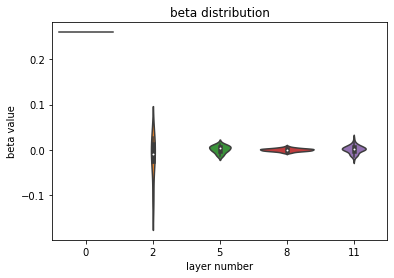

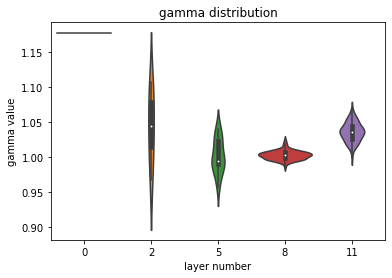

In [30]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

cnn = Sequential()
cnn.add(BatchNormalization())
cnn.add(Conv2D(6, 5, activation='tanh', input_shape=(28,28,1)))
cnn.add(BatchNormalization())
cnn.add(AveragePooling2D(2))
cnn.add(Conv2D(16, 5, activation='tanh'))
cnn.add(BatchNormalization())
cnn.add(AveragePooling2D(2))
cnn.add(Dense(120, activation='tanh'))
cnn.add(BatchNormalization())
cnn.add(Flatten())
cnn.add(Dense(84, activation='tanh'))
cnn.add(BatchNormalization())
cnn.add(Dense(10, activation='softmax'))
cnn.compile(loss = categorical_crossentropy, optimizer = SGD(lr = 0.01), metrics = ['accuracy'])

result = cnn.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_data = (x_test, y_test),  verbose = 1)
betas, gammas = [], []
for i in [0,2,5,8,11]:
  beta = np.array(cnn.layers[i].beta)
  gamma = np.array(cnn.layers[i].gamma)
  for ele in beta:
    betas.append([i,ele])
  for ele in gamma:
    gammas.append([i,ele])
betas = pd.DataFrame(betas, columns = ['n_lay', 'beta'])
gammas = pd.DataFrame(gammas, columns = ['n_lay', 'gamma'])
sns.violinplot(data=betas, x="n_lay", y="beta")
plt.title('beta distribution')
plt.xlabel("layer number")
plt.ylabel("beta value")
plt.show()
sns.violinplot(data=gammas, x="n_lay", y="gamma")
plt.title('gamma distribution')
plt.xlabel("layer number")
plt.ylabel("gamma value")
plt.show()

In both cases, the accuracy increases and loss decreases, so batch normalization for input layer improves performance.

## Q4.

In [31]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

cnn = Sequential()
cnn.add(Dropout(0.2))
cnn.add(Conv2D(6, 5, activation='tanh', input_shape=(28,28,1)))
cnn.add(Dropout(0.5))
cnn.add(AveragePooling2D(2))
cnn.add(Conv2D(16, 5, activation='tanh'))
cnn.add(Dropout(0.5))
cnn.add(AveragePooling2D(2))
cnn.add(Dense(120, activation='tanh'))
cnn.add(Dropout(0.5))
cnn.add(Flatten())
cnn.add(Dense(84, activation='tanh'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))
cnn.compile(loss = categorical_crossentropy, optimizer = SGD(lr = 0.01), metrics = ['accuracy'])

result = cnn.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_data = (x_test, y_test),  verbose = 1)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


469/469 [==============================] - 35s 74ms/step - loss: 1.1831 - accuracy: 0.6181 - val_loss: 0.4343 - val_accuracy: 0.8777
Epoch 2/10
469/469 [==============================] - 36s 76ms/step - loss: 0.6177 - accuracy: 0.8064 - val_loss: 0.3035 - val_accuracy: 0.9083
Epoch 3/10
469/469 [==============================] - 34s 73ms/step - loss: 0.5020 - accuracy: 0.8430 - val_loss: 0.2443 - val_accuracy: 0.9258
Epoch 4/10
469/469 [==============================] - 34s 73ms/step - loss: 0.4380 - accuracy: 0.8645 - val_loss: 0.2031 - val_accuracy: 0.9374
Epoch 5/10
469/469 [==============================] - 35s 75ms/step - loss: 0.3823 - accuracy: 0.8824 - val_loss: 0.1786 - val_accuracy: 0.9455
Epoch 6/10
469/469 [==============================] - 34s 73ms/step - loss: 0.3467 - accuracy: 0.8920 - val_loss: 0.1535 - val_accuracy: 0.9530
Epoch 7/10
469/469 [==============================] - 34s 72ms/step - loss: 0.3224 - accuracy: 0.8999 - val_loss: 0.1395 - val_accuracy: 0.9571
Epo

The test accuracy of using batch normalization is higher than the test accuracy of using dropout.

## Q5.

In [32]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

cnn = Sequential()
cnn.add(Dropout(0.2))
cnn.add(BatchNormalization())
cnn.add(Conv2D(6, 5, activation='tanh', input_shape=(28,28,1)))
cnn.add(Dropout(0.5))
cnn.add(BatchNormalization())
cnn.add(AveragePooling2D(2))
cnn.add(Conv2D(16, 5, activation='tanh'))
cnn.add(Dropout(0.5))
cnn.add(BatchNormalization())
cnn.add(AveragePooling2D(2))
cnn.add(Dense(120, activation='tanh'))
cnn.add(Dropout(0.5))
cnn.add(BatchNormalization())
cnn.add(Flatten())
cnn.add(Dense(84, activation='tanh'))
cnn.add(Dropout(0.5))
cnn.add(BatchNormalization())
cnn.add(Dense(10, activation='softmax'))
cnn.compile(loss = categorical_crossentropy, optimizer = SGD(lr = 0.01), metrics = ['accuracy'])

result = cnn.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_data = (x_test, y_test),  verbose = 1)

Epoch 1/10
469/469 [==============================] - 54s 112ms/step - loss: 1.0617 - accuracy: 0.6560 - val_loss: 0.3766 - val_accuracy: 0.8884
Epoch 2/10
469/469 [==============================] - 50s 106ms/step - loss: 0.6343 - accuracy: 0.8017 - val_loss: 0.2888 - val_accuracy: 0.9133
Epoch 3/10
469/469 [==============================] - 51s 108ms/step - loss: 0.5106 - accuracy: 0.8405 - val_loss: 0.2221 - val_accuracy: 0.9331
Epoch 4/10
469/469 [==============================] - 49s 105ms/step - loss: 0.4204 - accuracy: 0.8708 - val_loss: 0.1806 - val_accuracy: 0.9453
Epoch 5/10
469/469 [==============================] - 51s 108ms/step - loss: 0.3712 - accuracy: 0.8857 - val_loss: 0.1567 - val_accuracy: 0.9515
Epoch 6/10
469/469 [==============================] - 50s 106ms/step - loss: 0.3450 - accuracy: 0.8948 - val_loss: 0.1441 - val_accuracy: 0.9556
Epoch 7/10
469/469 [==============================] - 50s 106ms/step - loss: 0.3183 - accuracy: 0.9031 - val_loss: 0.1317 - val_ac

The test accuracy of using both batch normalization and dropout is lower than the test accuracy of using batch normalization alone, but is similar to the test accuracy of using drop out alone. 